# Sparse and Non Negative Asymetric Auto Encoder - *Linear Decoder*
* Sparsity Regularizer : KL Divergence (KLdivSum), applied to the activation.
* Non-Negativity Regularizer : Non Negativity Constraint
* Number of epochs for training: 500 epochs
* Activation of the encoder: Sigmoid
* Encoder architecture: infoGAN
* Activation of the decoder: **None**

**Dataset: Fashion-MNIST**
## Impact of the value of the sparsity parameters
* Sparsity objective: 0.01, 0.05, 0.1, 0.2
* Sparsity weight: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5



In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from AsymAE_infoGAN.nonNegSparseAsymAEinfoGAN import Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
FILE_PATH = "../"
x_test, _ = bastien_utils.load_data_fashionMNIST(FILE_PATH, train=False, test=True, subsetTest=False)
idx_small = np.arange(10)
idx_small[2] = 31
idx_small[5] = 32
idx_small[7] = 35
x_small = x_test[idx_small]
print('x_small shape:', x_small.shape)

x_small shape: (10, 28, 28, 1)


In [3]:
sparsity_objectives = np.load('../Results/MNIST_Fashion/AsymAE_linearDecoder/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/19_01_09_sparsityObjectives_dim100.npy')
sparsity_weights = np.load('../Results/MNIST_Fashion/AsymAE_linearDecoder/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/19_01_09_sparsityWeights_dim100.npy')
test_mse = np.load('../Results/MNIST_Fashion/AsymAE_linearDecoder/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/19_01_09_test_errors_dim100.npy')
train_mse = np.load('../Results/MNIST_Fashion/AsymAE_linearDecoder/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/19_01_09_training_errors_dim100.npy')
test_kl_loss = np.load('../Results/MNIST_Fashion/AsymAE_linearDecoder/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/19_01_09_test_kl_loss_dim100.npy')
train_kl_loss = np.load('../Results/MNIST_Fashion/AsymAE_linearDecoder/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/19_01_09_training_kl_loss_dim100.npy')
test_max_approx_to_Original = np.load('../Results/MNIST_Fashion/AsymAE_linearDecoder/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/19_01_09_test_max_approx_error_toOriginal_dilation_dim100.npy')
train_max_approx_to_Original = np.load('../Results/MNIST_Fashion/AsymAE_linearDecoder/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/19_01_09_training_max_approx_error_toOriginal_dilatation_dim100.npy')
test_max_approx_to_Rec = np.load('../Results/MNIST_Fashion/AsymAE_linearDecoder/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/19_01_09_test_max_approx_error_toRec_dilation_dim100.npy')
train_max_approx_to_Rec = np.load('../Results/MNIST_Fashion/AsymAE_linearDecoder/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/19_01_09_training_max_approx_error_toRec_dilatation_dim100.npy')
test_sparsity = np.load('../Results/MNIST_Fashion/AsymAE_linearDecoder/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/19_01_09_test_sparsity_dim100.npy')
train_sparsity = np.load('../Results/MNIST_Fashion/AsymAE_linearDecoder/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/19_01_09_training_sparsity_dim100.npy')

In [7]:
flat_spr = test_sparsity.flatten()
idx_spr = np.argsort(flat_spr)
sort_spr = flat_spr[idx_spr]
sort_max_approx = test_max_approx_to_Original.flatten()[idx_spr]

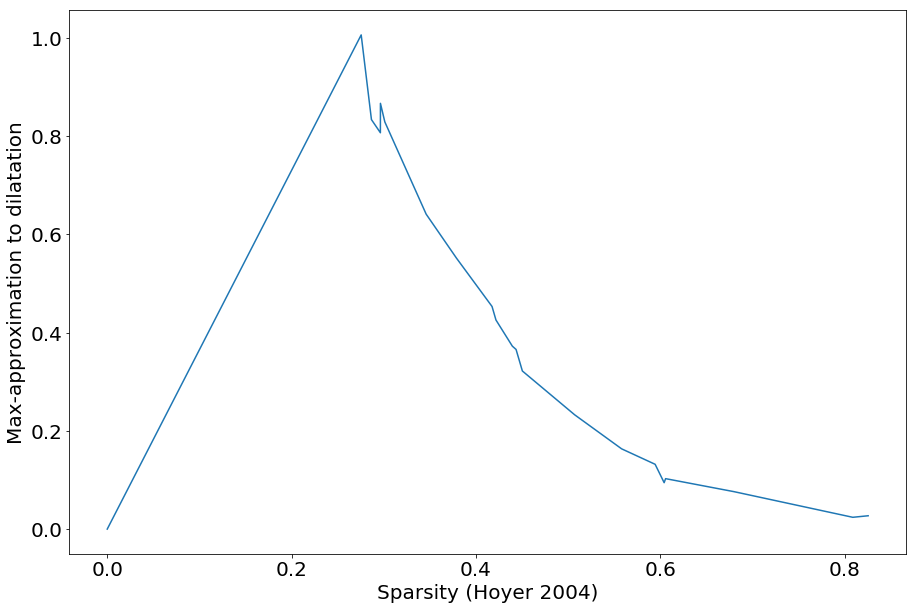

In [8]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sort_spr, sort_max_approx)
plt.xlabel('Sparsity (Hoyer 2004)')
plt.ylabel('Max-approximation to dilatation')
plt.show()

In [9]:
flat_mse = test_mse.flatten()
idx_mse = np.argsort(flat_mse)
sort_mse = flat_mse[idx_mse]
sort_max_approx = test_max_approx_to_Original.flatten()[idx_mse]

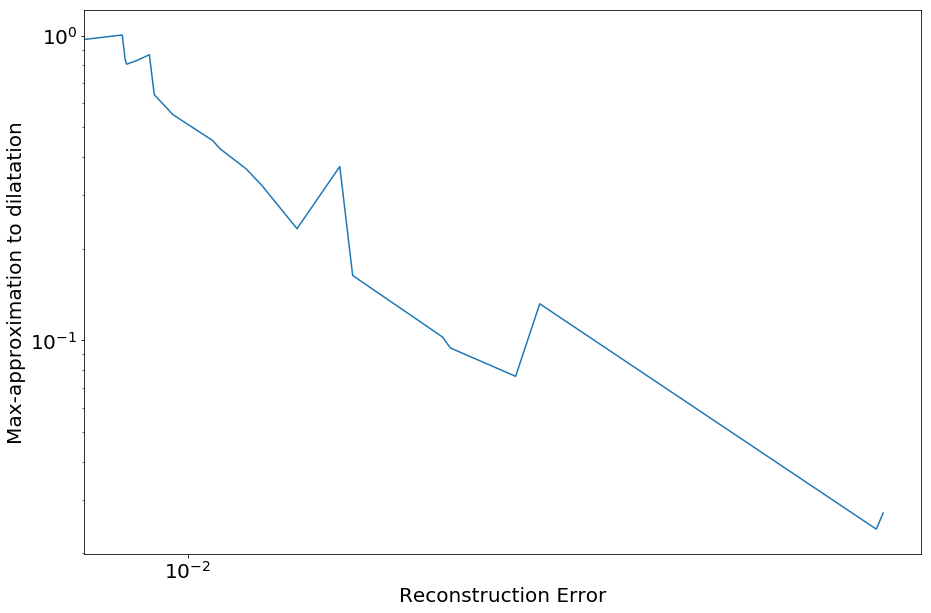

In [10]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sort_mse, sort_max_approx)
plt.xlabel('Reconstruction Error')
plt.ylabel('Max-approximation to dilatation')
plt.xscale('log')
plt.yscale('log')
plt.show()

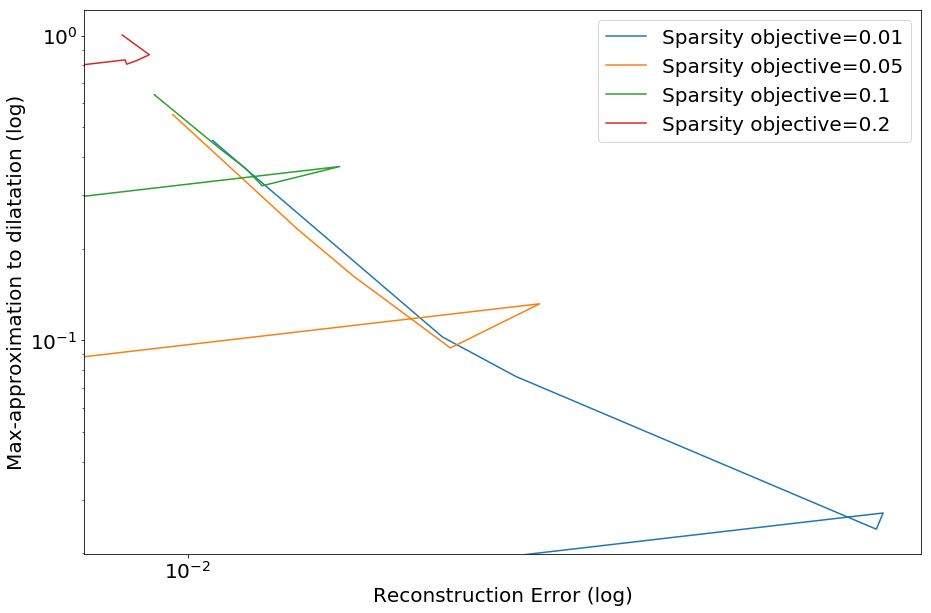

In [11]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(test_mse[:,0], test_max_approx_to_Original[:,0])
plt.plot(test_mse[:,1], test_max_approx_to_Original[:,1])
plt.plot(test_mse[:,2], test_max_approx_to_Original[:,2])
plt.plot(test_mse[:,3], test_max_approx_to_Original[:,3])
plt.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
plt.xlabel('Reconstruction Error (log)')
plt.ylabel('Max-approximation to dilatation (log)')
plt.xscale('log')
plt.yscale('log')
plt.show()

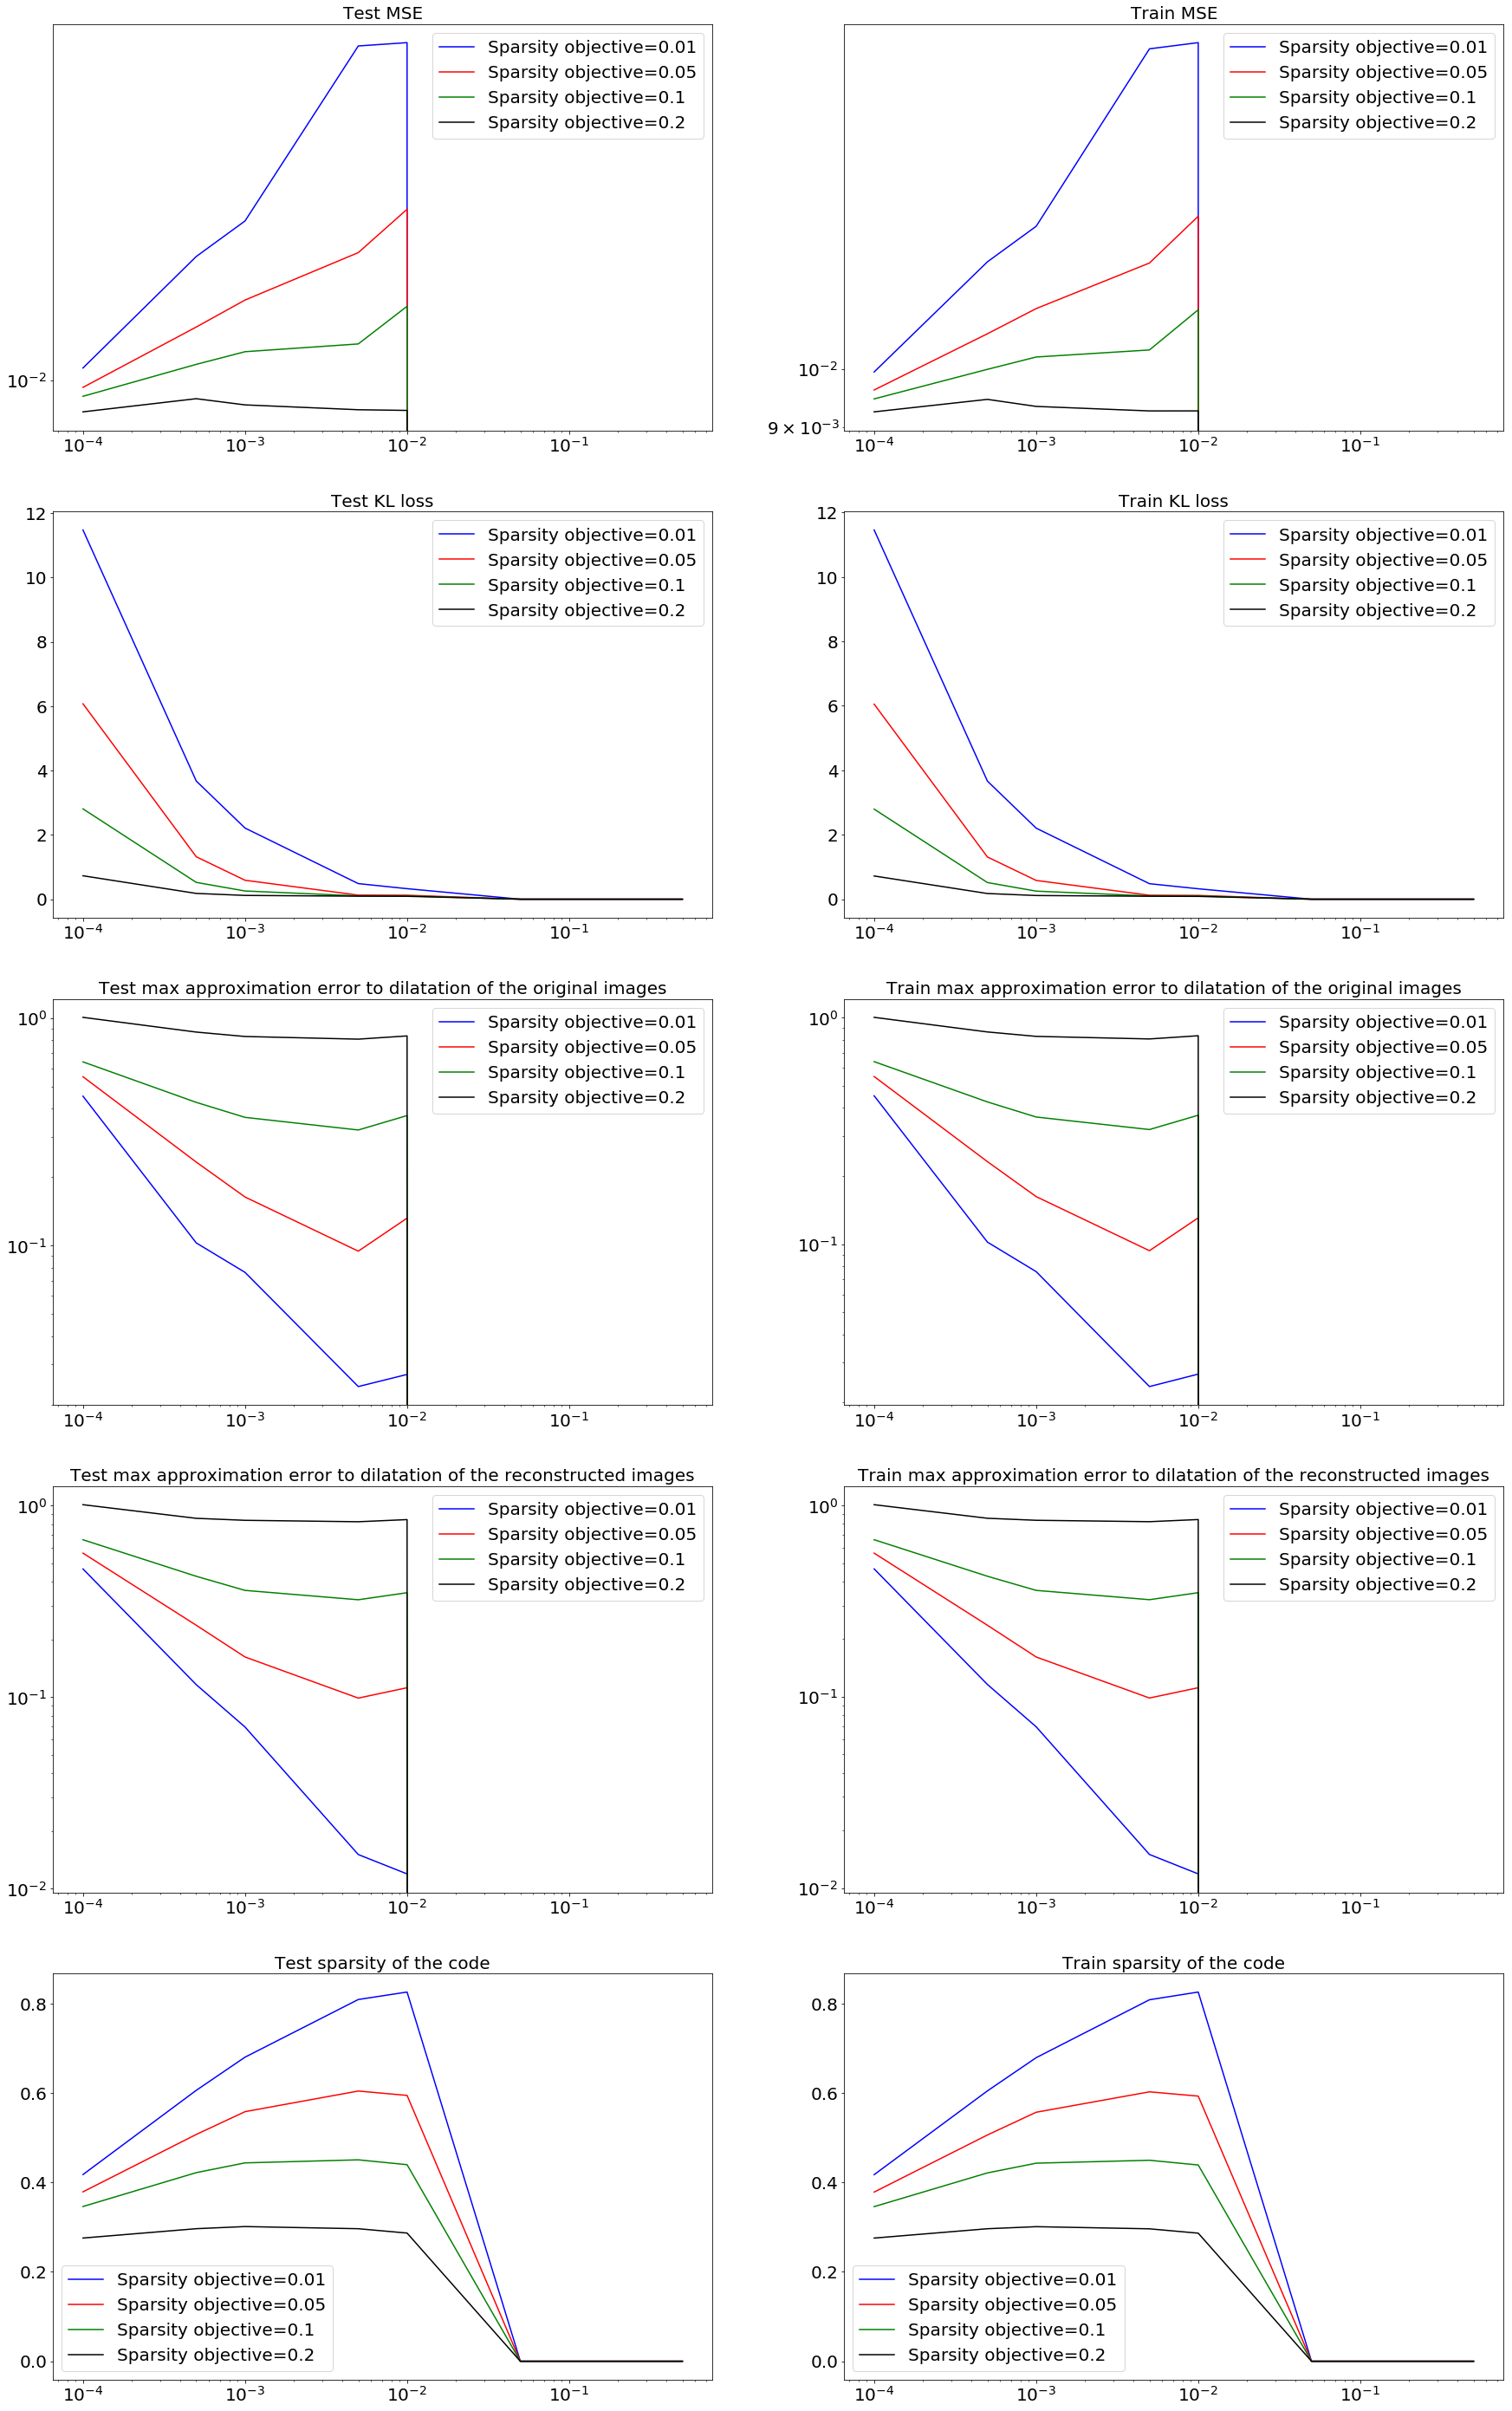

In [14]:
plt.figure(figsize=(30,50))

ax = plt.subplot(5, 2, 1)
ax.plot(sparsity_weights, test_mse[:,0], 'b')
ax.plot(sparsity_weights, test_mse[:,1], 'r')
ax.plot(sparsity_weights, test_mse[:,2], 'g')
ax.plot(sparsity_weights, test_mse[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test MSE')

ax = plt.subplot(5, 2, 2)
ax.plot(sparsity_weights, train_mse[:,0], 'b')
ax.plot(sparsity_weights, train_mse[:,1], 'r')
ax.plot(sparsity_weights, train_mse[:,2], 'g')
ax.plot(sparsity_weights, train_mse[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train MSE')

ax = plt.subplot(5, 2, 3)
ax.plot(sparsity_weights, test_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, test_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, test_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, test_kl_loss[:,3]/sparsity_weights, 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test KL loss')


ax = plt.subplot(5, 2, 4)
ax.plot(sparsity_weights, train_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, train_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, train_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, train_kl_loss[:,3]/sparsity_weights, 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train KL loss')

ax = plt.subplot(5, 2, 5)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 6)
ax.plot(sparsity_weights, train_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 7)
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the reconstructed images')

ax = plt.subplot(5, 2, 8)
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the reconstructed images')


ax = plt.subplot(5, 2, 9)
ax.plot(sparsity_weights, test_sparsity[:,0], 'b')
ax.plot(sparsity_weights, test_sparsity[:,1], 'r')
ax.plot(sparsity_weights, test_sparsity[:,2], 'g')
ax.plot(sparsity_weights, test_sparsity[:,3], 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test sparsity of the code')


ax = plt.subplot(5, 2, 10)
ax.plot(sparsity_weights, train_sparsity[:,0], 'b')
ax.plot(sparsity_weights, train_sparsity[:,1], 'r')
ax.plot(sparsity_weights, train_sparsity[:,2], 'g')
ax.plot(sparsity_weights, train_sparsity[:,3], 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train sparsity of the code')

plt.show()

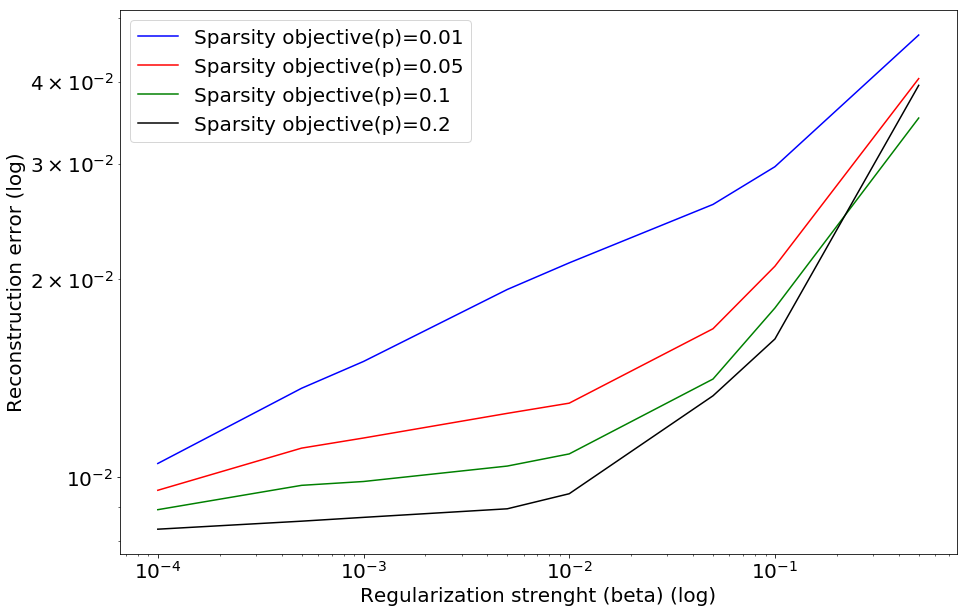

In [19]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_mse[:,0], 'b')
plt.plot(sparsity_weights, test_mse[:,1], 'r')
plt.plot(sparsity_weights, test_mse[:,2], 'g')
plt.plot(sparsity_weights, test_mse[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Reconstruction error (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

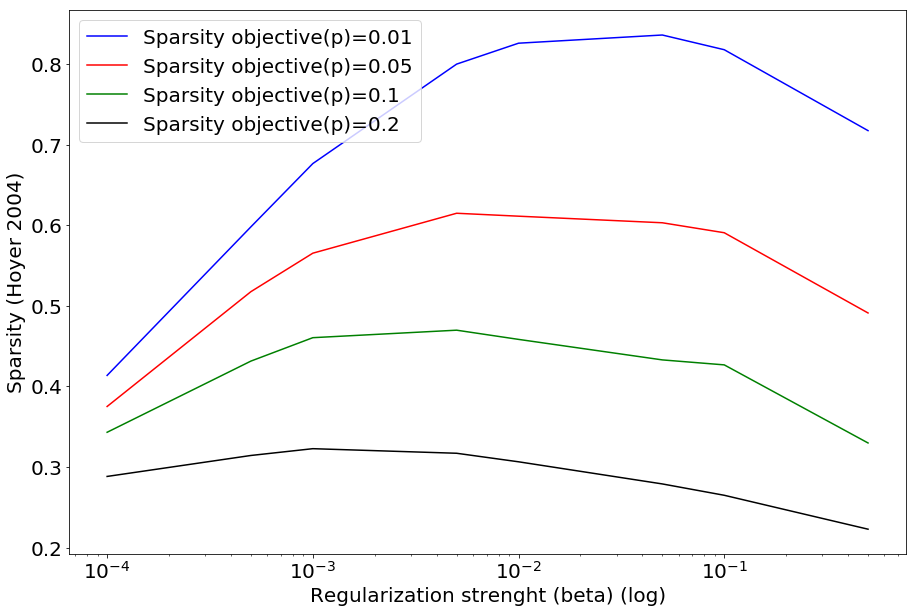

In [23]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_sparsity[:,0], 'b')
plt.plot(sparsity_weights, test_sparsity[:,1], 'r')
plt.plot(sparsity_weights, test_sparsity[:,2], 'g')
plt.plot(sparsity_weights, test_sparsity[:,3], 'k')
plt.xscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Sparsity (Hoyer 2004)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

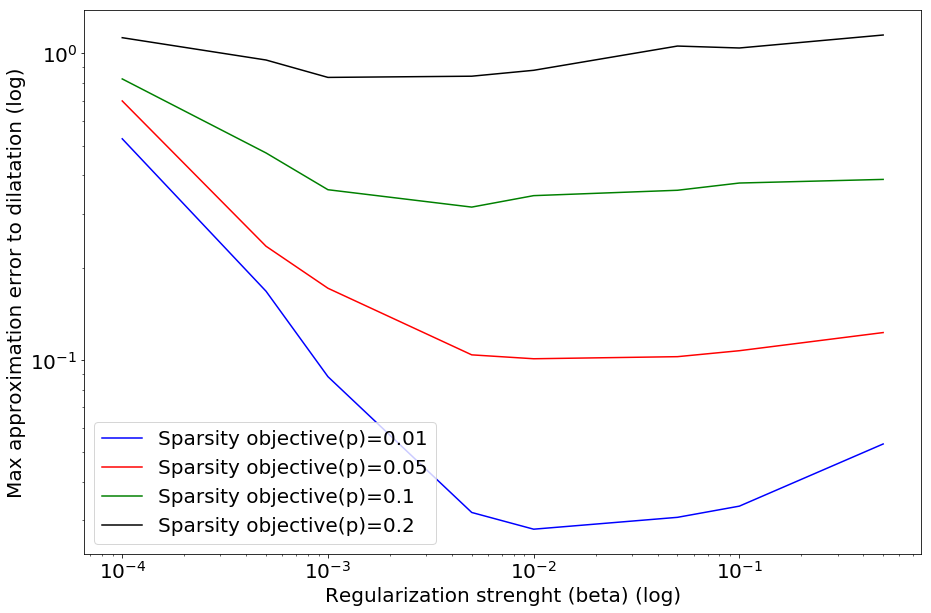

In [24]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'r')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,2], 'g')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Max approximation error to dilatation (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

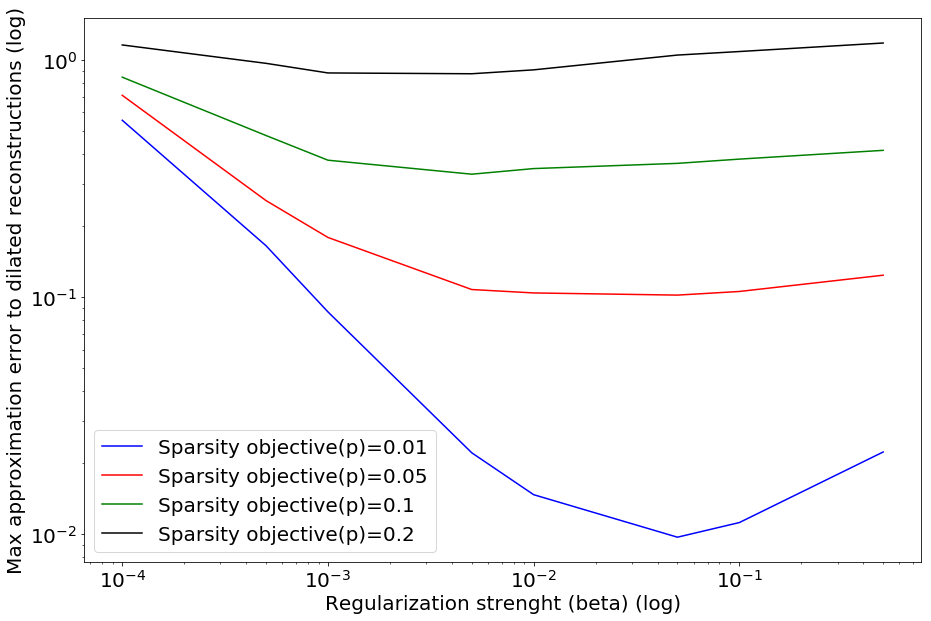

In [25]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'r')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,2], 'g')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Max approximation error to dilated reconstructions (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

# 1. Sparsity_Objective = 0.01

## 1.1 Sparsity_weight = 0.0001 (sp_o = 0.01)

In [2]:
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_09_dim100_KLdivSum_0.0001_0.01_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')


In [8]:
AE.decoder.layers[1].get_config()

{'name': 'dense_3',
 'trainable': True,
 'units': 784,
 'activation': 'linear',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': {'class_name': 'NonNeg', 'config': {}},
 'bias_constraint': None}

Original images and reconstructions - Reconstruction error:  0.0099331


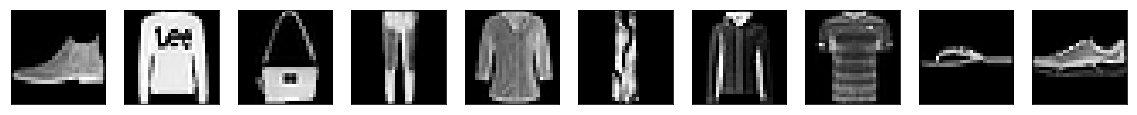

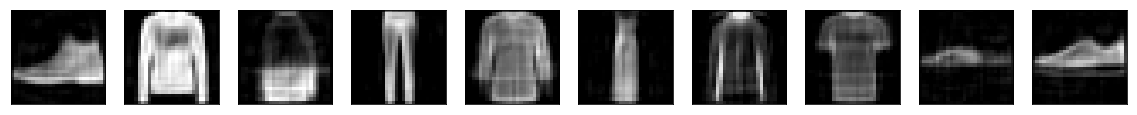

Histograms of the encodings - Sparsity (Hoyer):  0.4174845814704895


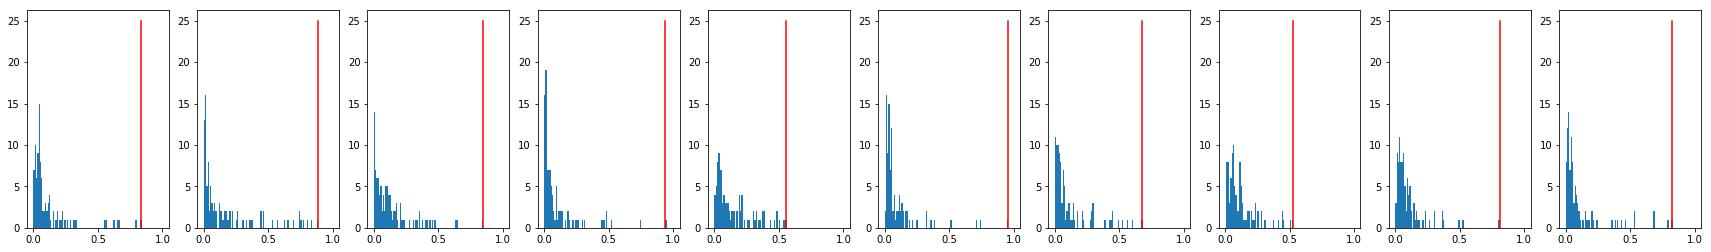

Atom images of the decoder


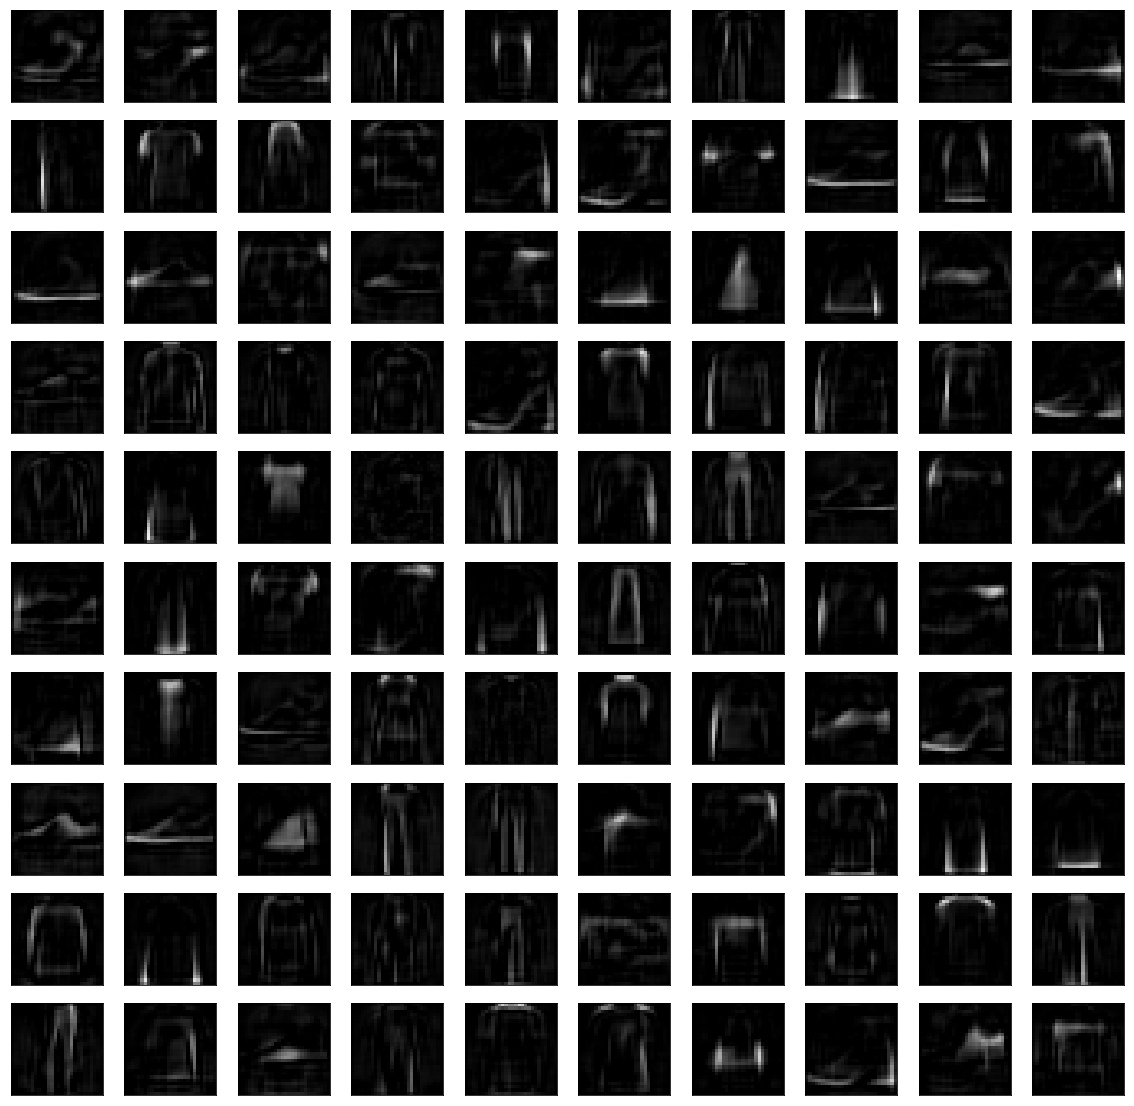

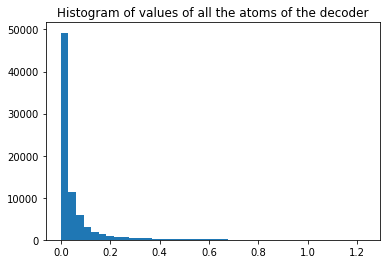

In [8]:
sp_o = 0.01
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


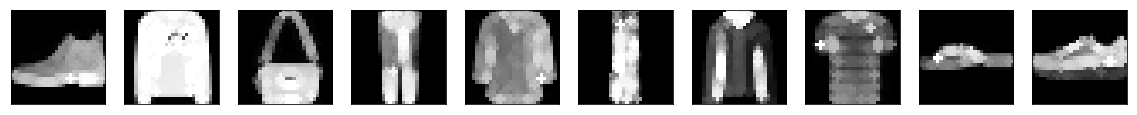

Dilatation of the reconstructions


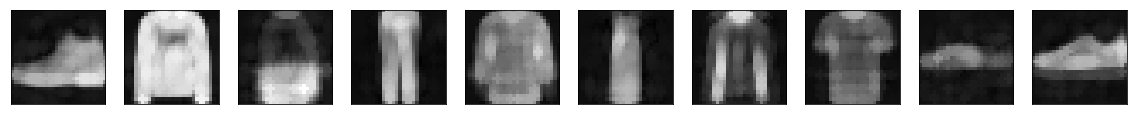

Original images and max-approximation to dilatation
Max-approx error to original:  0.3040944065444624  - Max-approx error to reconstruction:  0.39454144794968476


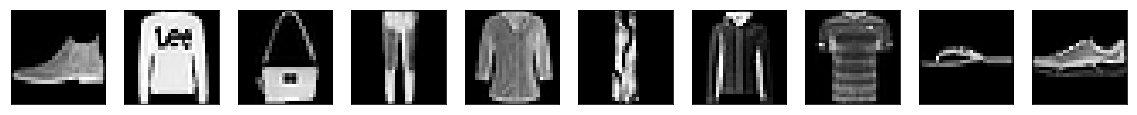

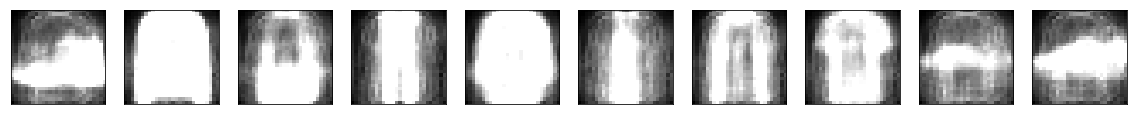

Dilated of the atom images of the decoder


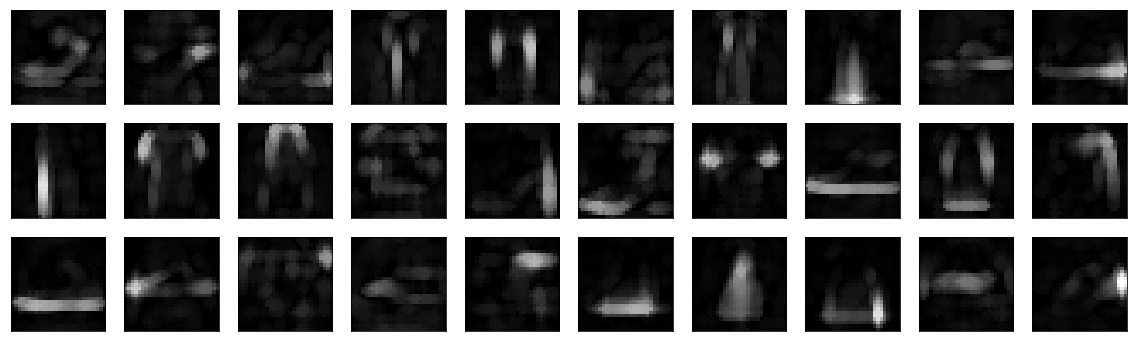

In [9]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.2 Sparsity_weight = 0.0005 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.012307614


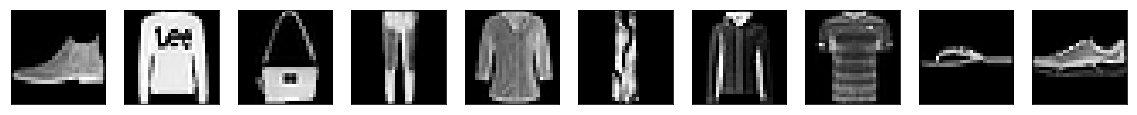

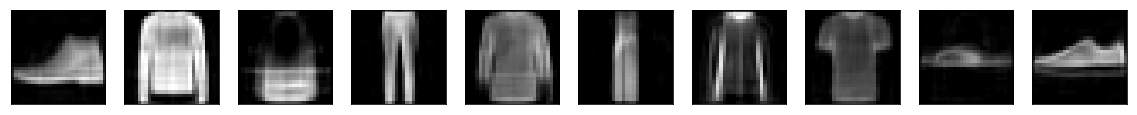

Histograms of the encodings - Sparsity (Hoyer):  0.6057897210121155


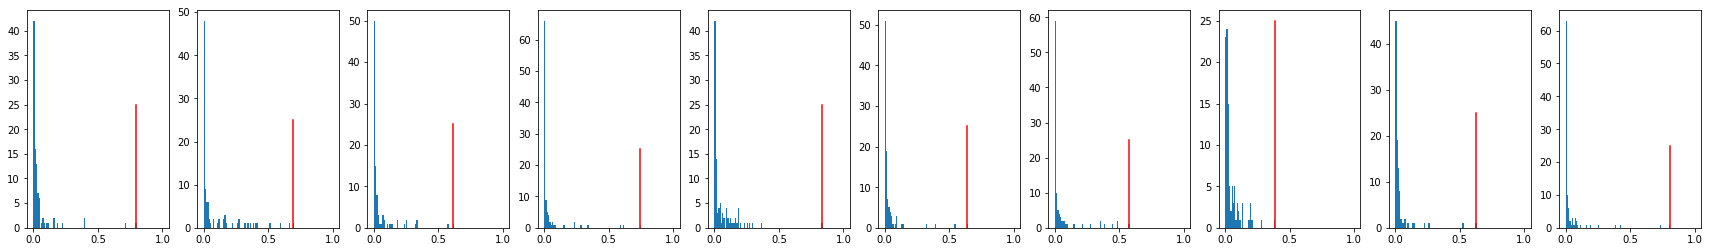

Atom images of the decoder


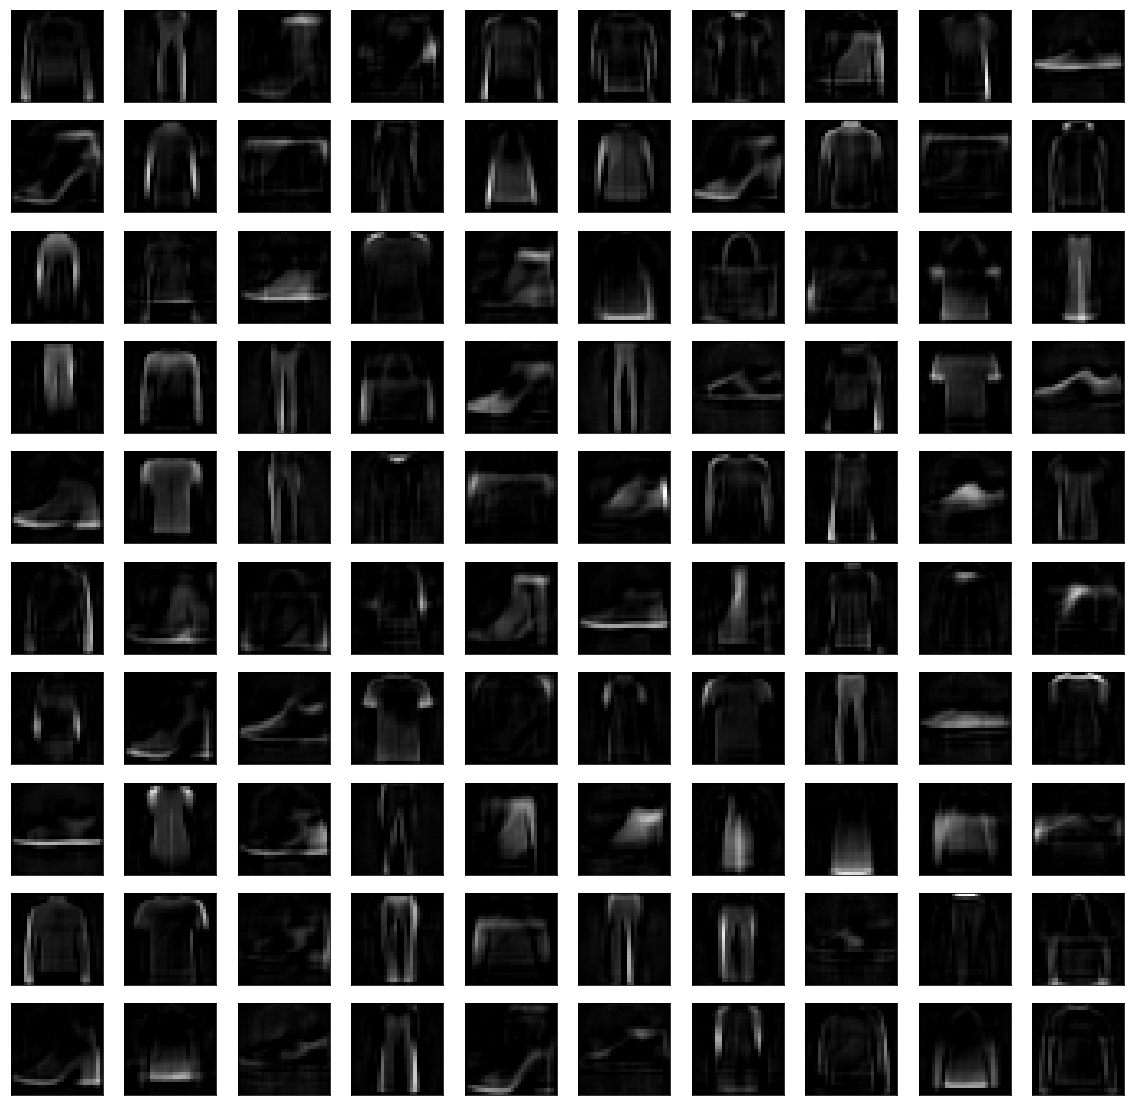

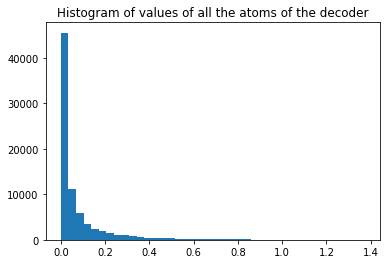

In [4]:
sp_o = 0.01
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


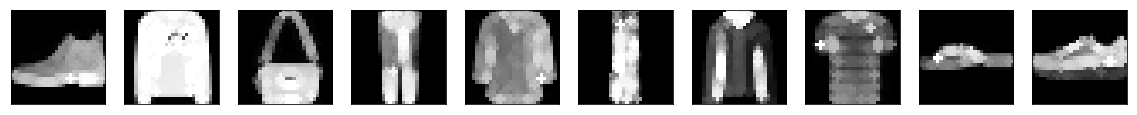

Dilatation of the reconstructions


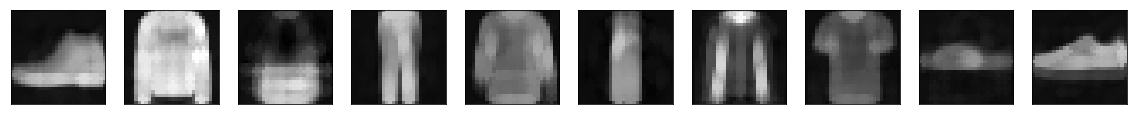

Original images and max-approximation to dilatation
Max-approx error to original:  0.13179758388885304  - Max-approx error to reconstruction:  0.08772288272823402


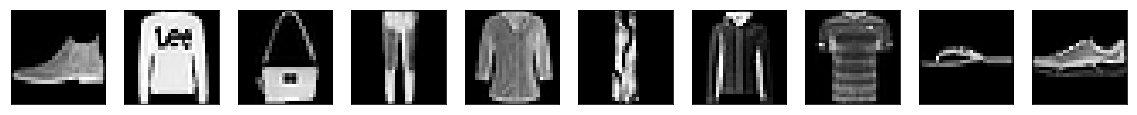

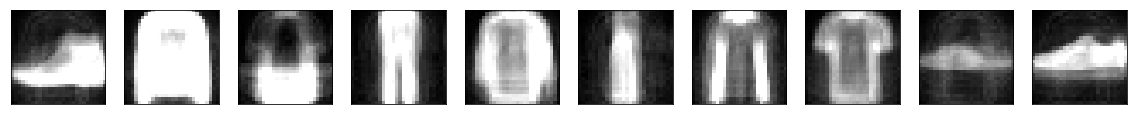

Dilated of the atom images of the decoder


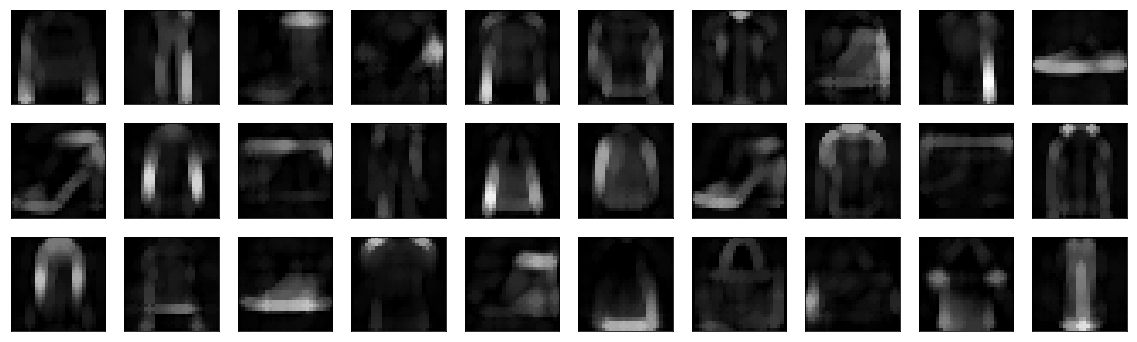

In [5]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.3 Sparsity_weight = 0.001 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.013150815


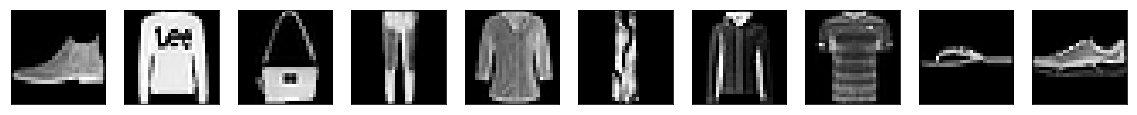

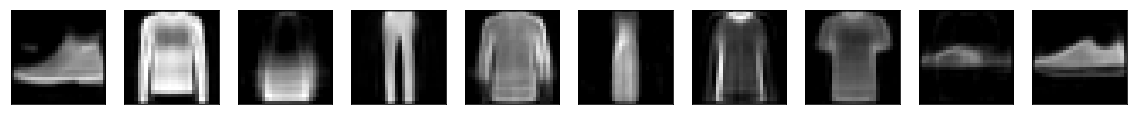

Histograms of the encodings - Sparsity (Hoyer):  0.6799508929252625


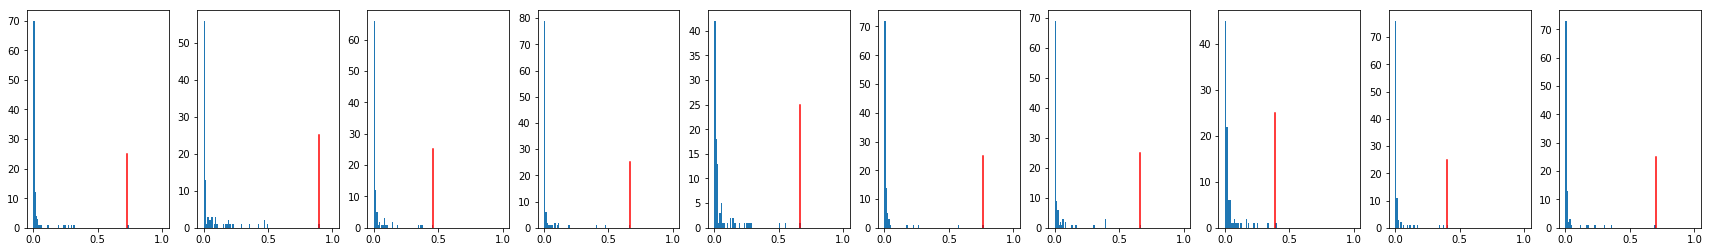

Atom images of the decoder


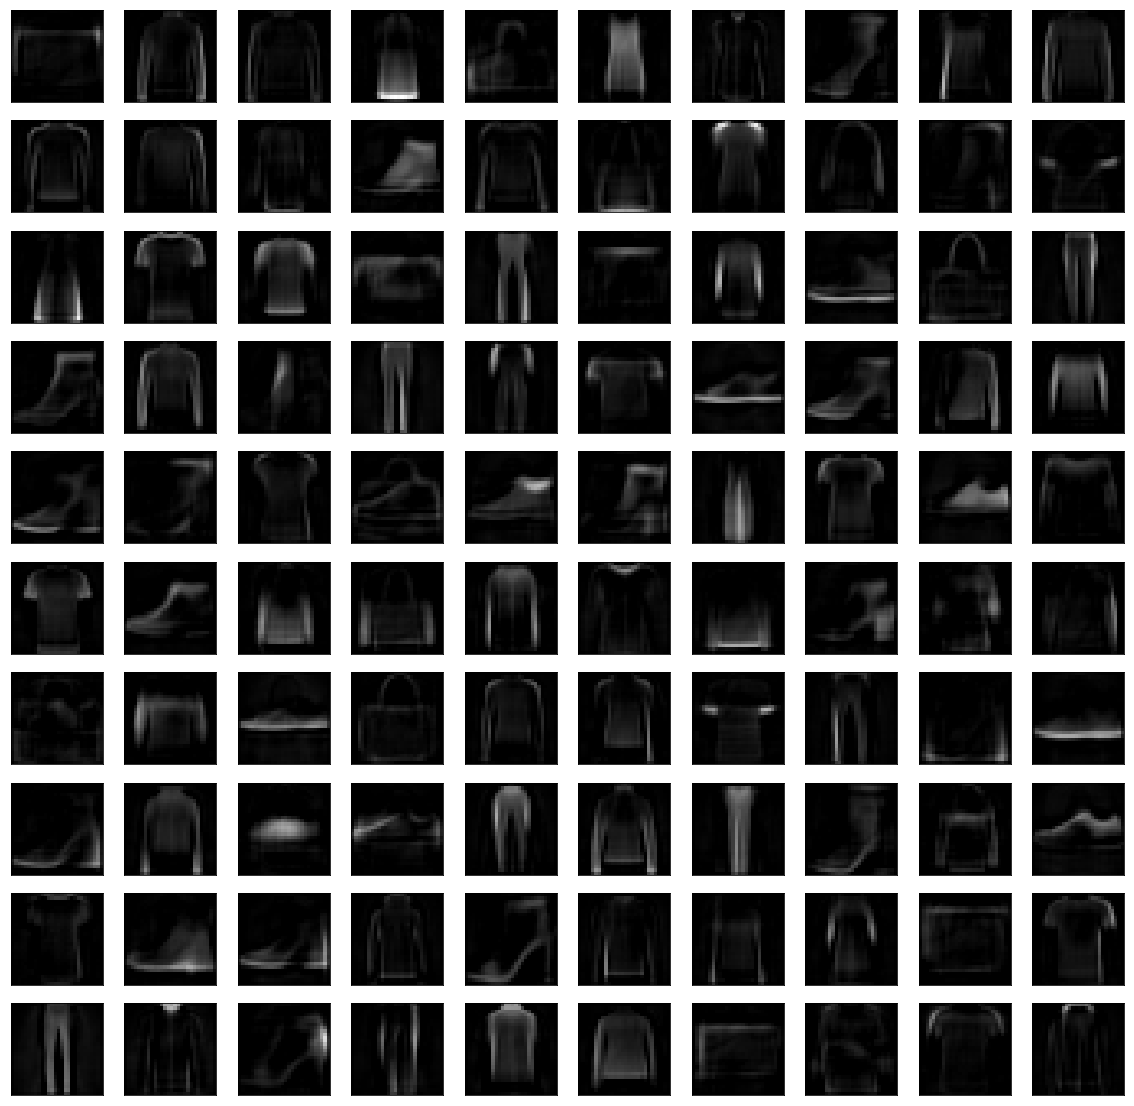

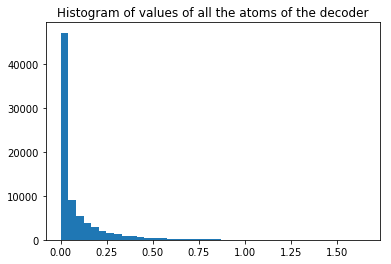

In [4]:
sp_o = 0.01
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


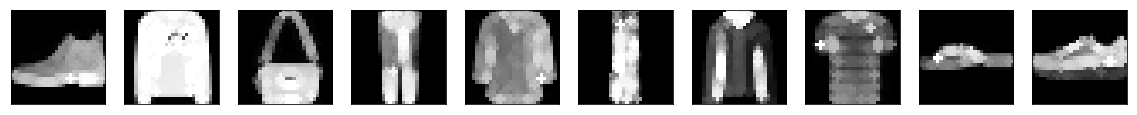

Dilatation of the reconstructions


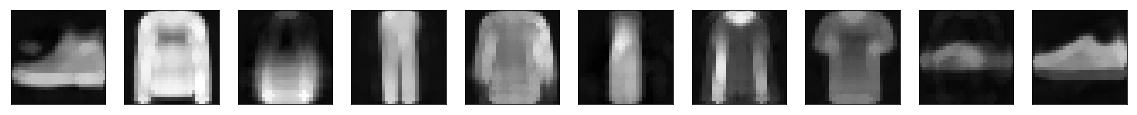

Original images and max-approximation to dilatation
Max-approx error to original:  0.09627193602304795  - Max-approx error to reconstruction:  0.0642293080789185


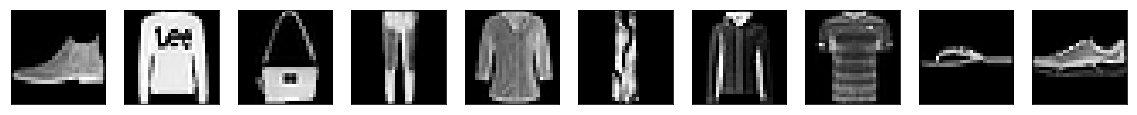

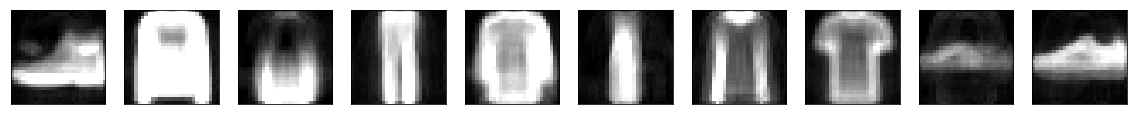

Dilated of the atom images of the decoder


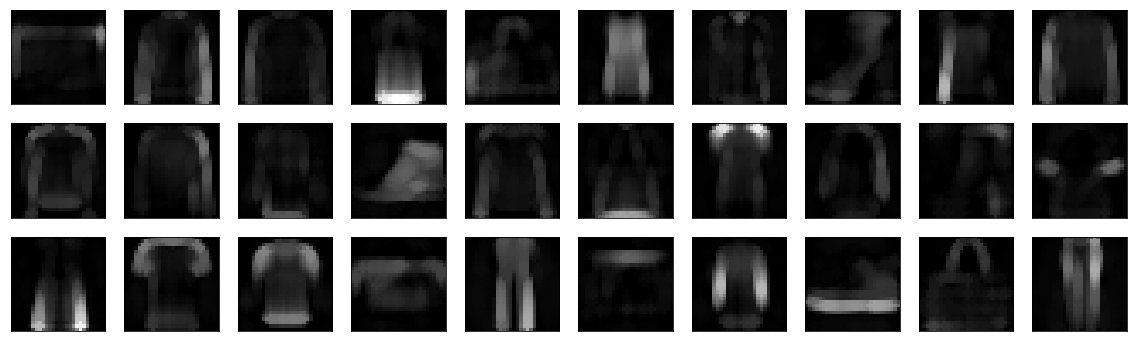

In [5]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

In [4]:
sp_o = 0.01
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')

In [5]:
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)

In [6]:
AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)


(0.09627193602304795, 0.06422931276044942)

In [8]:
max_approx = AE_dil.reconstruction(x_test)

In [10]:
x_test_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test, SE_scale=1)

In [11]:
np.mean(np.square(max_approx - x_test_dil))

0.07620981311601276

In [12]:
max_approx_clipped = np.clip(max_approx, 0, 1)

In [11]:
np.mean(np.square(max_approx_clipped - x_test_dil))

0.02875555074024279

## 1.4 Sparsity_weight = 0.005 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.01823493


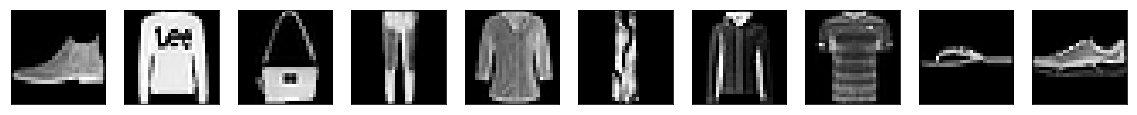

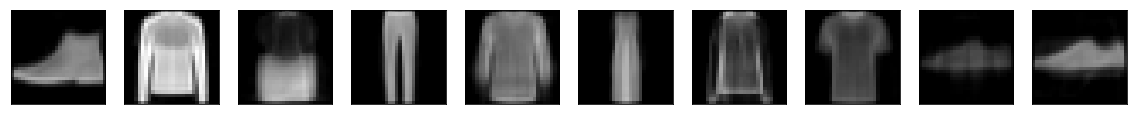

Histograms of the encodings - Sparsity (Hoyer):  0.8088695406913757


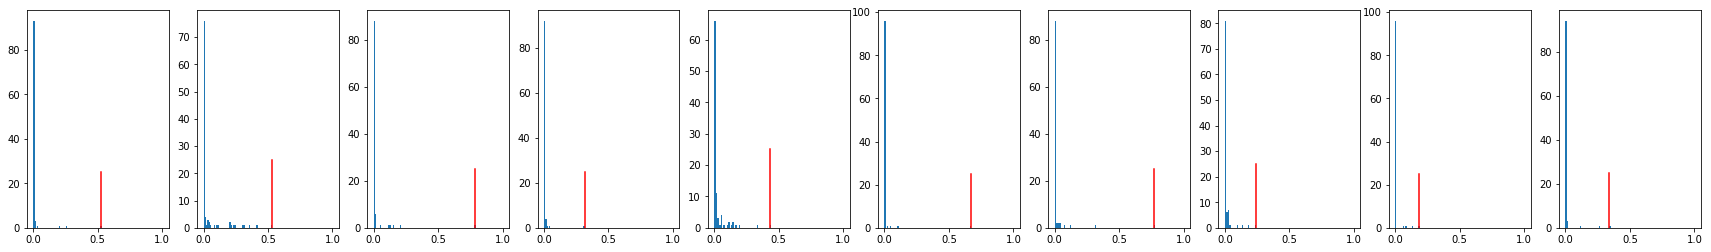

Atom images of the decoder


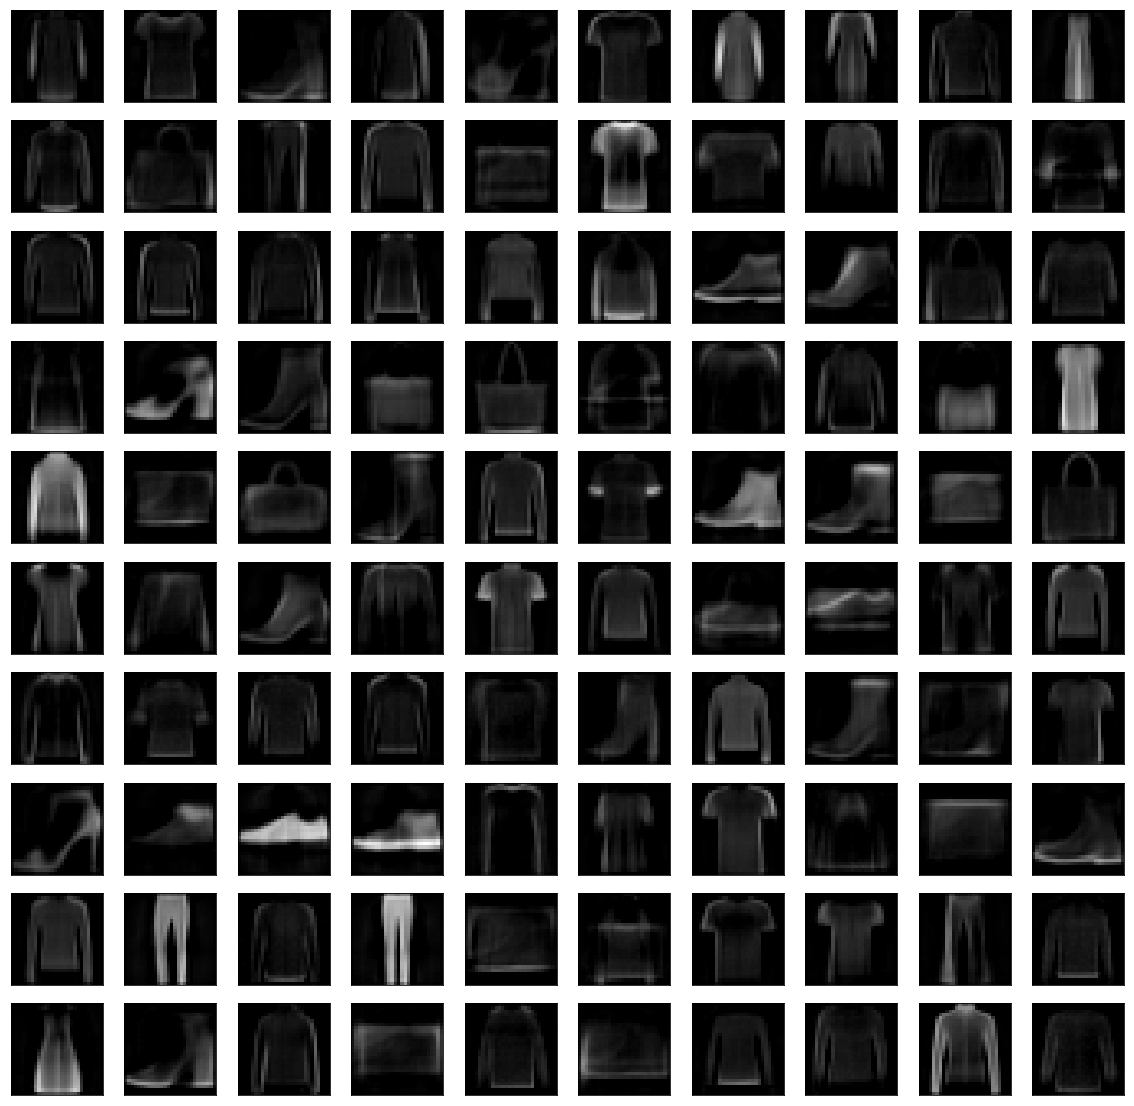

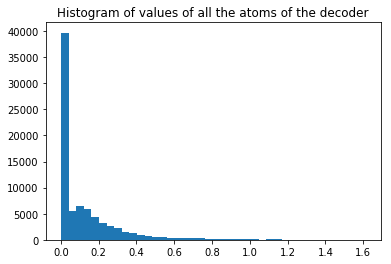

In [8]:
sp_o = 0.01
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


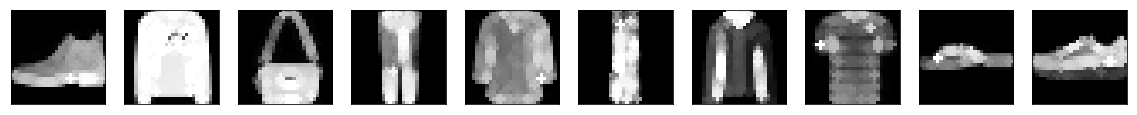

Dilatation of the reconstructions


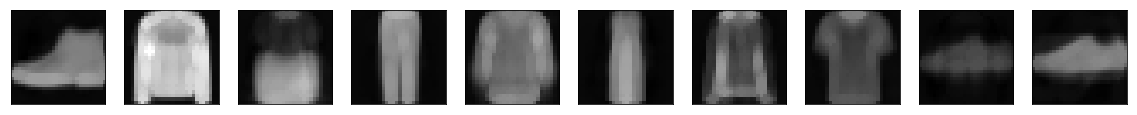

Original images and max-approximation to dilatation
Max-approx error to original:  0.044762021373097614  - Max-approx error to reconstruction:  0.007325792839549102


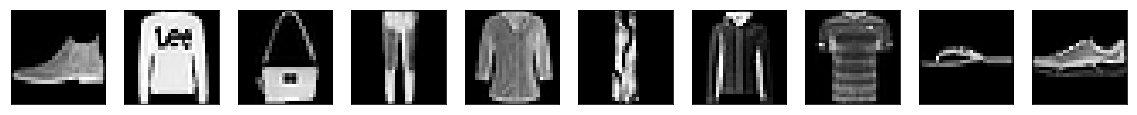

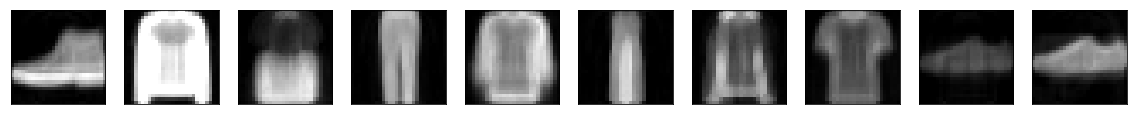

Dilated of the atom images of the decoder


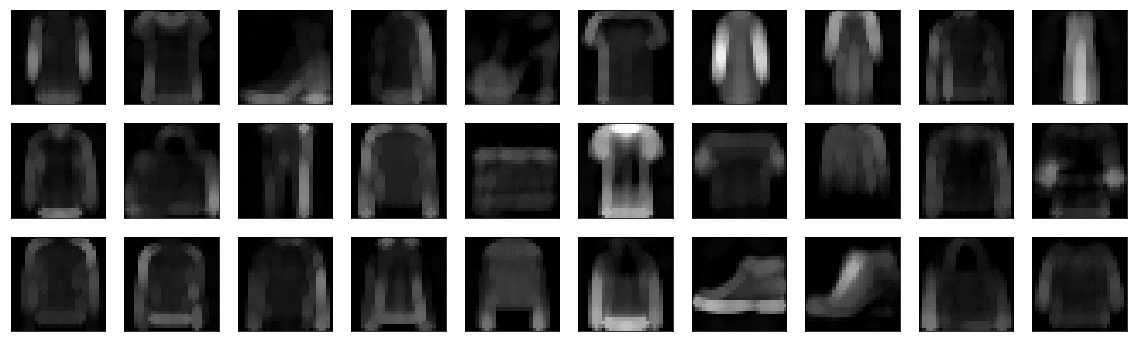

In [9]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.5 Sparsity_weight = 0.01 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.018348707


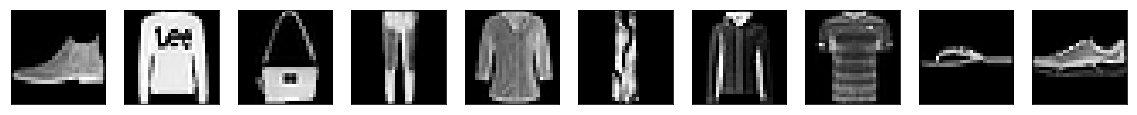

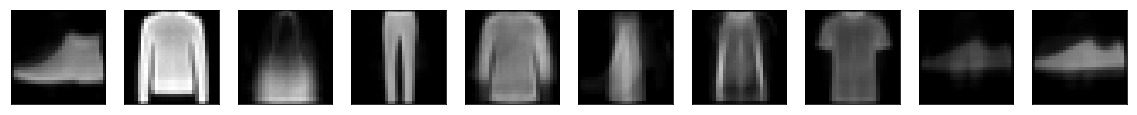

Histograms of the encodings - Sparsity (Hoyer):  0.8255570530891418


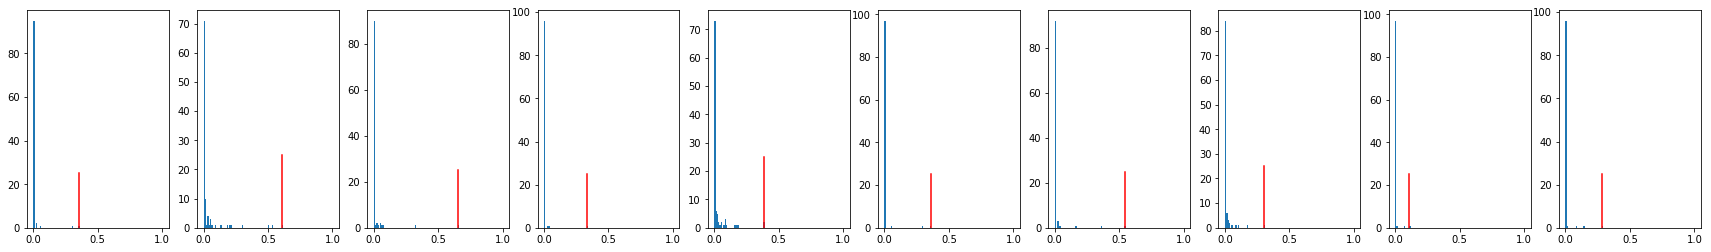

Atom images of the decoder


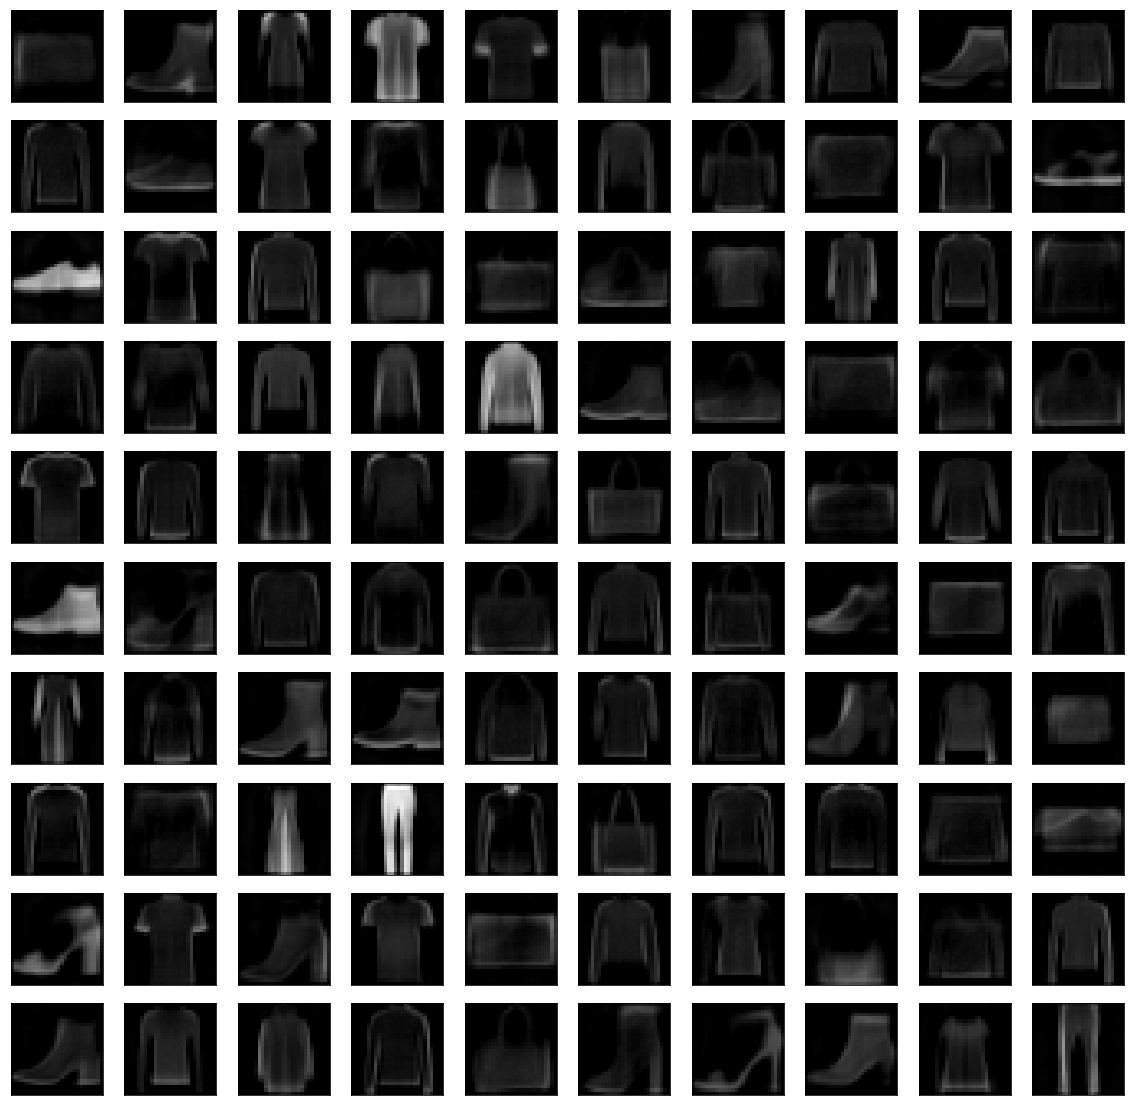

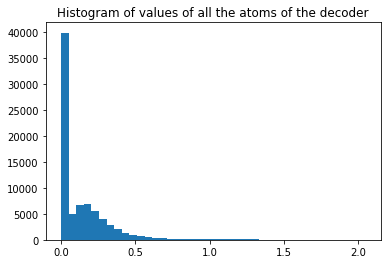

In [10]:
sp_o = 0.01
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


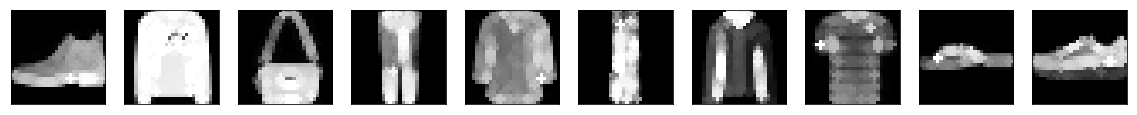

Dilatation of the reconstructions


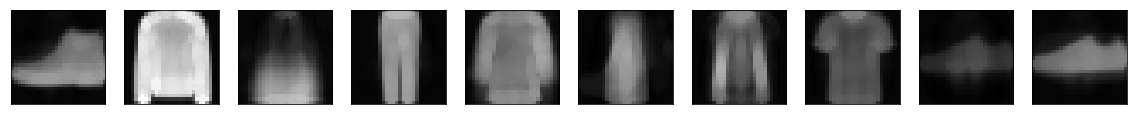

Original images and max-approximation to dilatation
Max-approx error to original:  0.045229634289379504  - Max-approx error to reconstruction:  0.008411648031382193


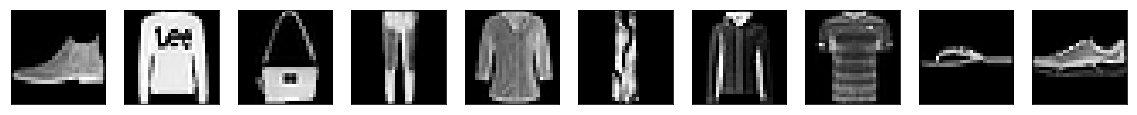

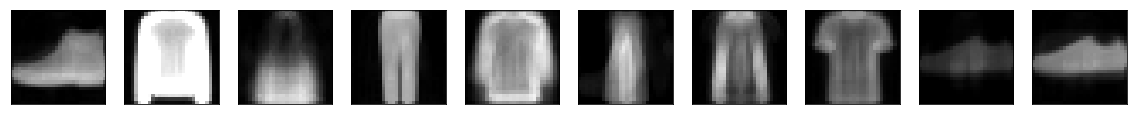

Dilated of the atom images of the decoder


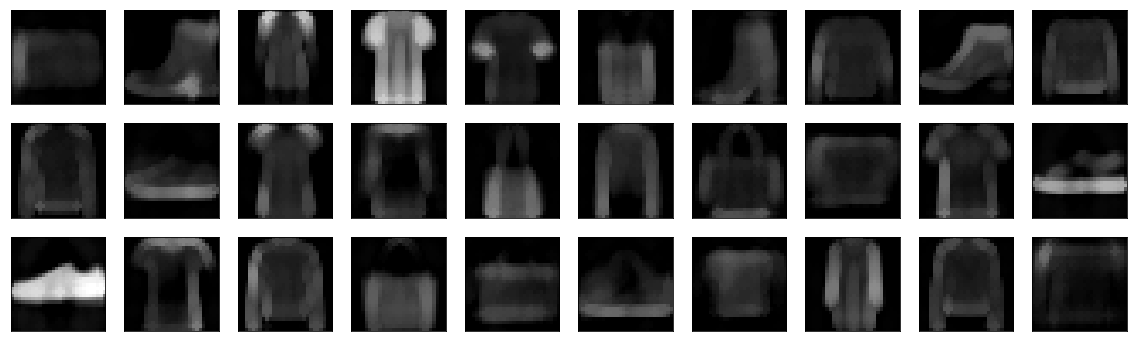

In [11]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 2. Sparsity_Objective = 0.05

## 2.1 Sparsity_weight = 0.0001 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.009548779


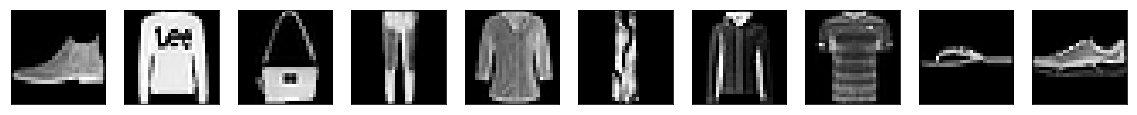

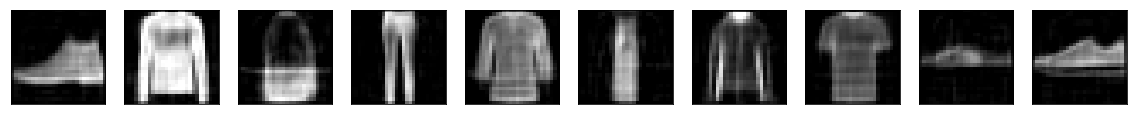

Histograms of the encodings - Sparsity (Hoyer):  0.37886157631874084


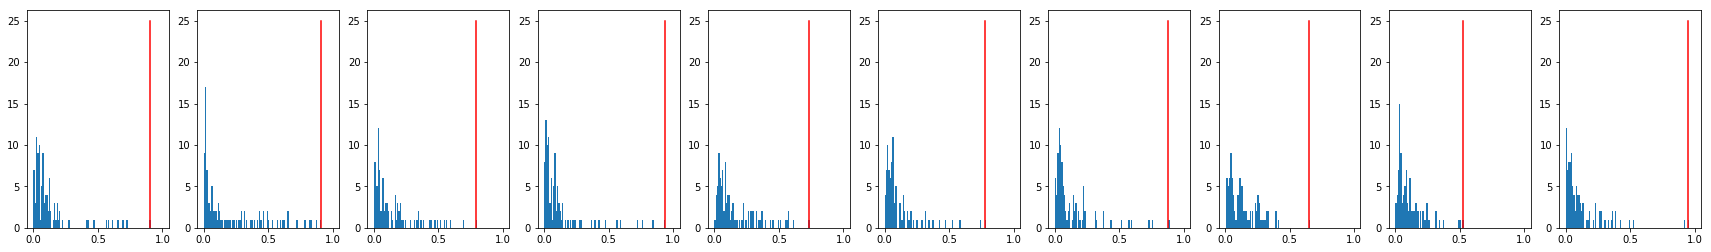

Atom images of the decoder


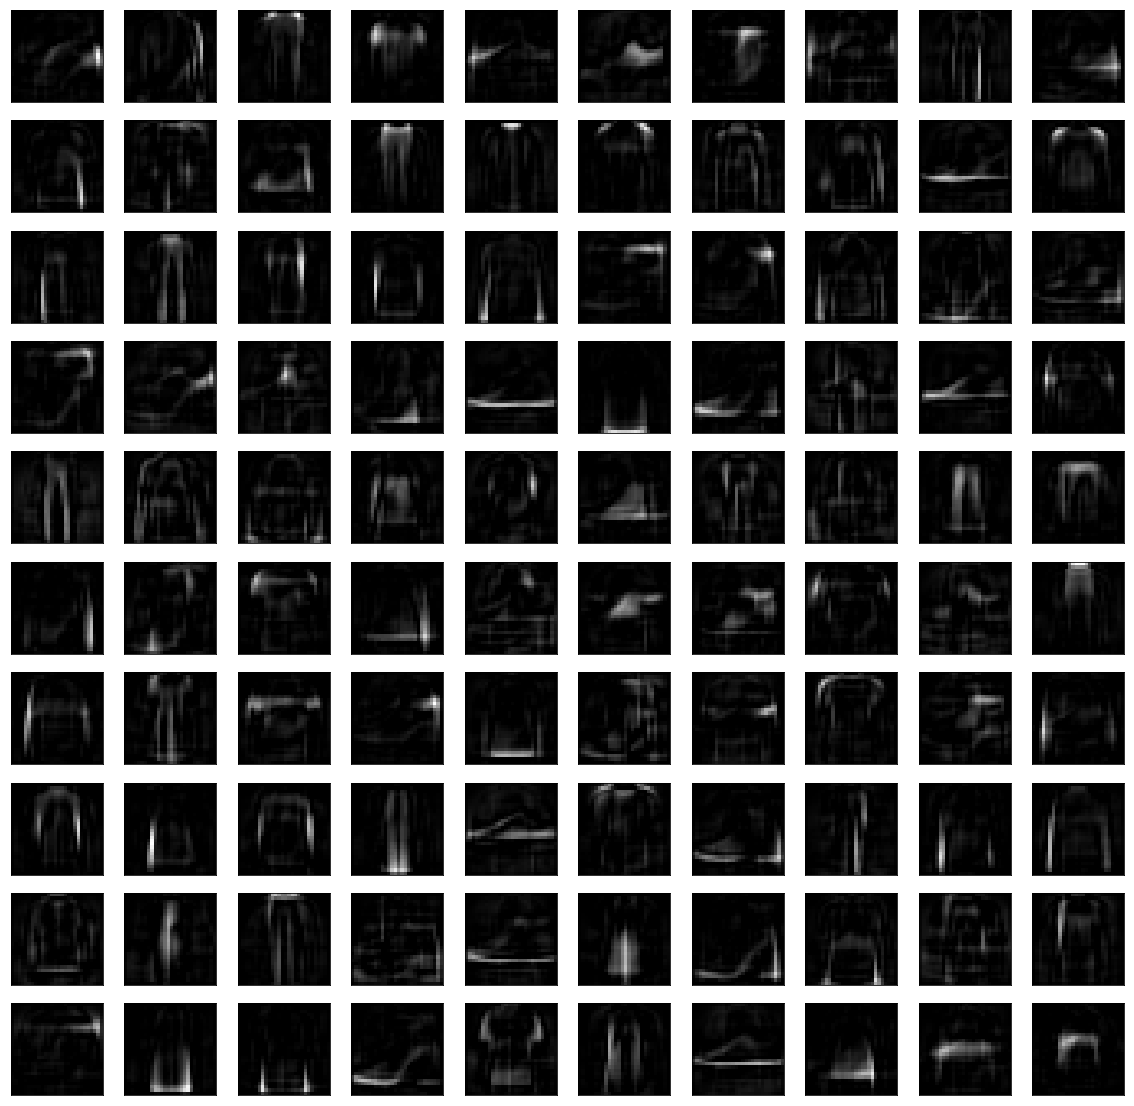

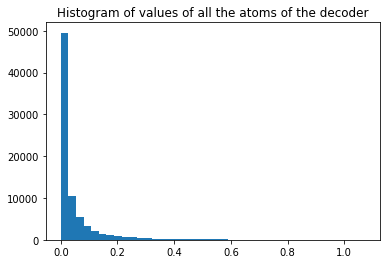

In [12]:
sp_o = 0.05
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


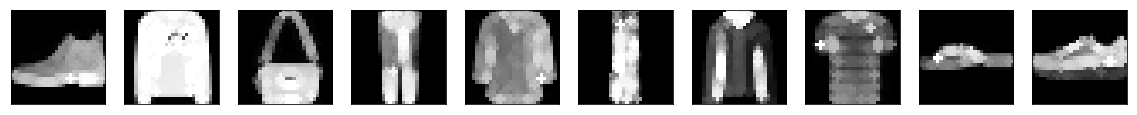

Dilatation of the reconstructions


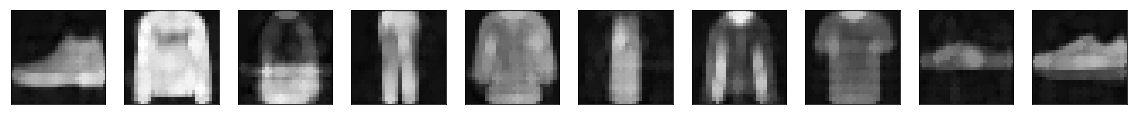

Original images and max-approximation to dilatation
Max-approx error to original:  0.34229865499342294  - Max-approx error to reconstruction:  0.4780407537261685


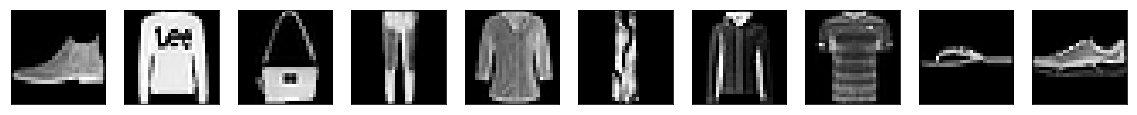

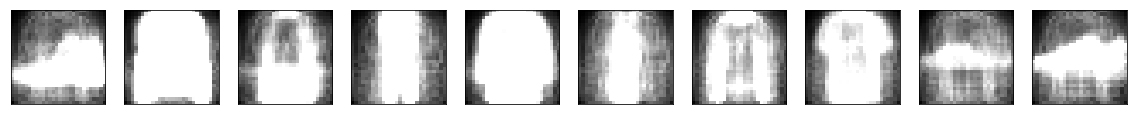

Dilated of the atom images of the decoder


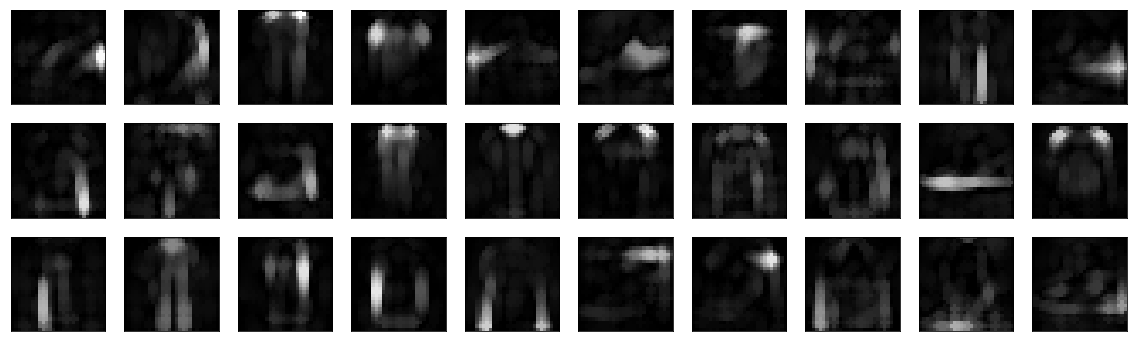

In [13]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.2 Sparsity_weight = 0.0005 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.010771009


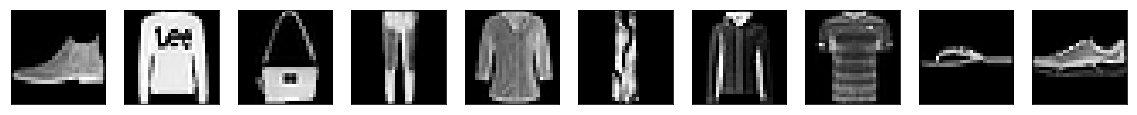

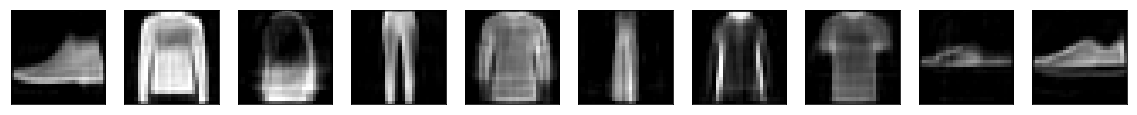

Histograms of the encodings - Sparsity (Hoyer):  0.5071290731430054


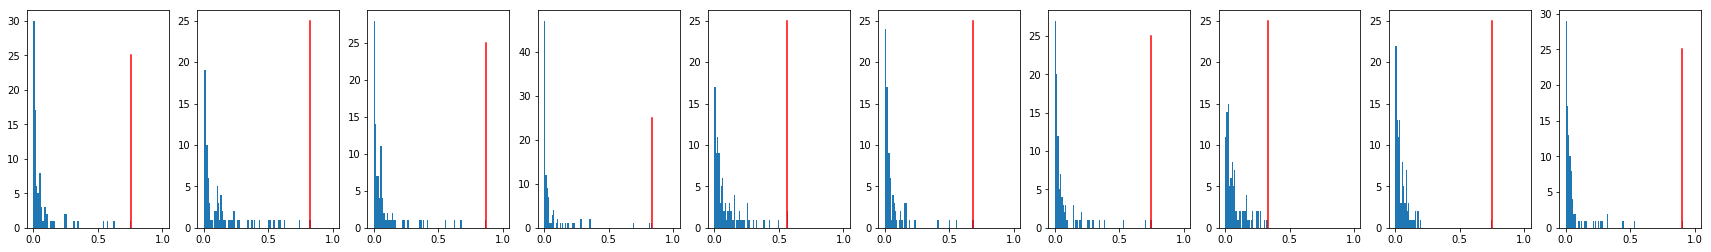

Atom images of the decoder


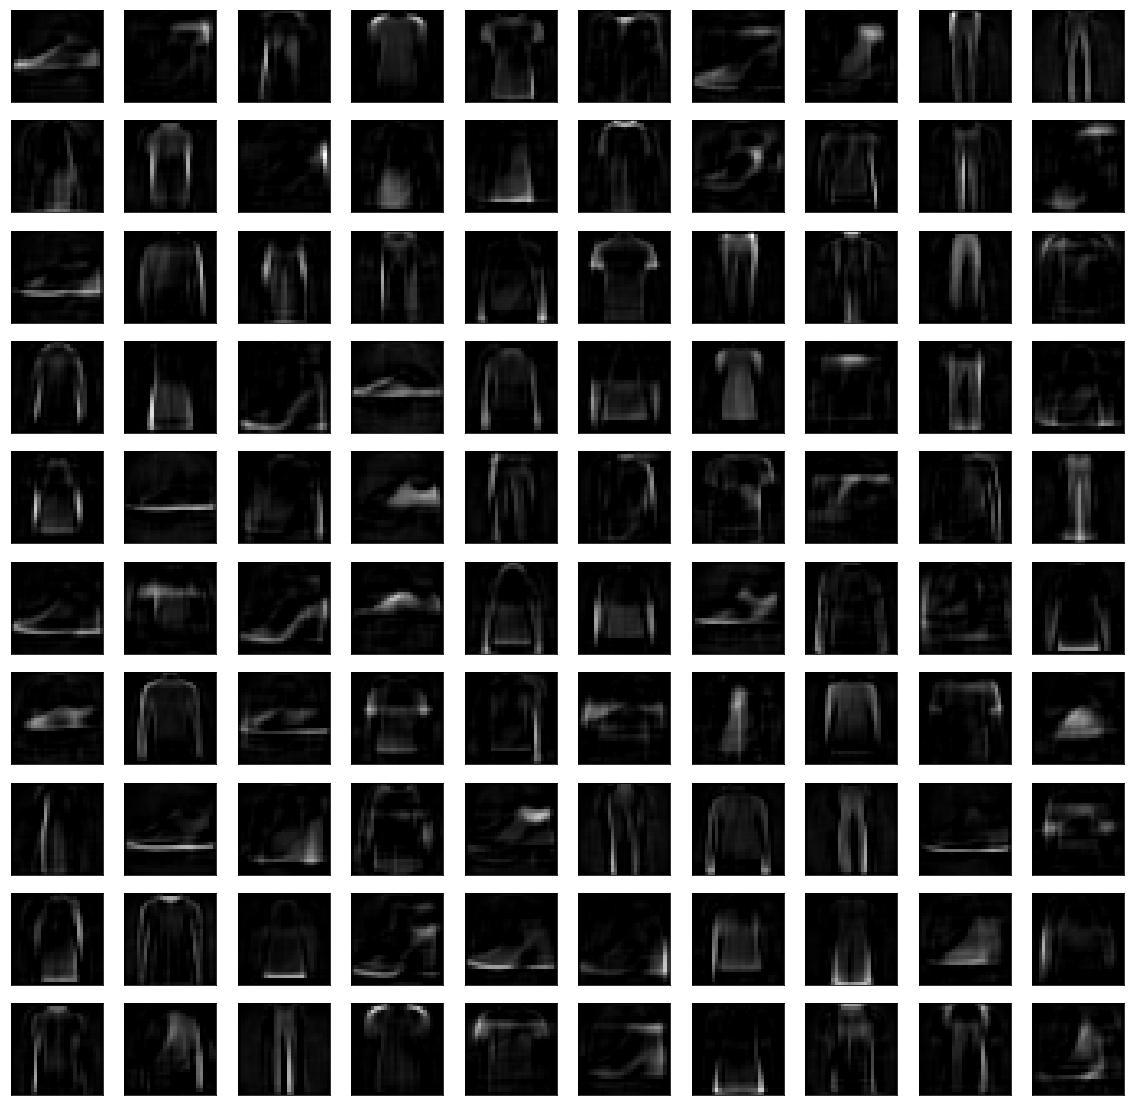

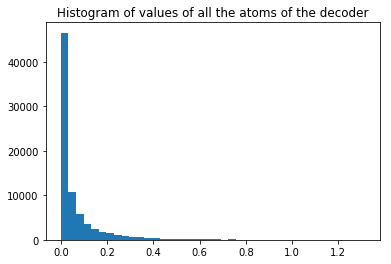

In [14]:
sp_o = 0.05
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


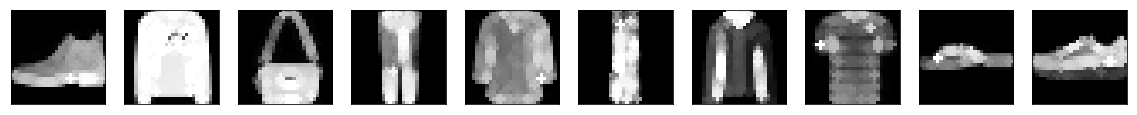

Dilatation of the reconstructions


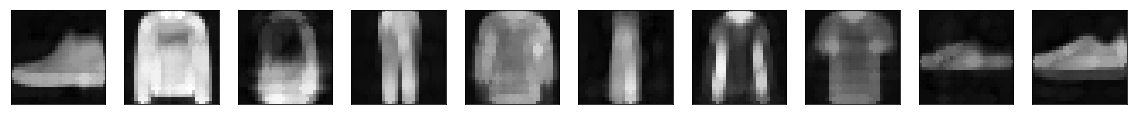

Original images and max-approximation to dilatation
Max-approx error to original:  0.2059486493795358  - Max-approx error to reconstruction:  0.20818146456343303


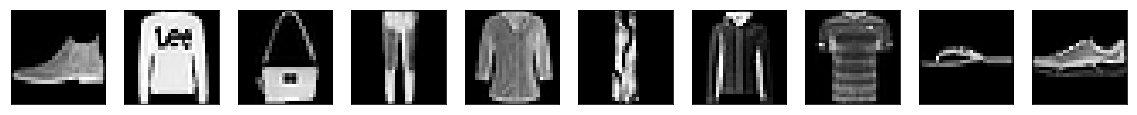

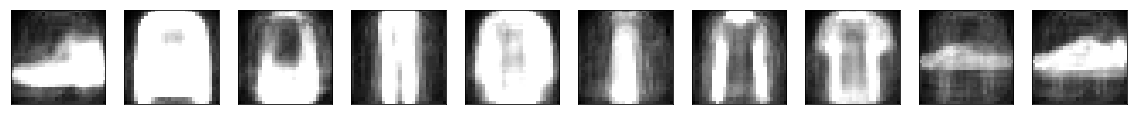

Dilated of the atom images of the decoder


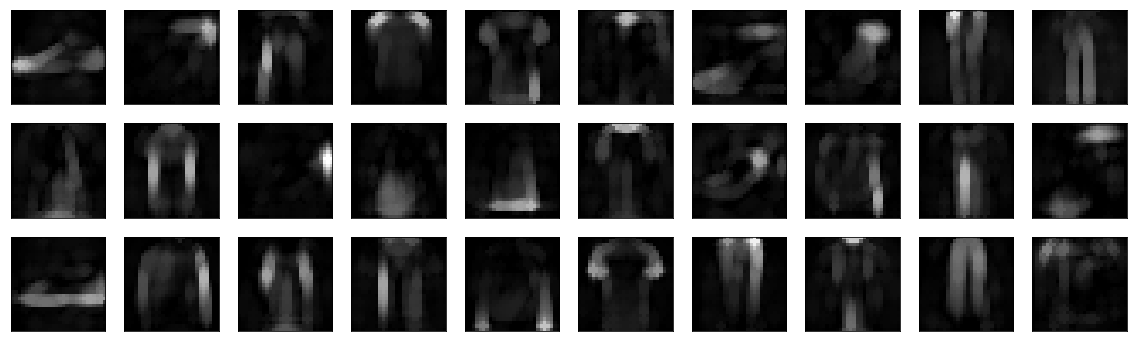

In [15]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.3 Sparsity_weight = 0.001 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.011326208


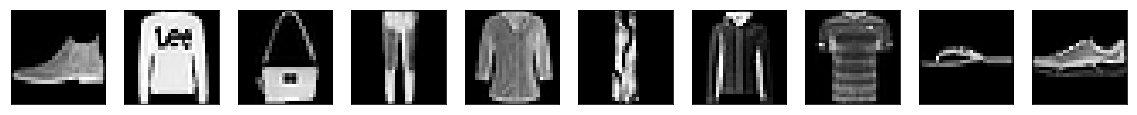

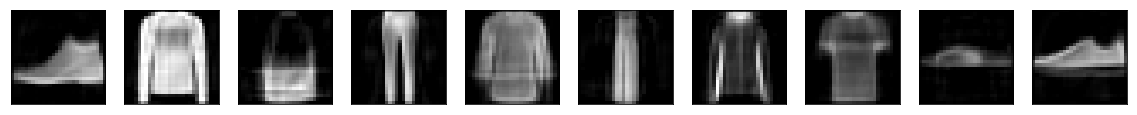

Histograms of the encodings - Sparsity (Hoyer):  0.5580759644508362


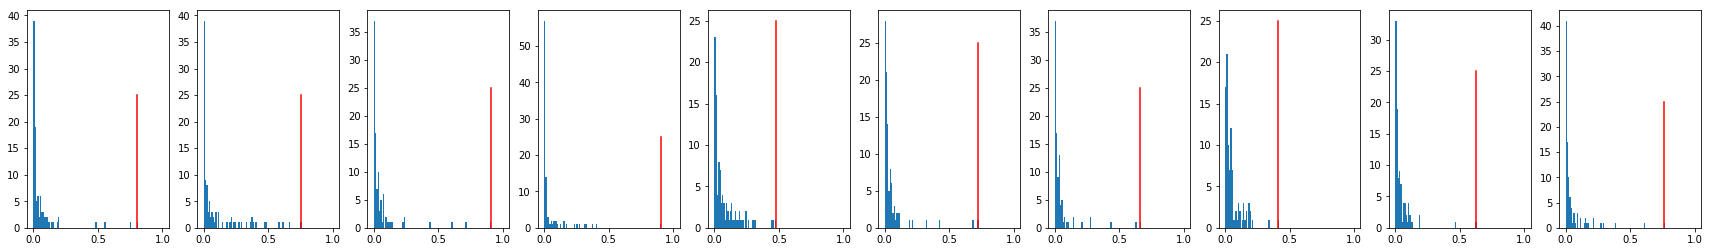

Atom images of the decoder


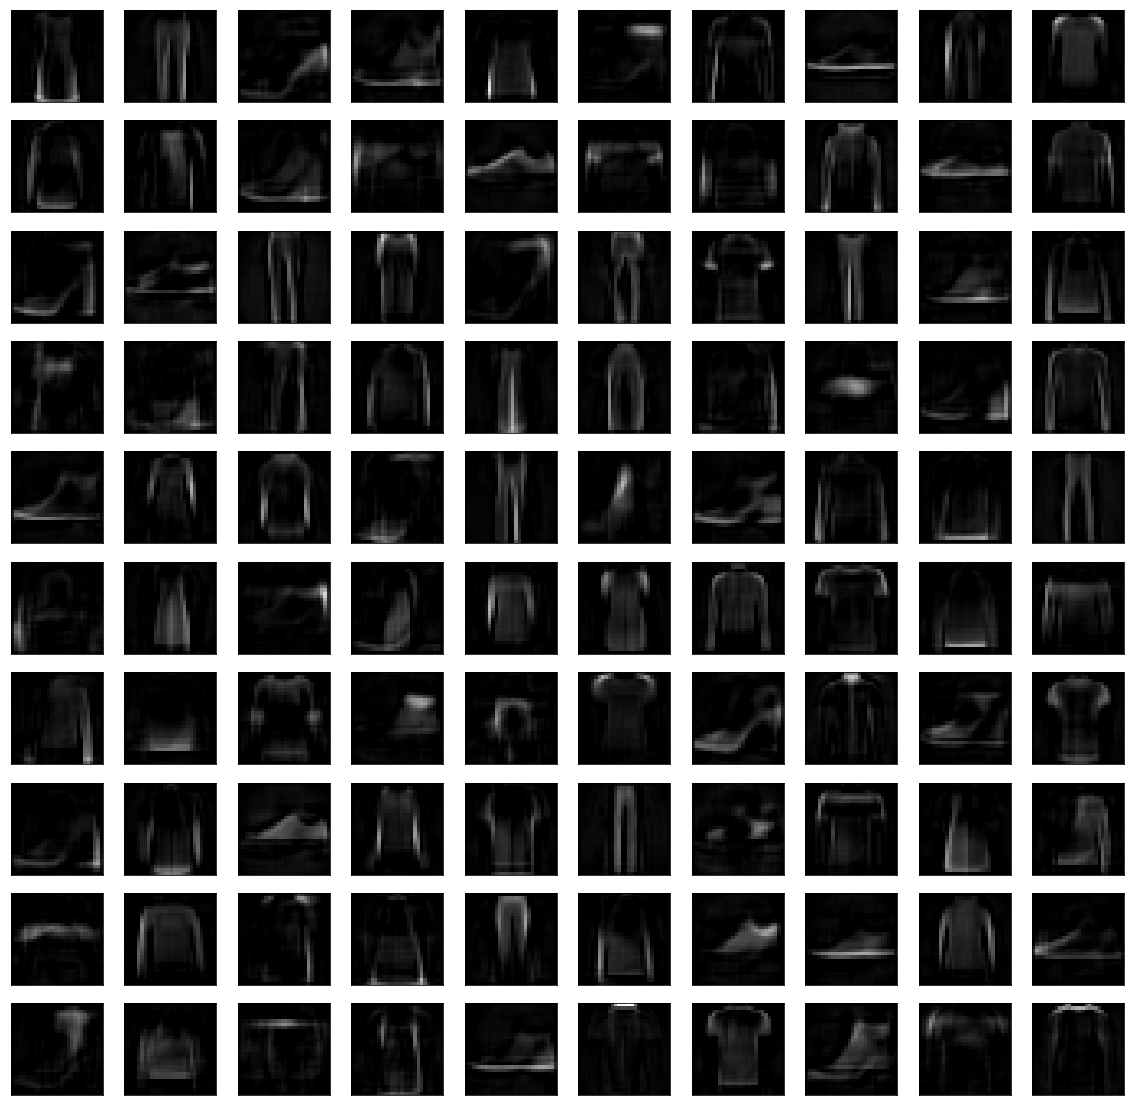

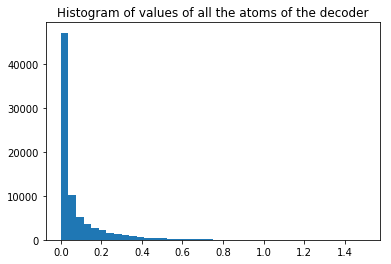

In [16]:
sp_o = 0.05
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


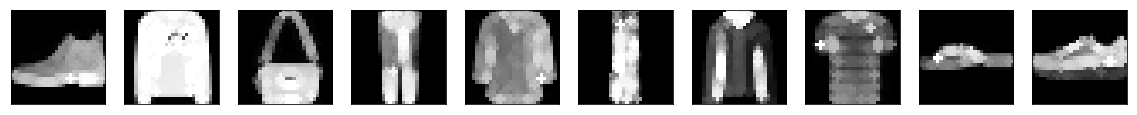

Dilatation of the reconstructions


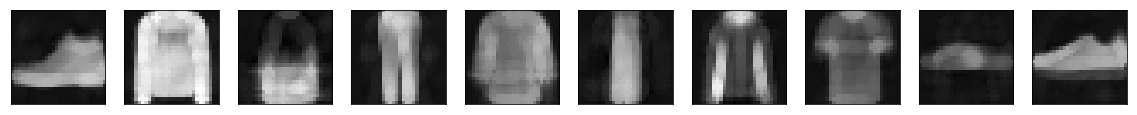

Original images and max-approximation to dilatation
Max-approx error to original:  0.16376103924822308  - Max-approx error to reconstruction:  0.14406977557973466


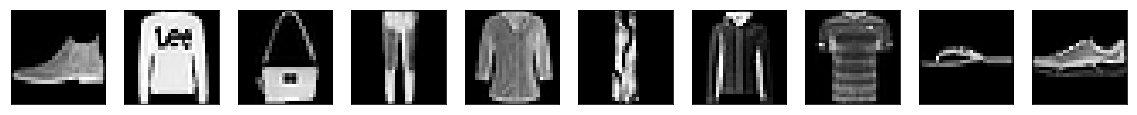

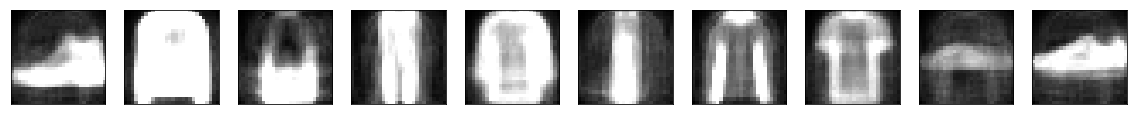

Dilated of the atom images of the decoder


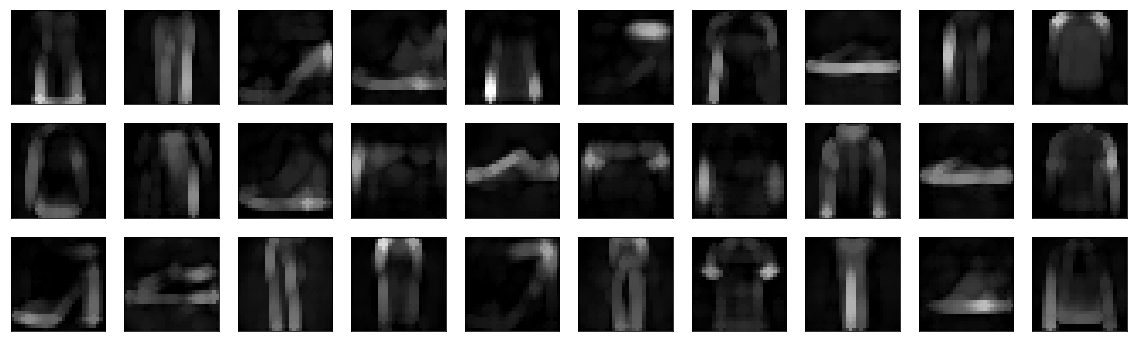

In [17]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.4 Sparsity_weight = 0.005 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.012423222


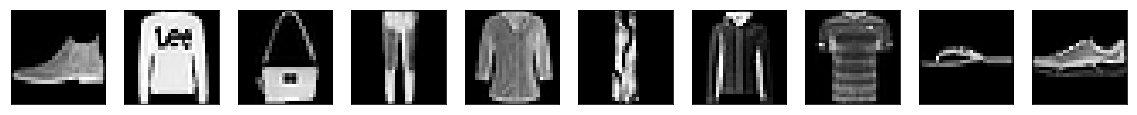

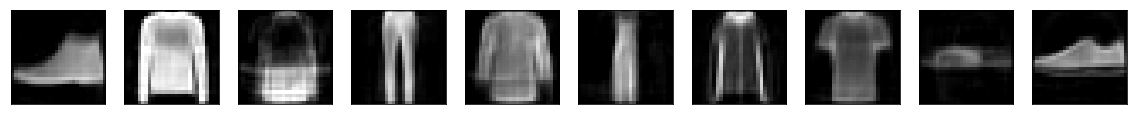

Histograms of the encodings - Sparsity (Hoyer):  0.6042144298553467


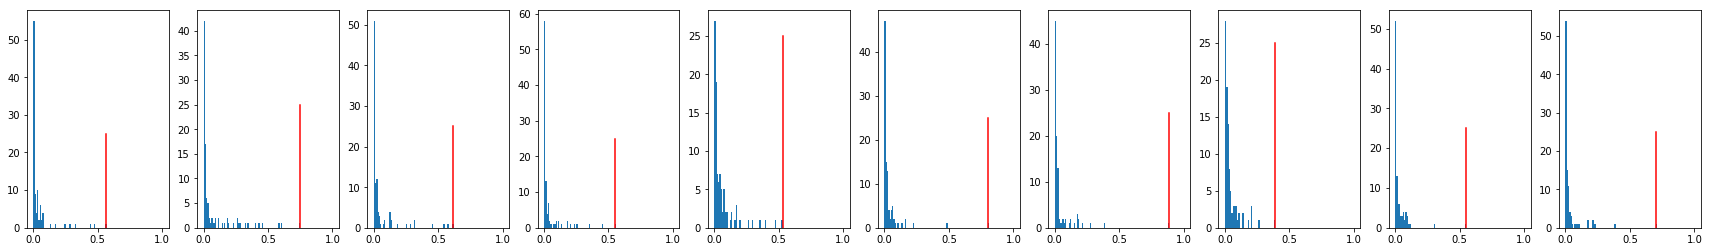

Atom images of the decoder


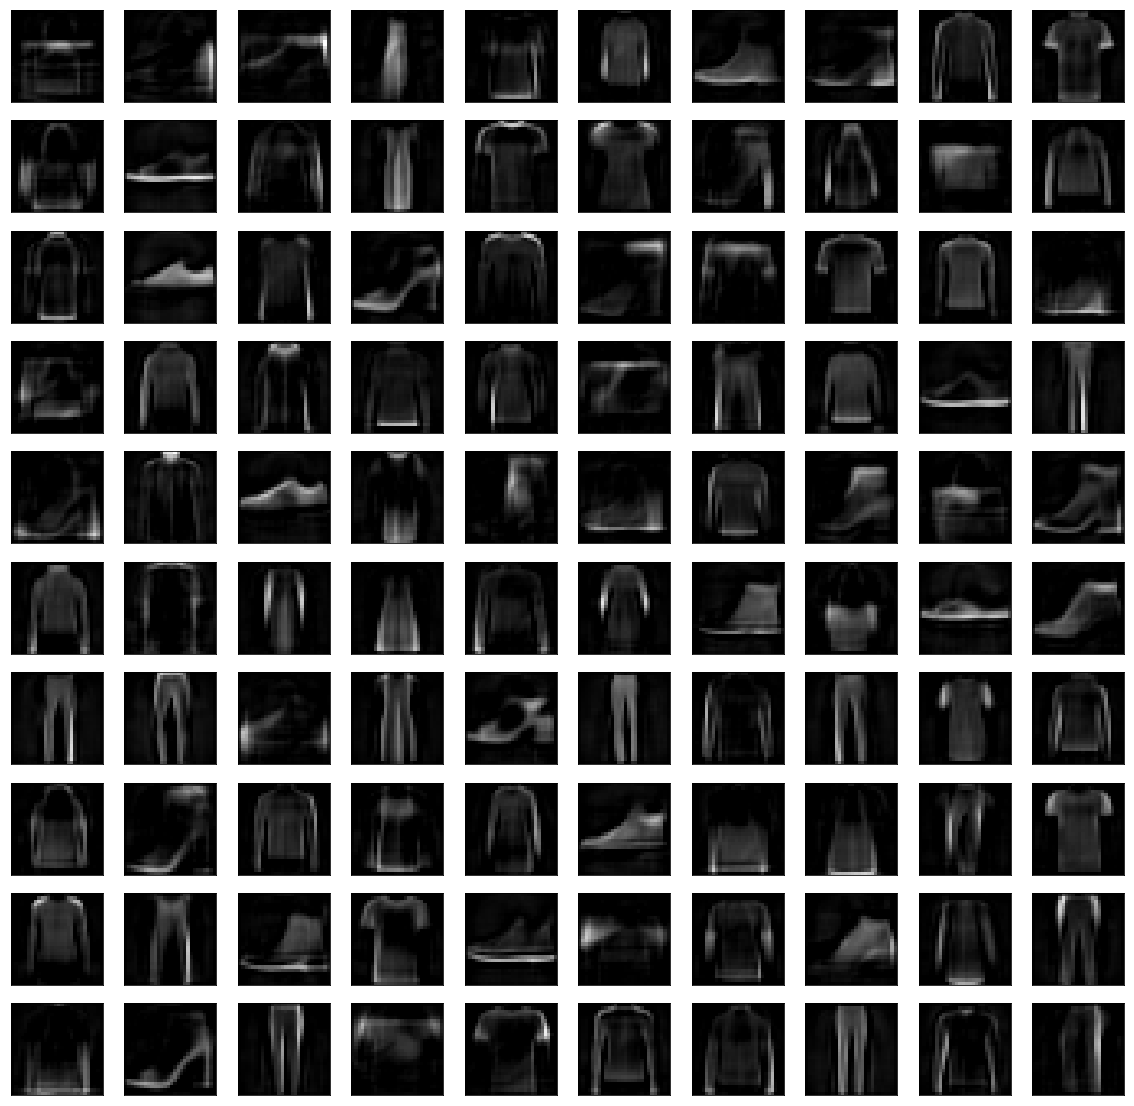

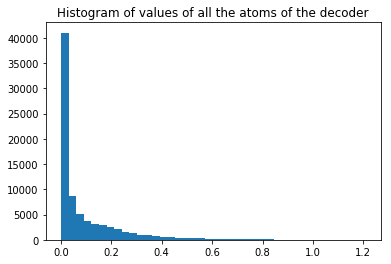

In [18]:
sp_o = 0.05
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


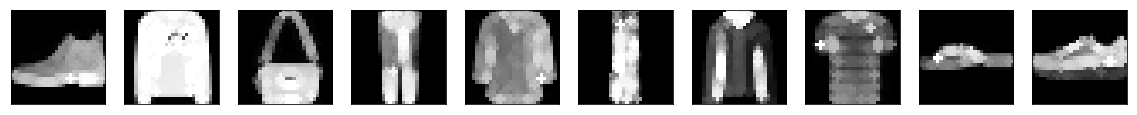

Dilatation of the reconstructions


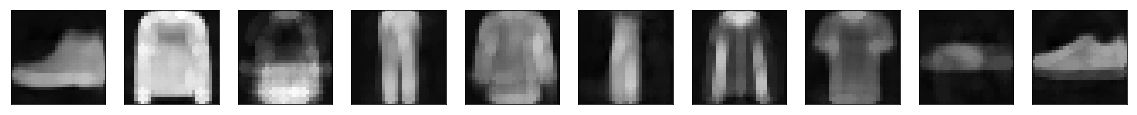

Original images and max-approximation to dilatation
Max-approx error to original:  0.13437853886657636  - Max-approx error to reconstruction:  0.07626421861459069


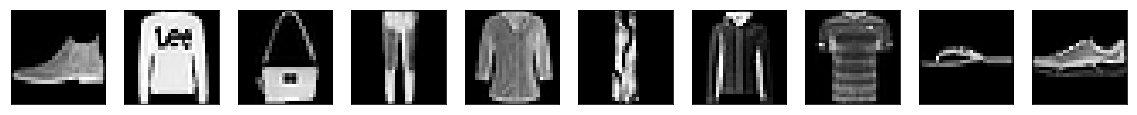

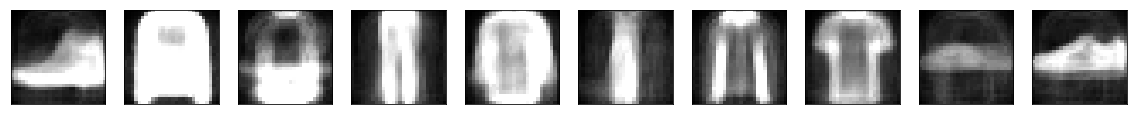

Dilated of the atom images of the decoder


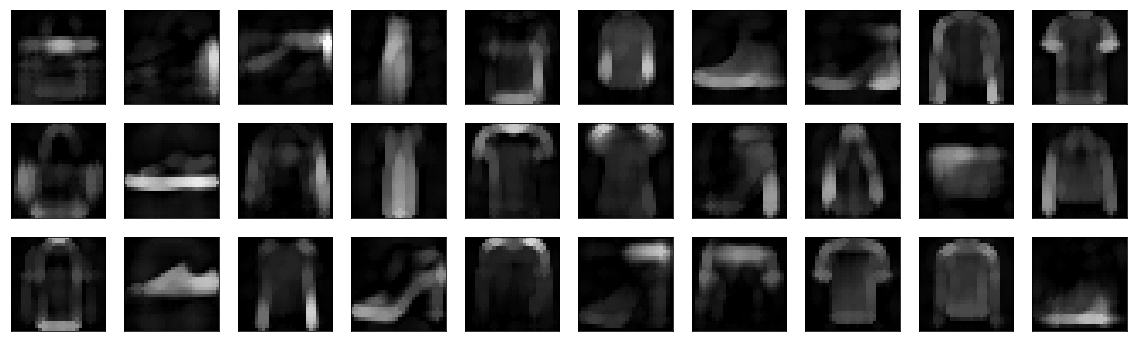

In [19]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.5 Sparsity_weight = 0.01 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.013288442


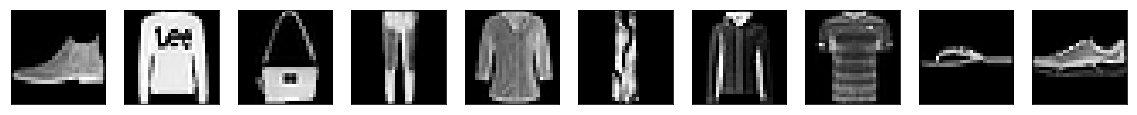

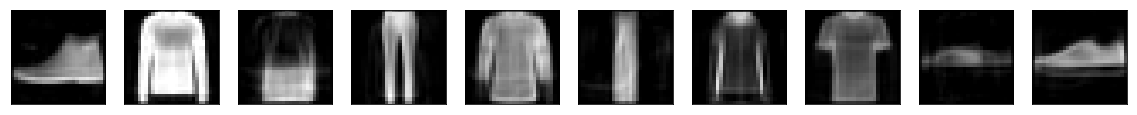

Histograms of the encodings - Sparsity (Hoyer):  0.5944302678108215


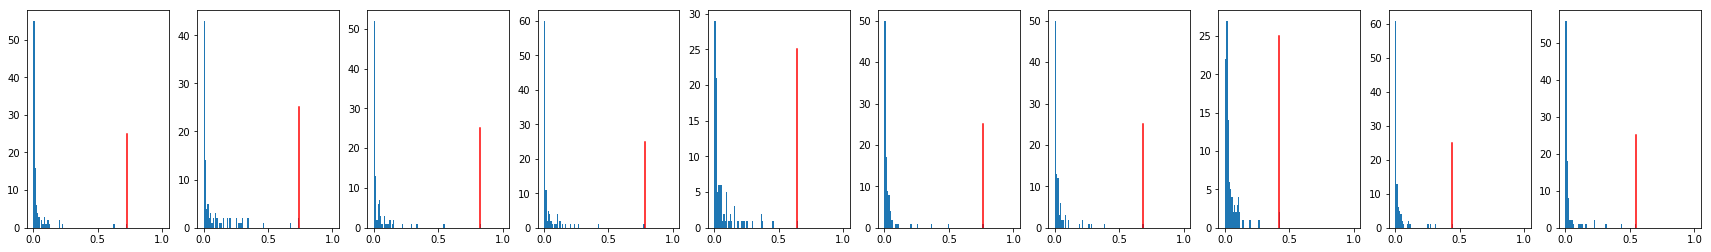

Atom images of the decoder


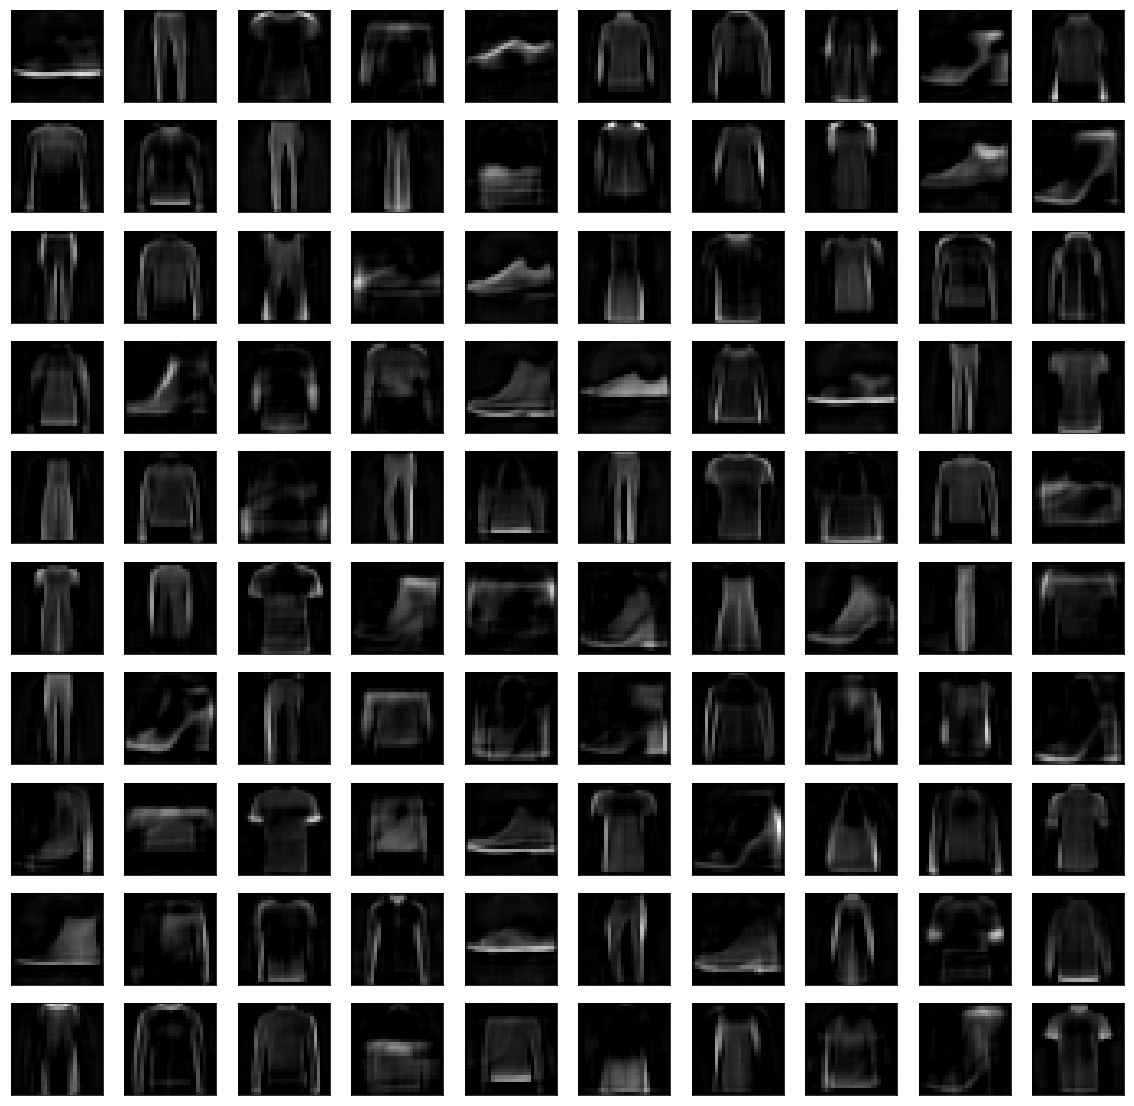

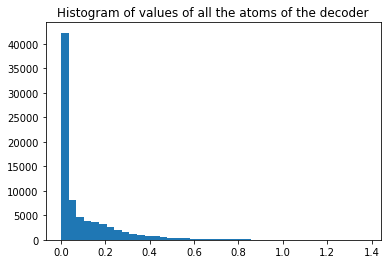

In [20]:
sp_o = 0.05
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


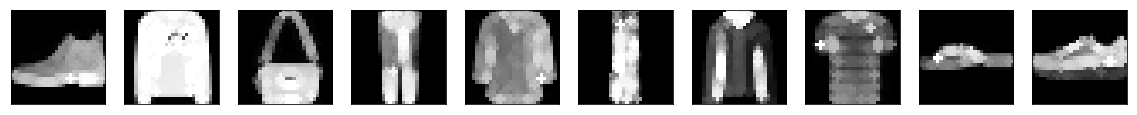

Dilatation of the reconstructions


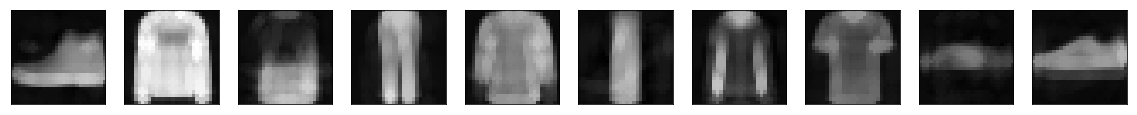

Original images and max-approximation to dilatation
Max-approx error to original:  0.14289296200053112  - Max-approx error to reconstruction:  0.1124332572152393


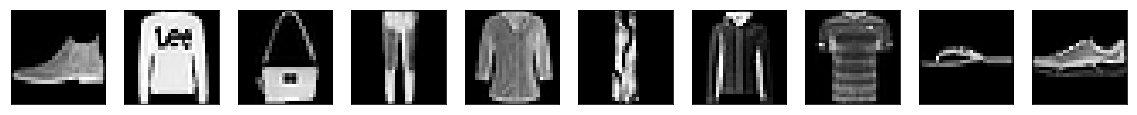

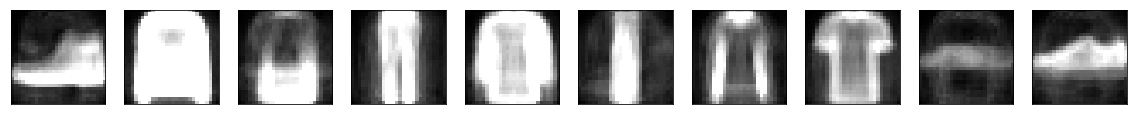

Dilated of the atom images of the decoder


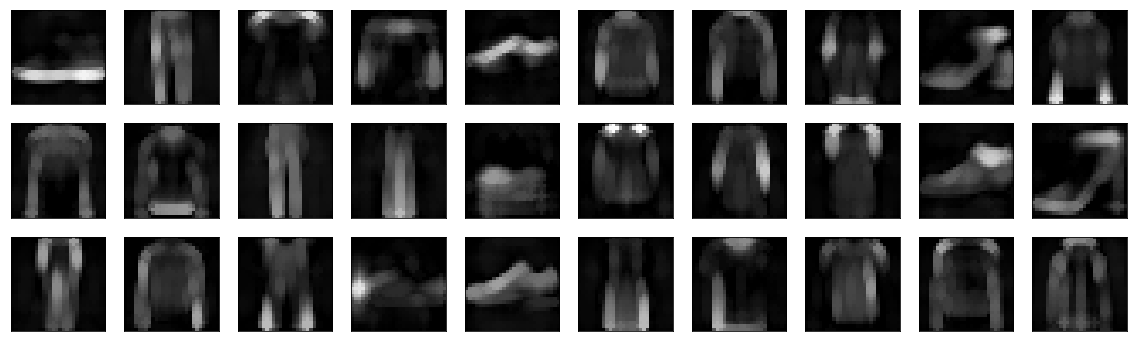

In [21]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 3. Sparsity_Objective = 0.1

## 3.1 Sparsity_weight = 0.0001 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.0093837315


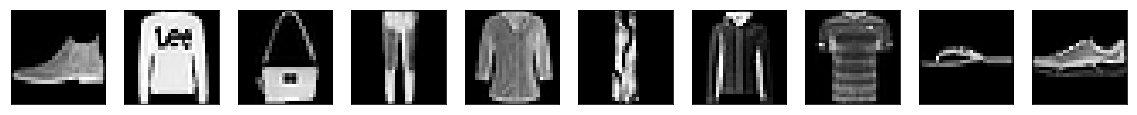

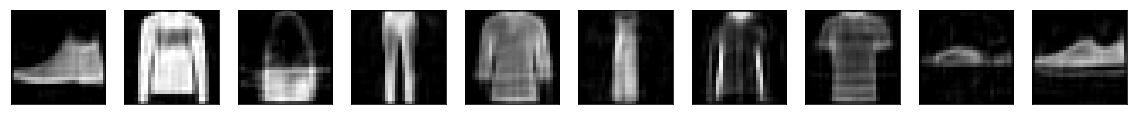

Histograms of the encodings - Sparsity (Hoyer):  0.34602513909339905


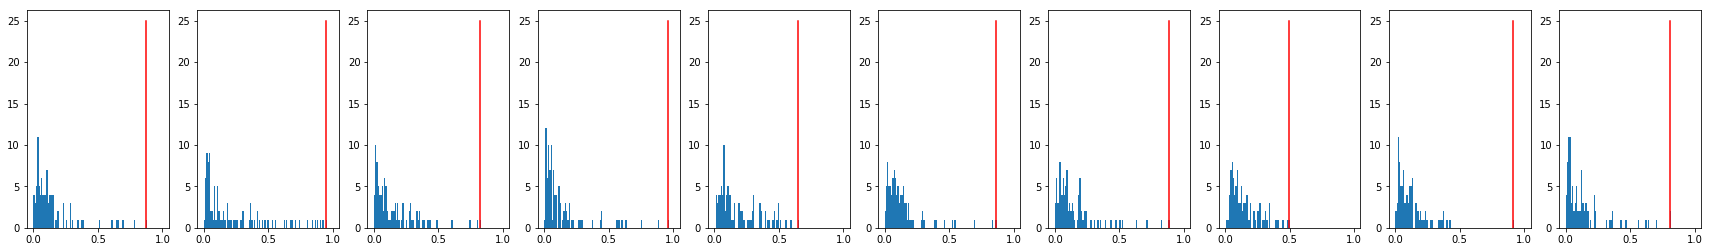

Atom images of the decoder


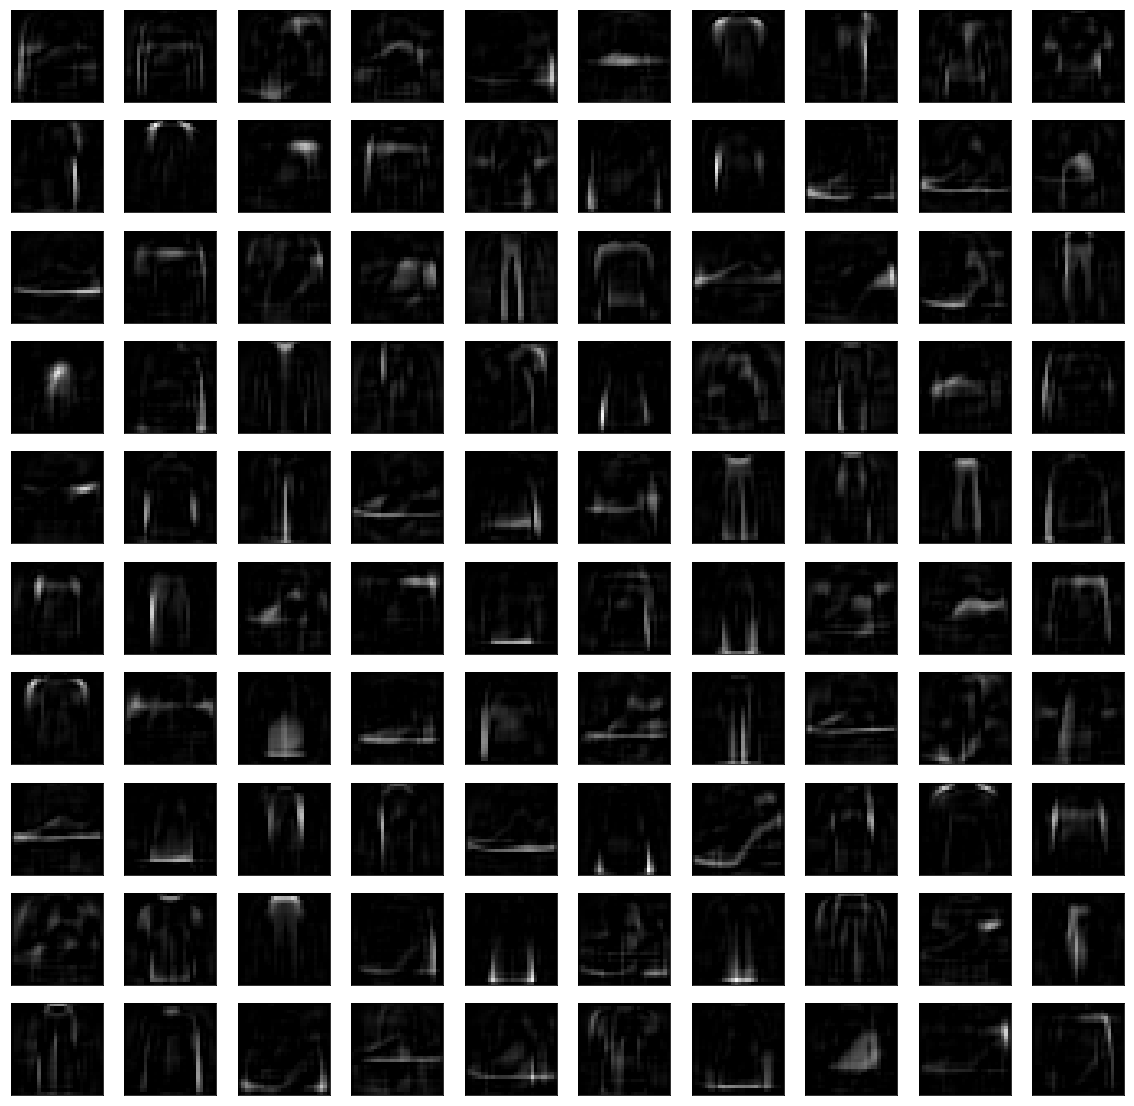

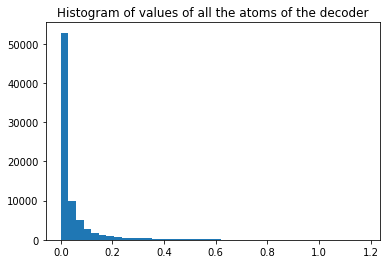

In [22]:
sp_o = 0.1
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


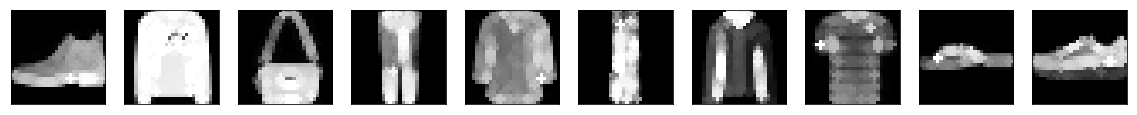

Dilatation of the reconstructions


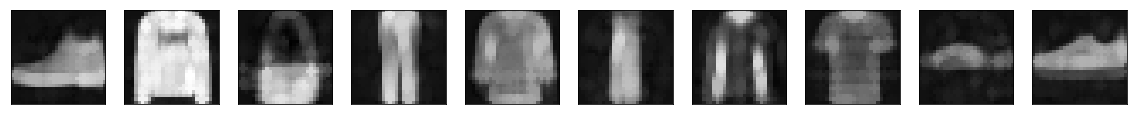

Original images and max-approximation to dilatation
Max-approx error to original:  0.3753164565218097  - Max-approx error to reconstruction:  0.5596184923859181


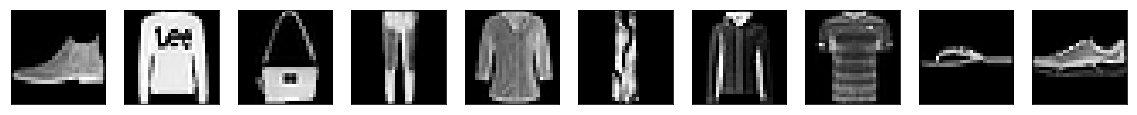

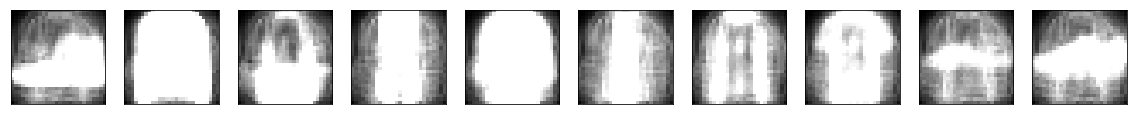

Dilated of the atom images of the decoder


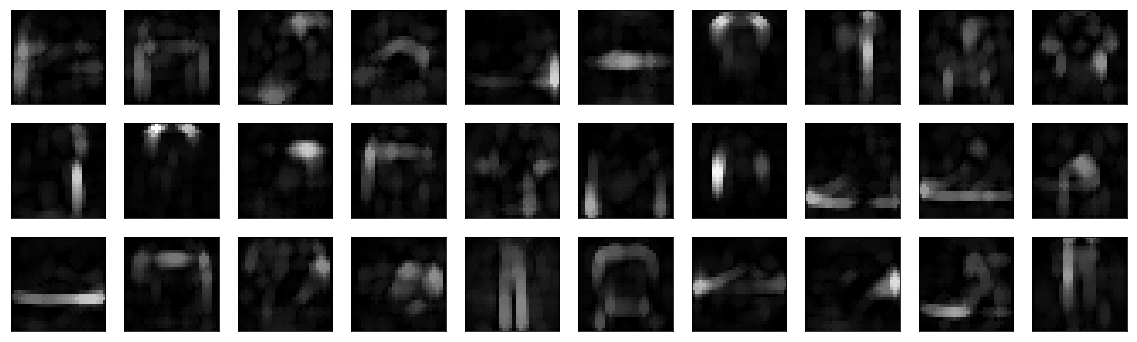

In [23]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.2 Sparsity_weight = 0.0005 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.010007196


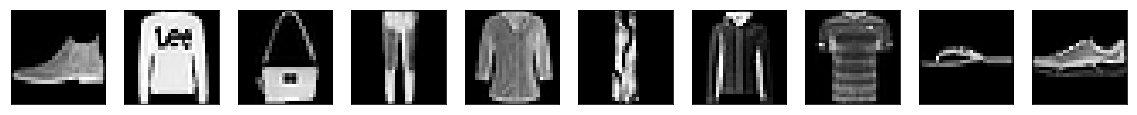

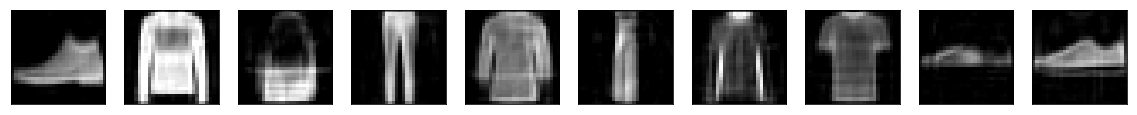

Histograms of the encodings - Sparsity (Hoyer):  0.4217435419559479


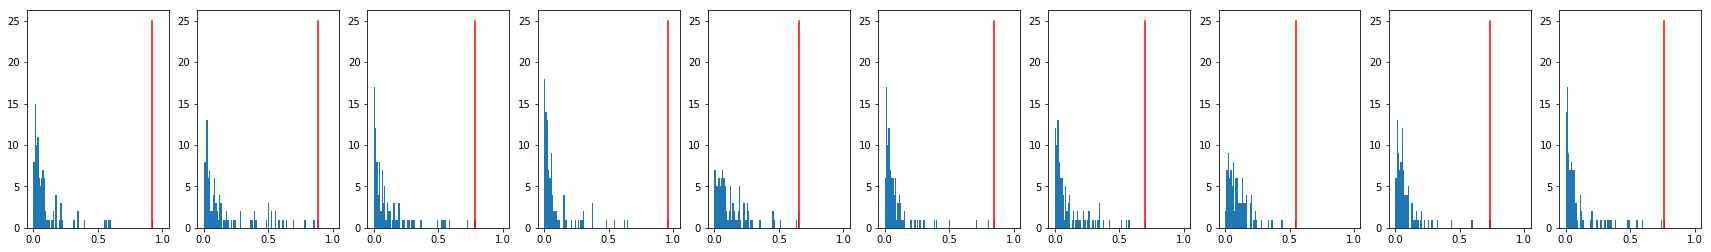

Atom images of the decoder


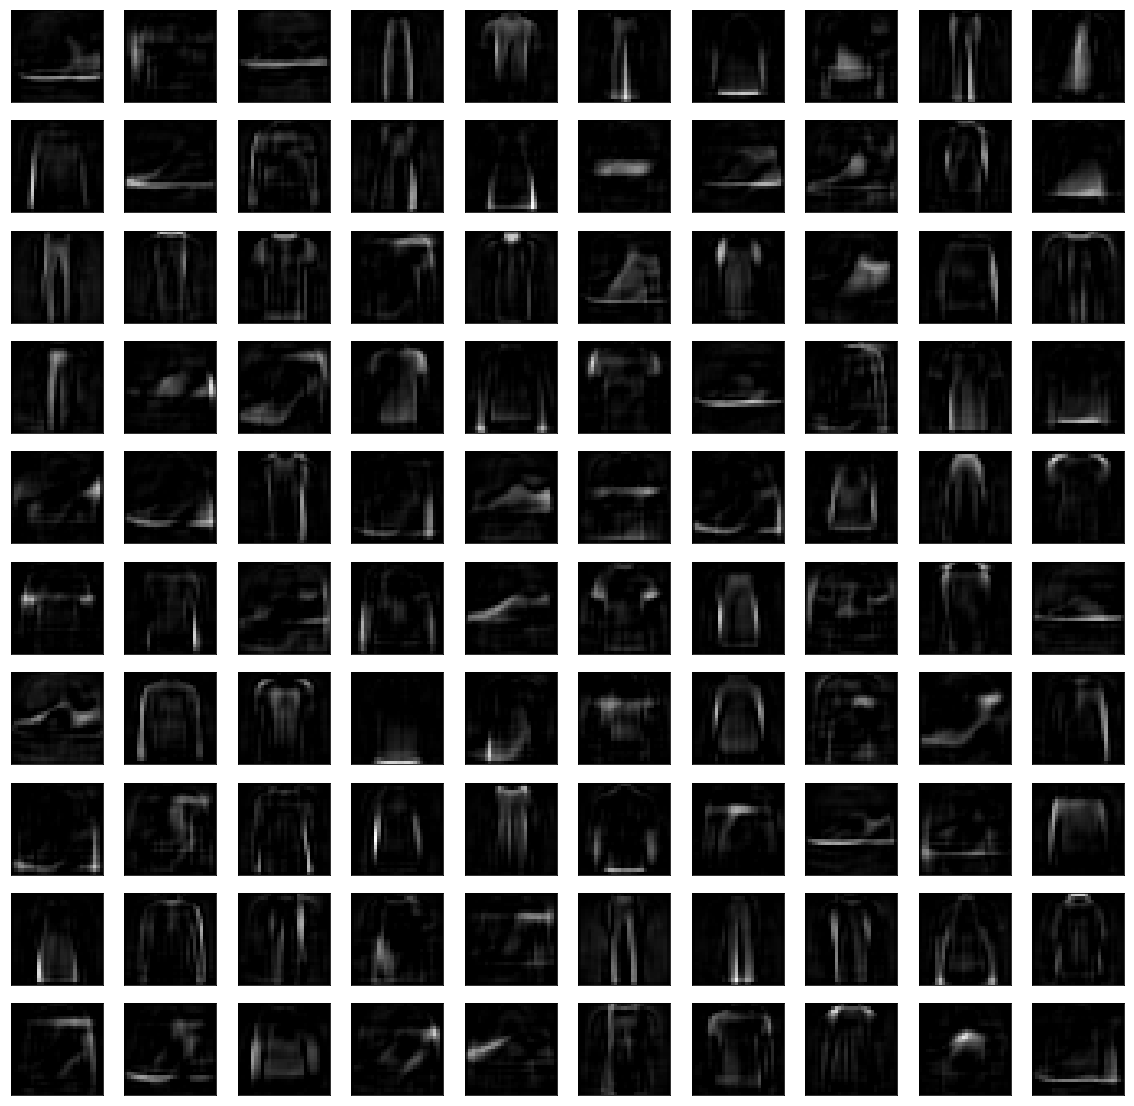

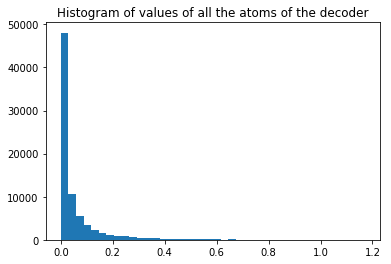

In [24]:
sp_o = 0.1
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


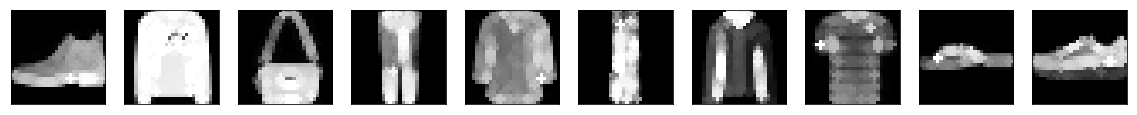

Dilatation of the reconstructions


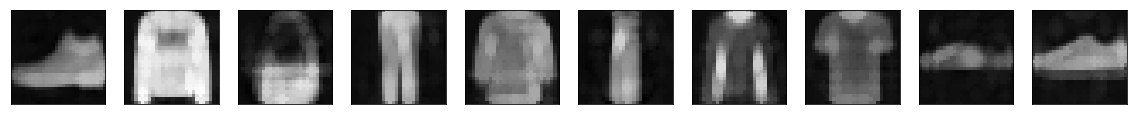

Original images and max-approximation to dilatation
Max-approx error to original:  0.29572808405777584  - Max-approx error to reconstruction:  0.3727652191943584


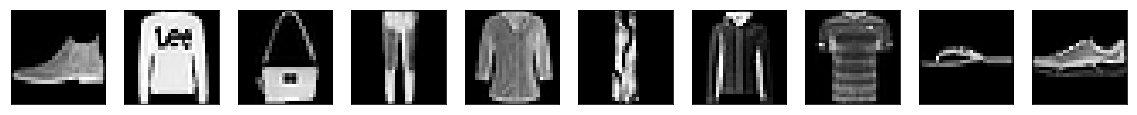

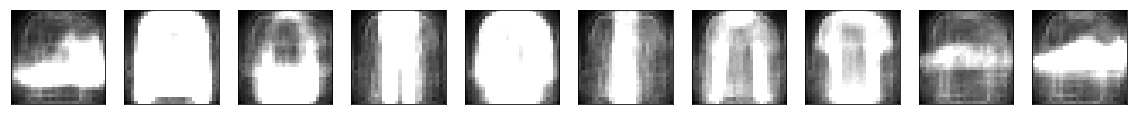

Dilated of the atom images of the decoder


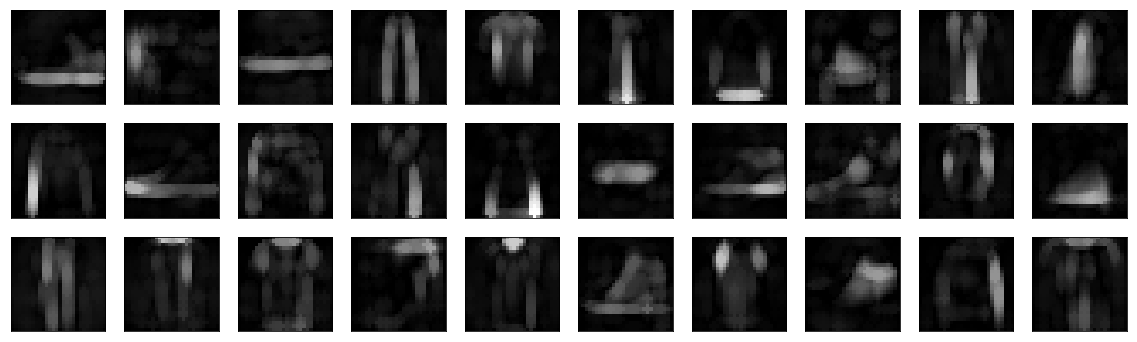

In [25]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.3 Sparsity_weight = 0.001 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.010272945


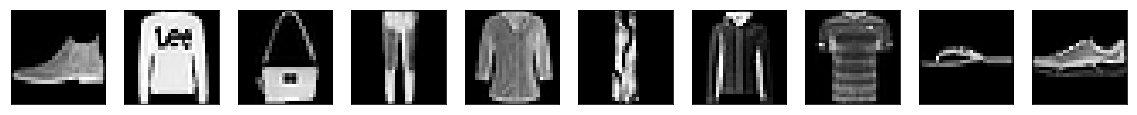

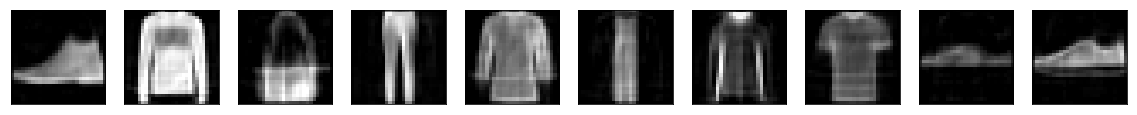

Histograms of the encodings - Sparsity (Hoyer):  0.44355106353759766


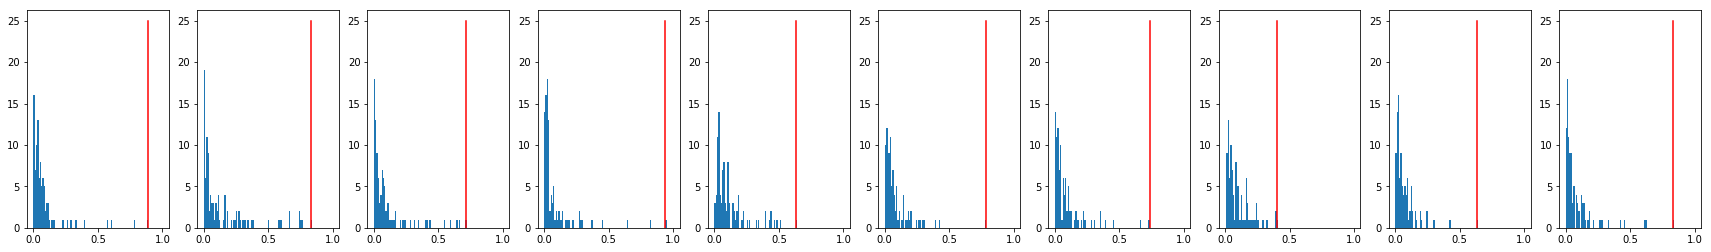

Atom images of the decoder


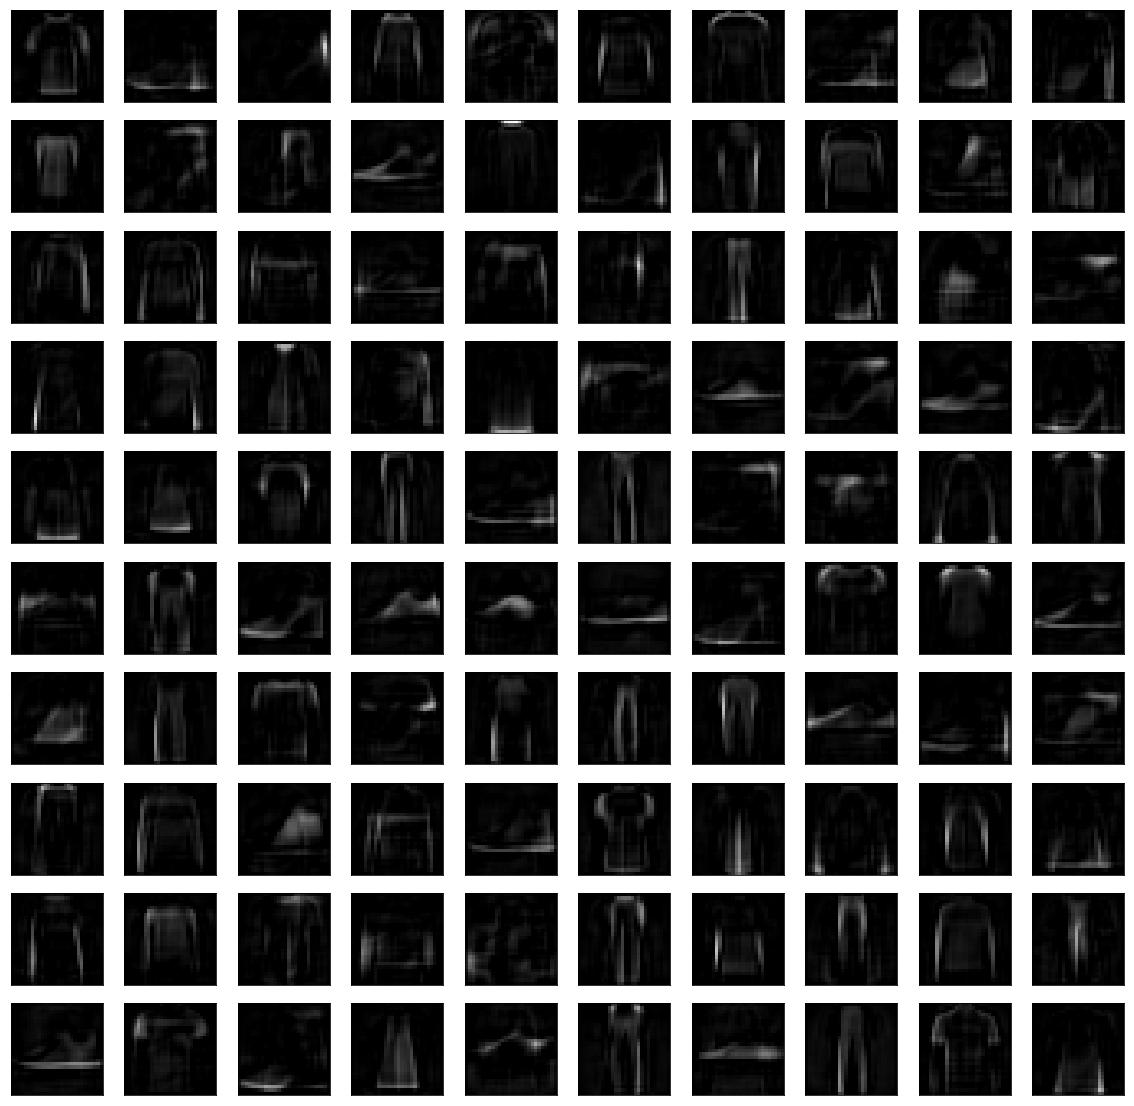

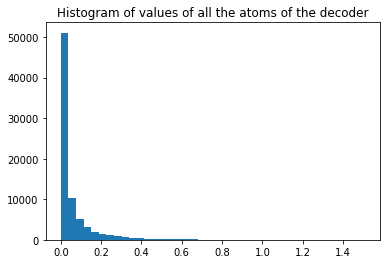

In [26]:
sp_o = 0.1
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


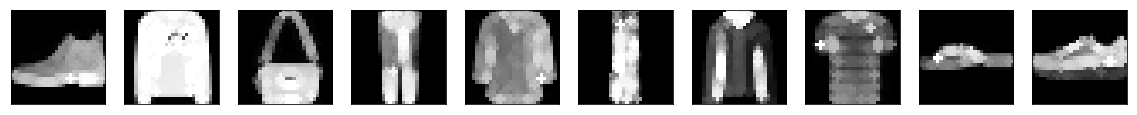

Dilatation of the reconstructions


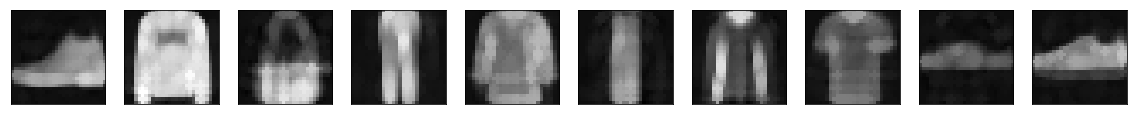

Original images and max-approximation to dilatation
Max-approx error to original:  0.2708067246899223  - Max-approx error to reconstruction:  0.32833340349395257


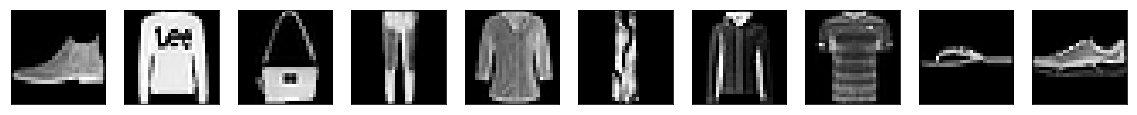

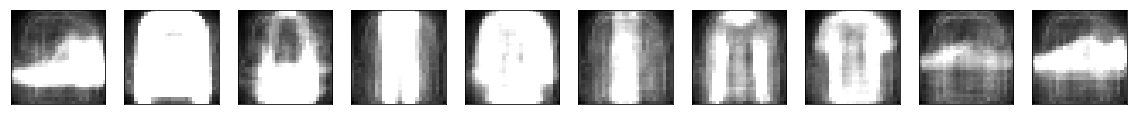

Dilated of the atom images of the decoder


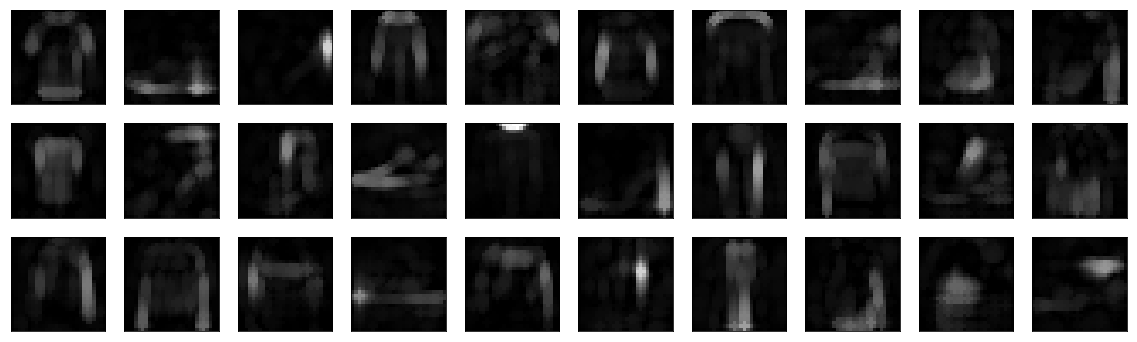

In [27]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.4 Sparsity_weight = 0.005 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.01044249


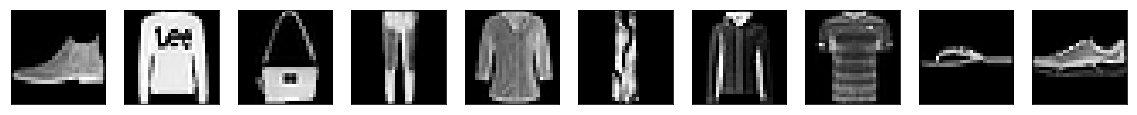

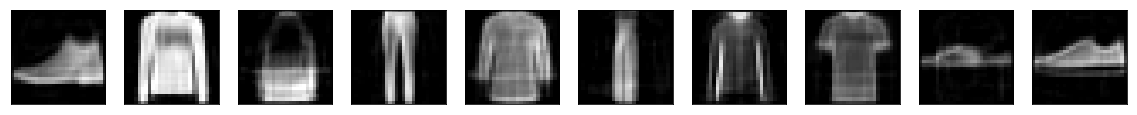

Histograms of the encodings - Sparsity (Hoyer):  0.45039698481559753


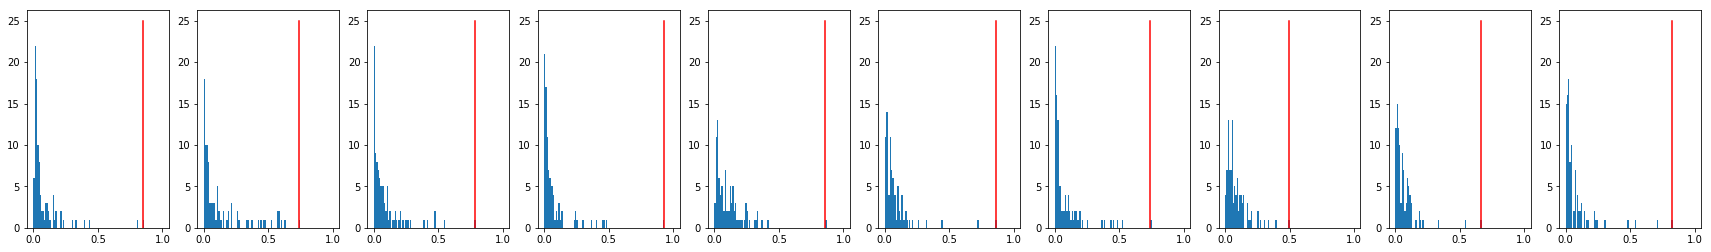

Atom images of the decoder


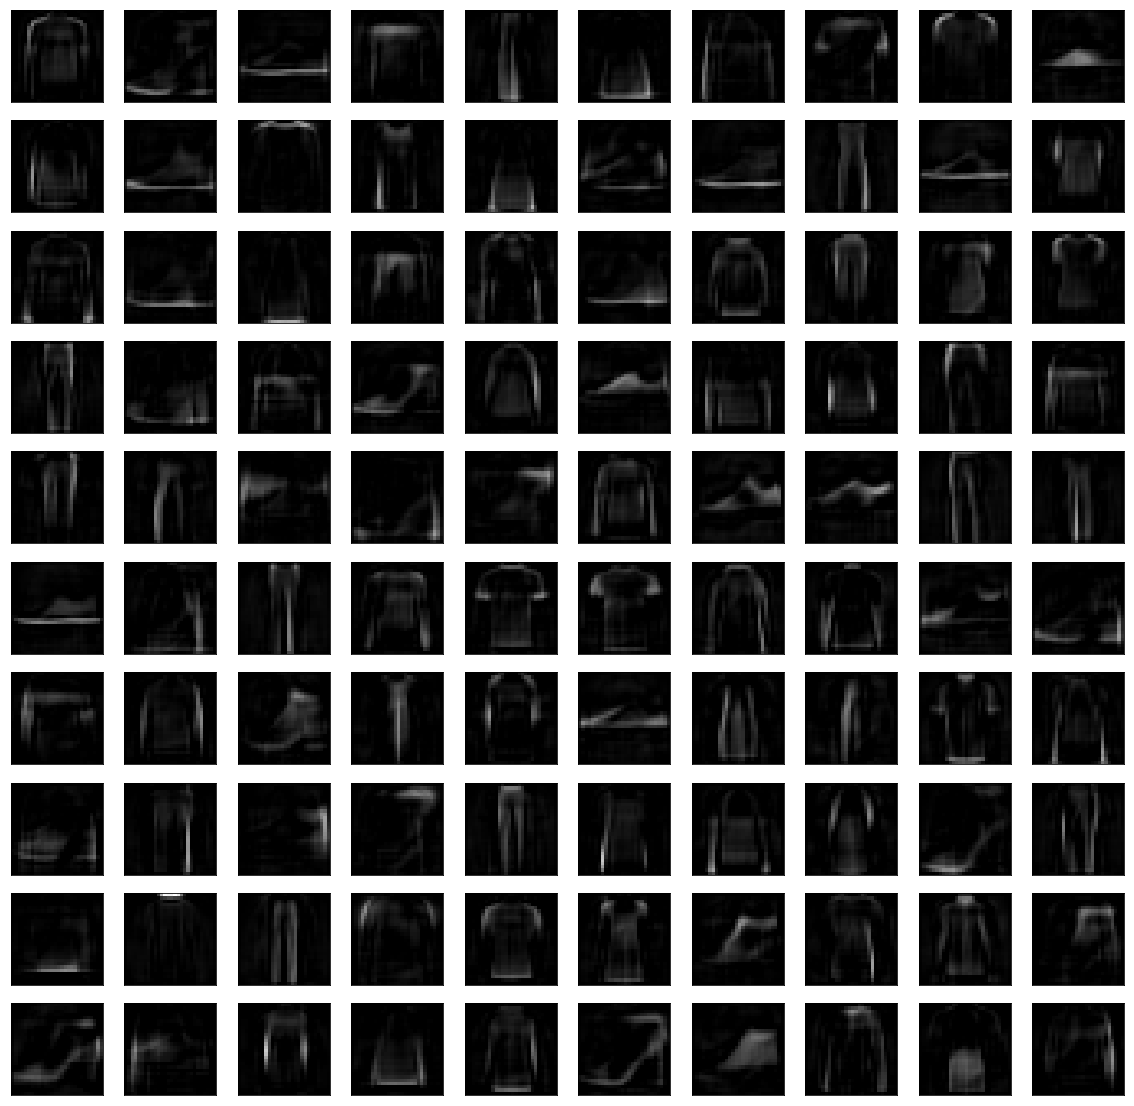

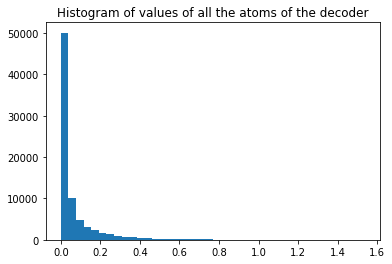

In [28]:
sp_o = 0.1
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


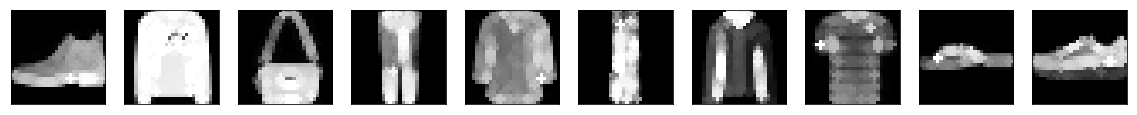

Dilatation of the reconstructions


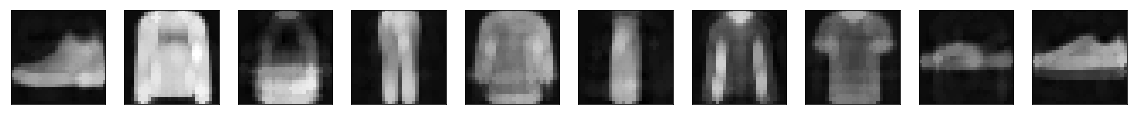

Original images and max-approximation to dilatation
Max-approx error to original:  0.2642739675736152  - Max-approx error to reconstruction:  0.28214339064095456


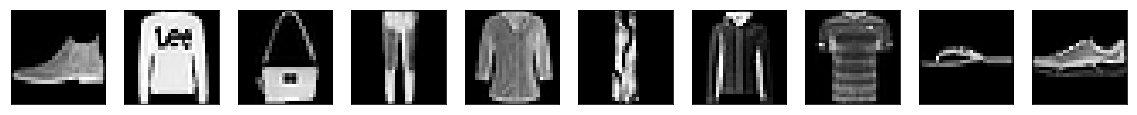

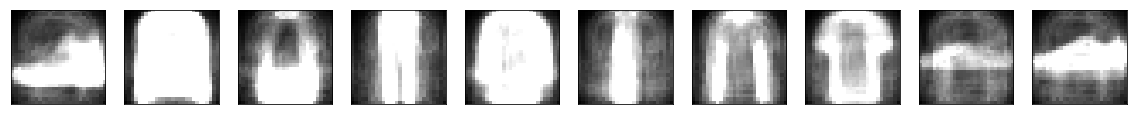

Dilated of the atom images of the decoder


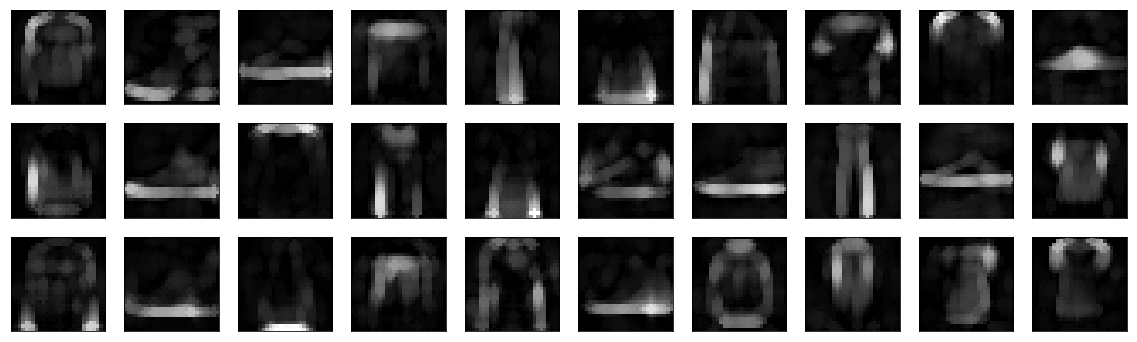

In [29]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.5 Sparsity_weight = 0.01 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.011032887


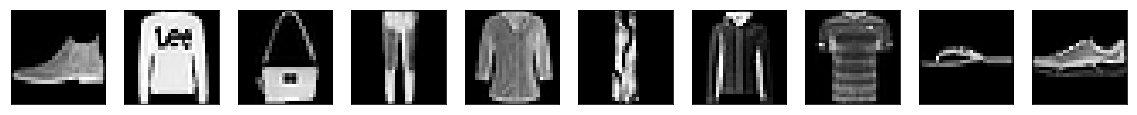

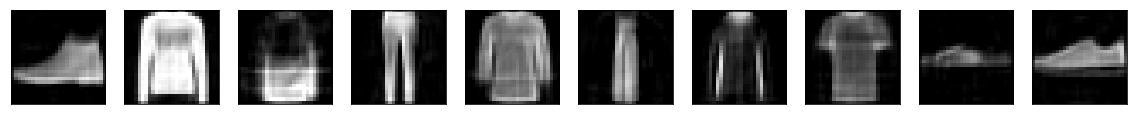

Histograms of the encodings - Sparsity (Hoyer):  0.4395374059677124


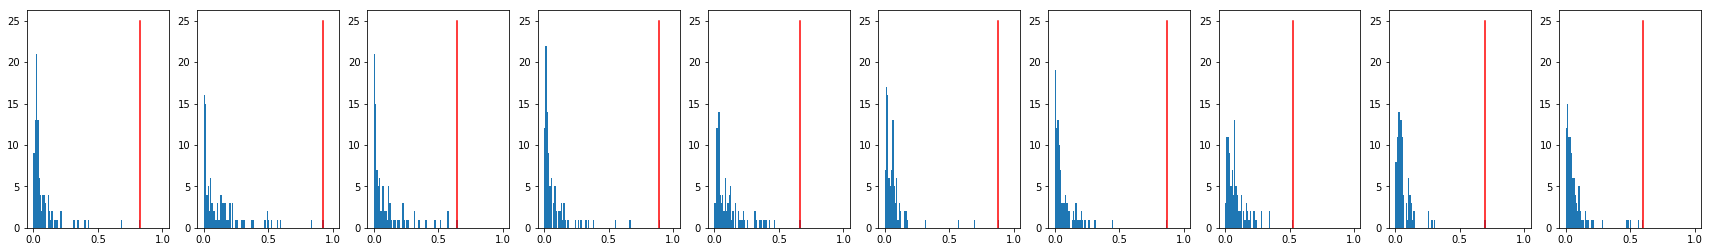

Atom images of the decoder


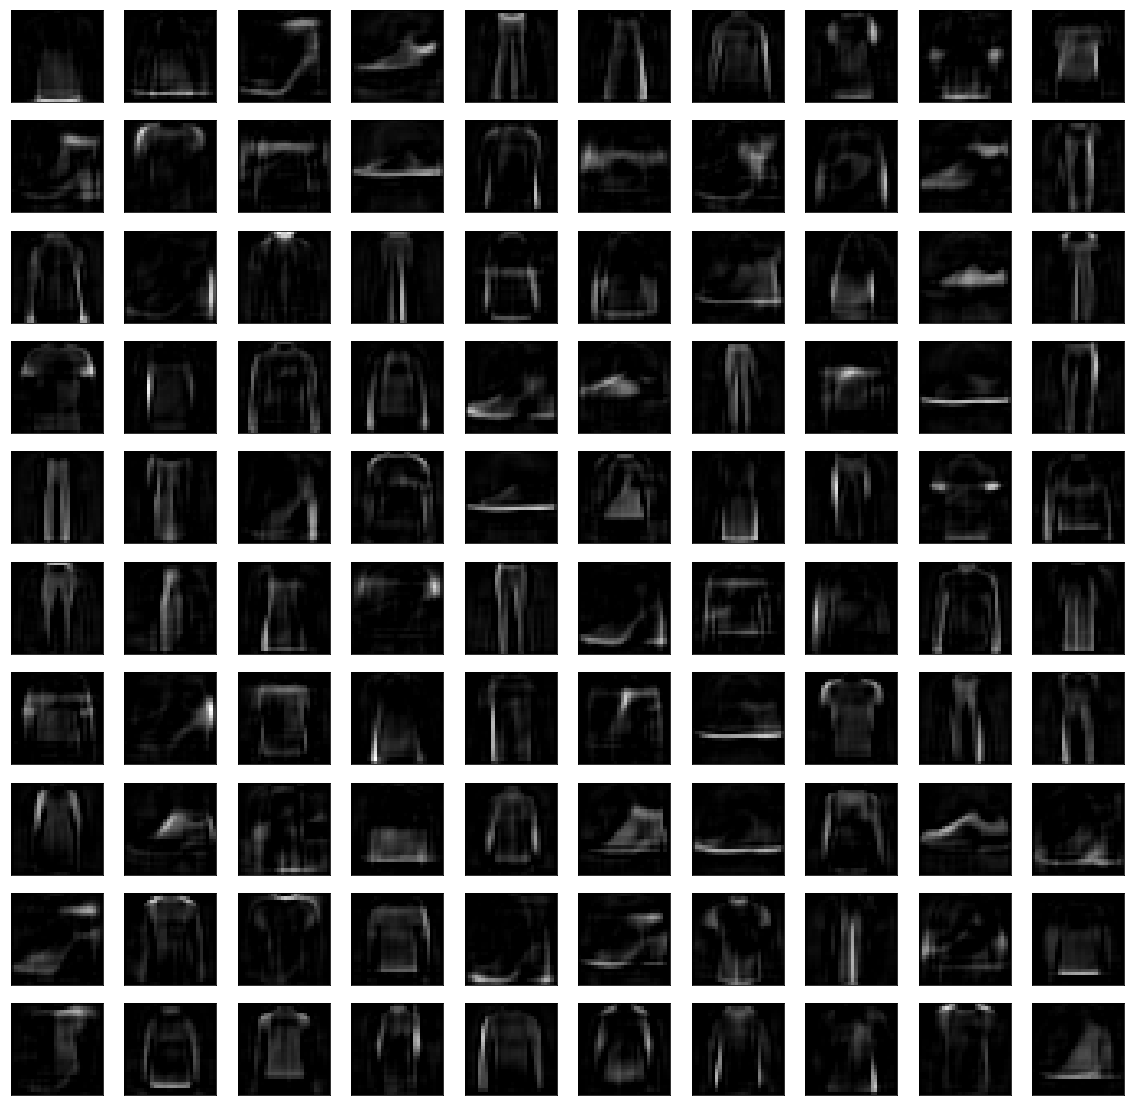

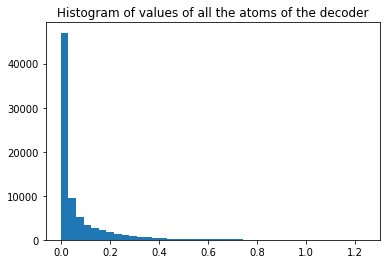

In [30]:
sp_o = 0.1
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


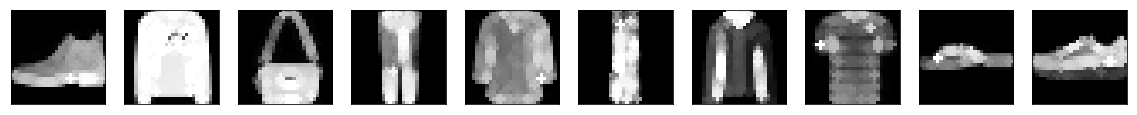

Dilatation of the reconstructions


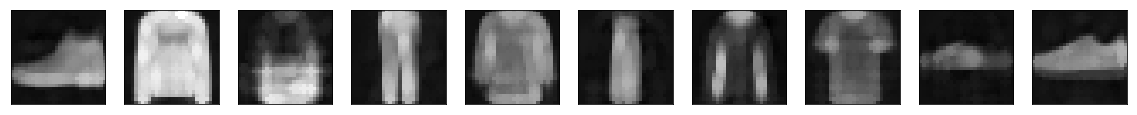

Original images and max-approximation to dilatation
Max-approx error to original:  0.2759823440346797  - Max-approx error to reconstruction:  0.33040019116407776


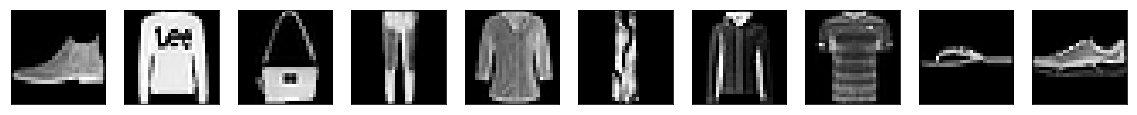

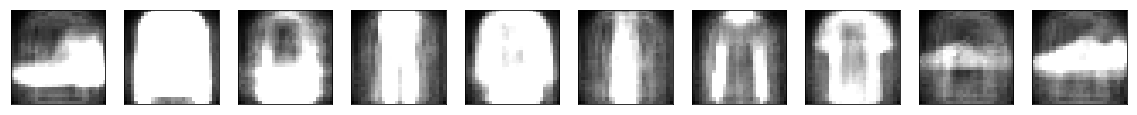

Dilated of the atom images of the decoder


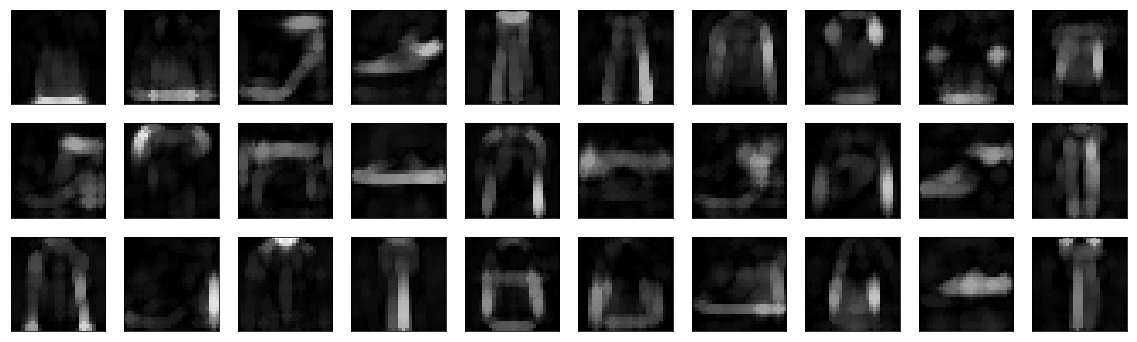

In [31]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 4. Sparsity_Objective = 0.2

## 4.1 Sparsity_weight = 0.0001 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.009114737


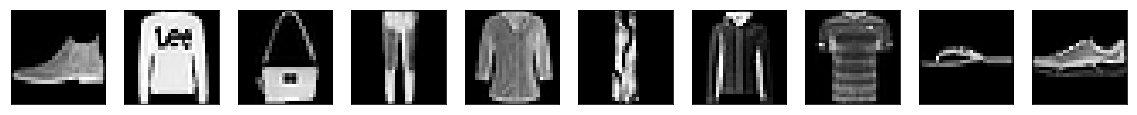

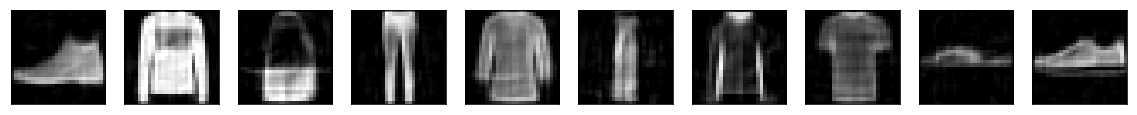

Histograms of the encodings - Sparsity (Hoyer):  0.27551695704460144


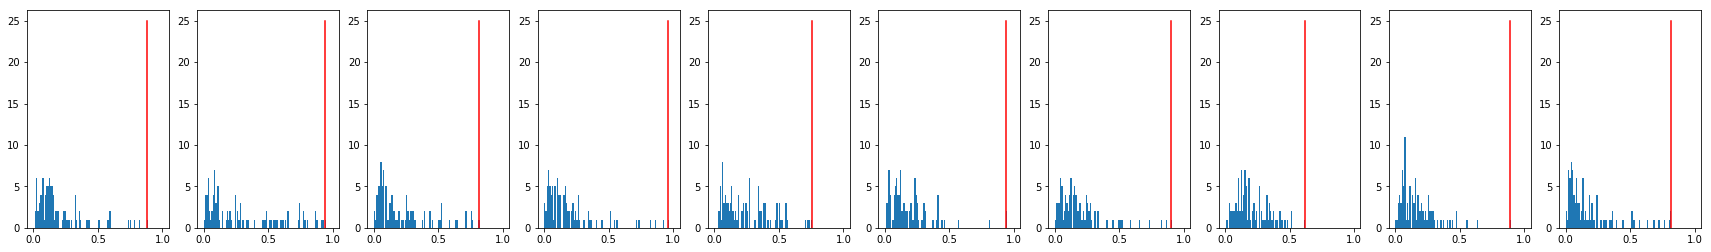

Atom images of the decoder


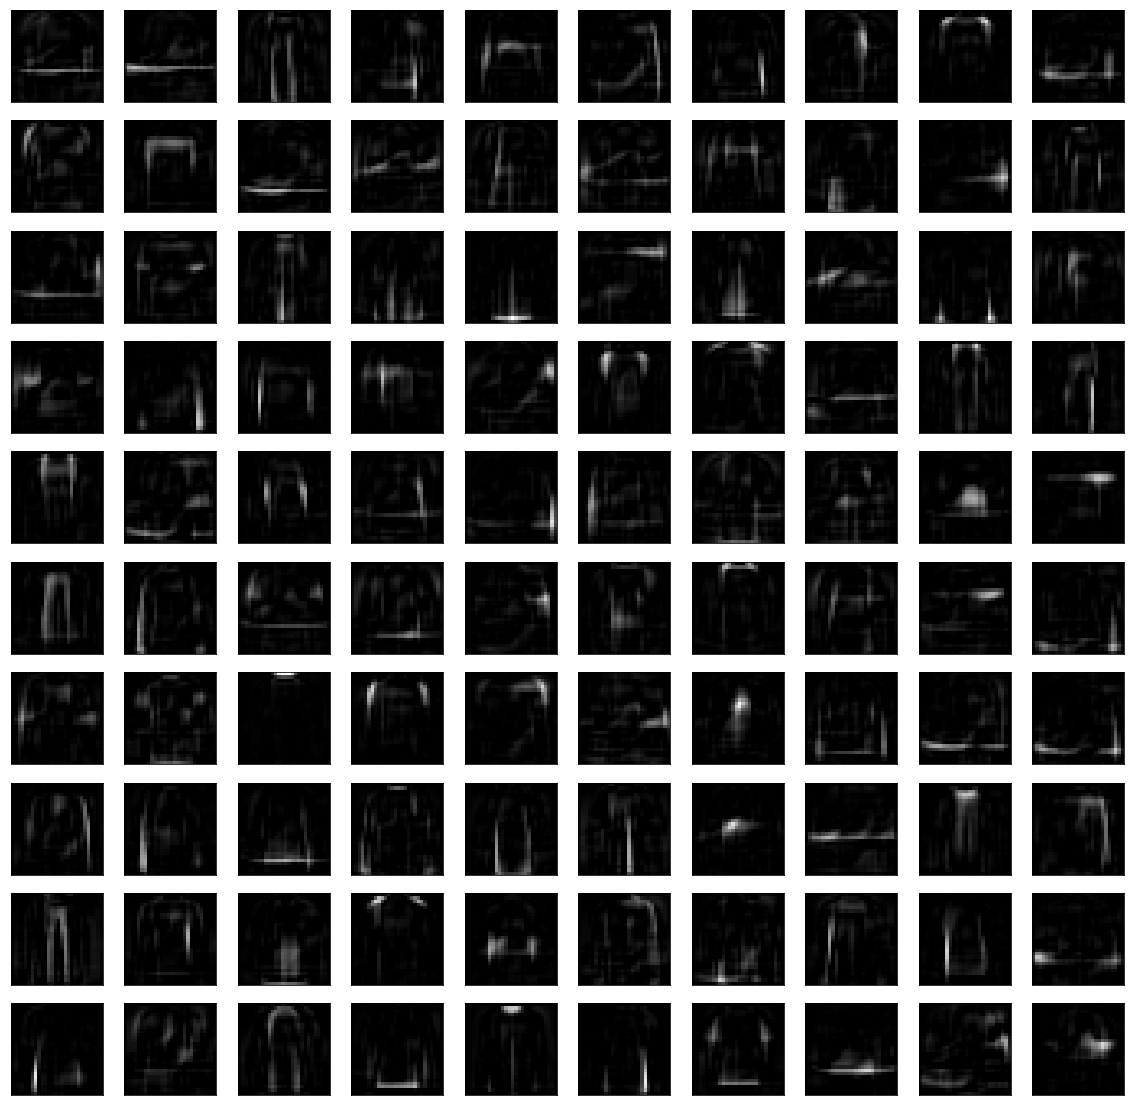

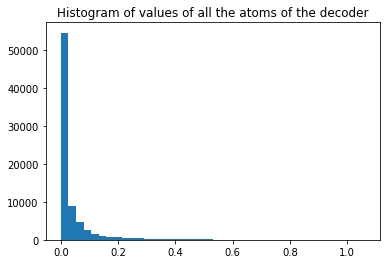

In [32]:
sp_o = 0.2
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


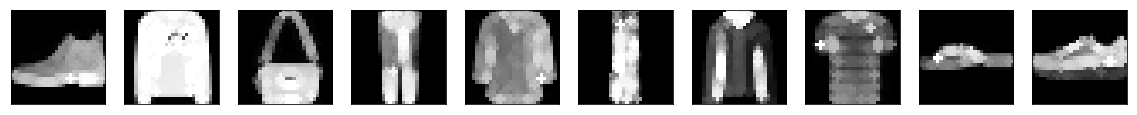

Dilatation of the reconstructions


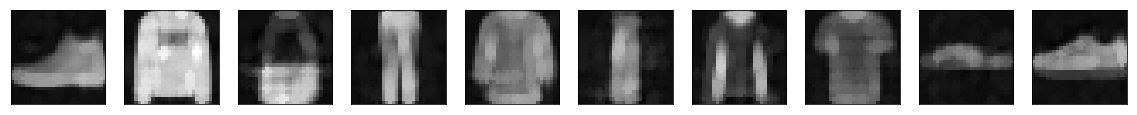

Original images and max-approximation to dilatation
Max-approx error to original:  0.43457865392691813  - Max-approx error to reconstruction:  0.8705718471983411


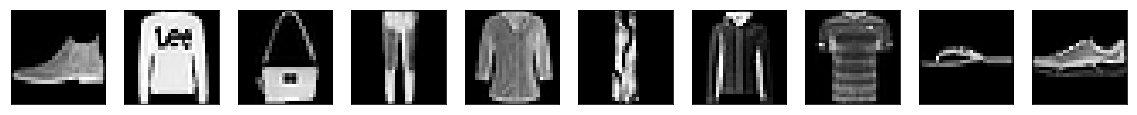

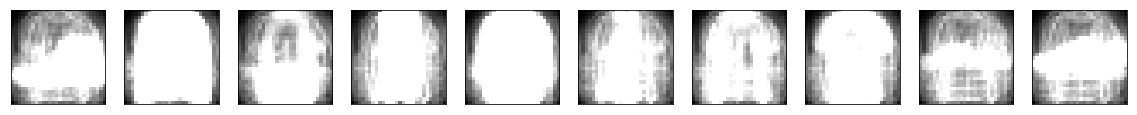

Dilated of the atom images of the decoder


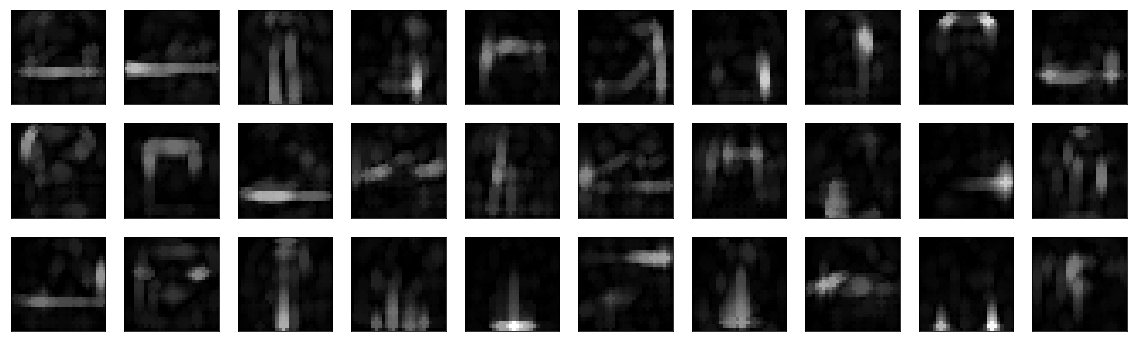

In [33]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.2 Sparsity_weight = 0.0005 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.009387247


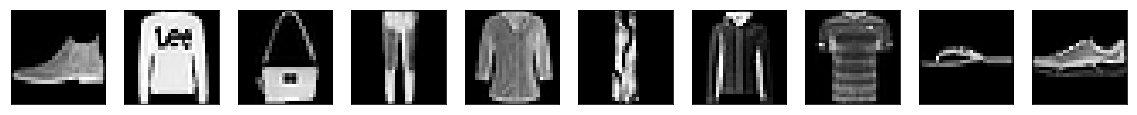

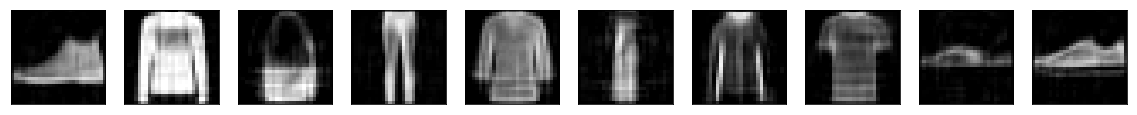

Histograms of the encodings - Sparsity (Hoyer):  0.2963990271091461


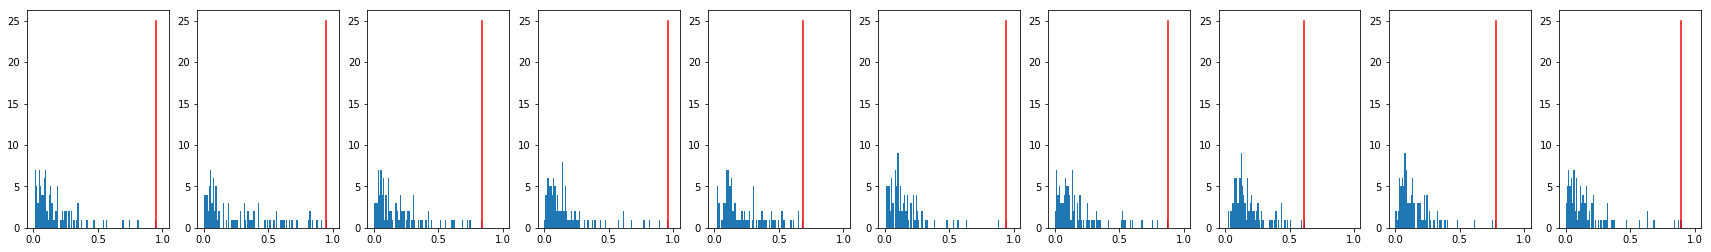

Atom images of the decoder


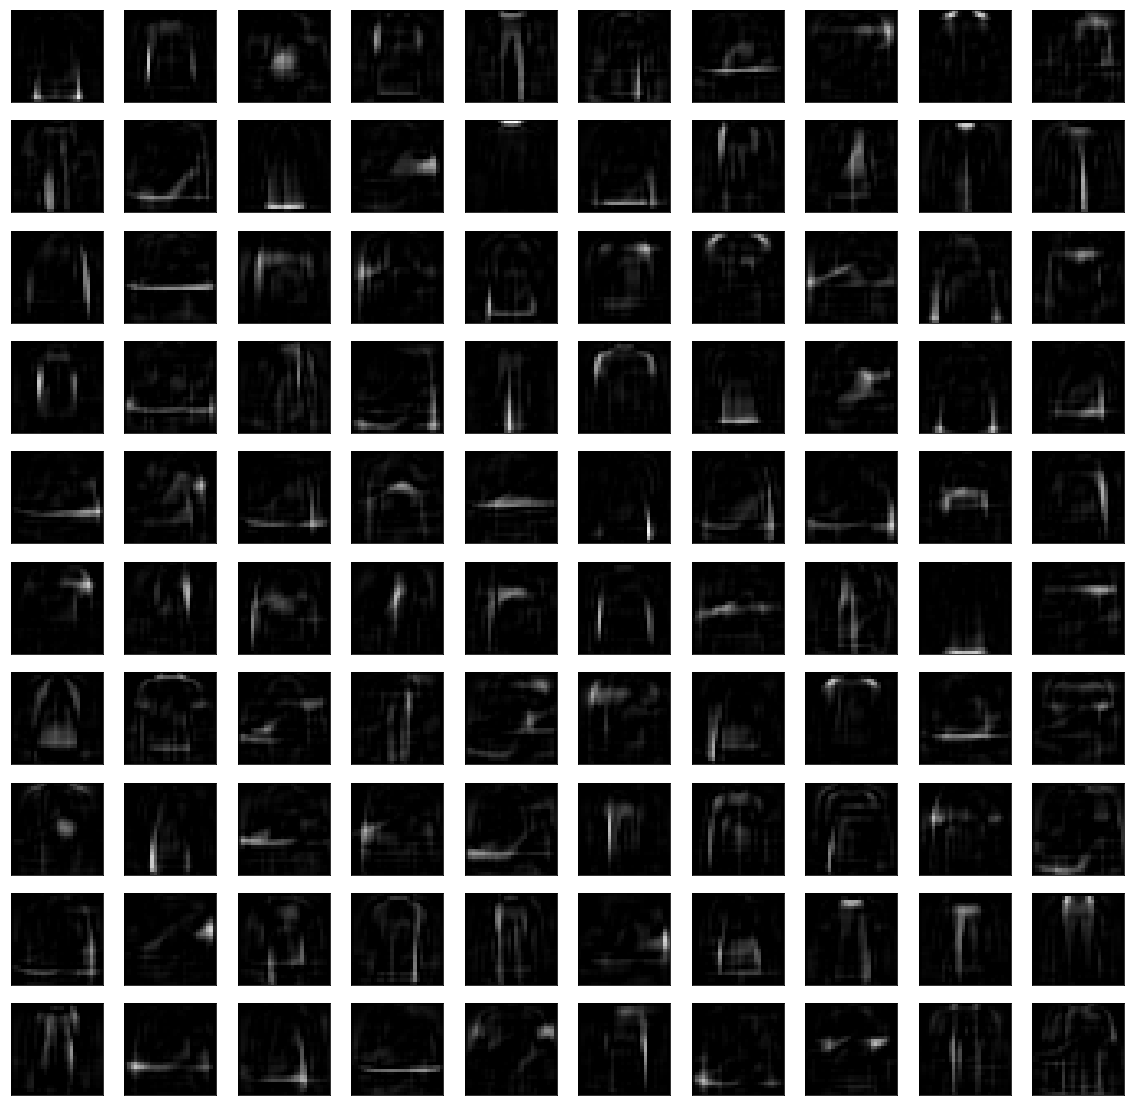

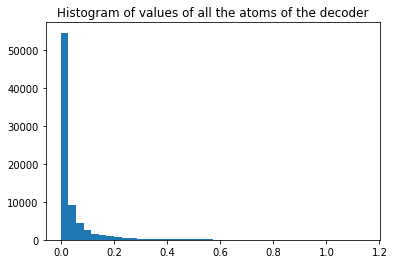

In [34]:
sp_o = 0.2
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


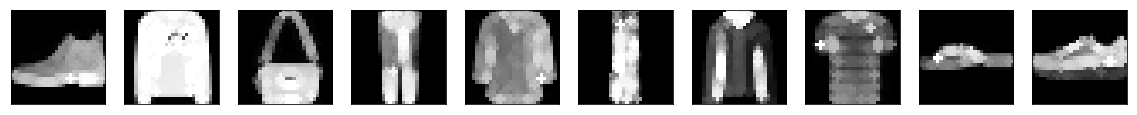

Dilatation of the reconstructions


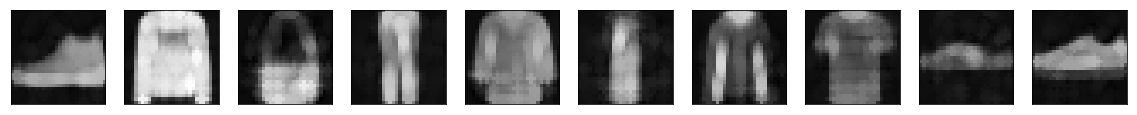

Original images and max-approximation to dilatation
Max-approx error to original:  0.4227844499957437  - Max-approx error to reconstruction:  0.7461084560841839


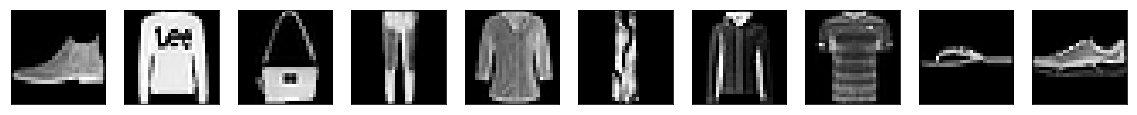

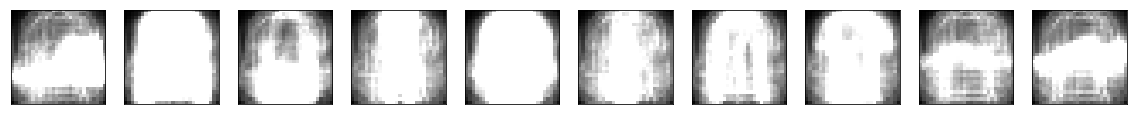

Dilated of the atom images of the decoder


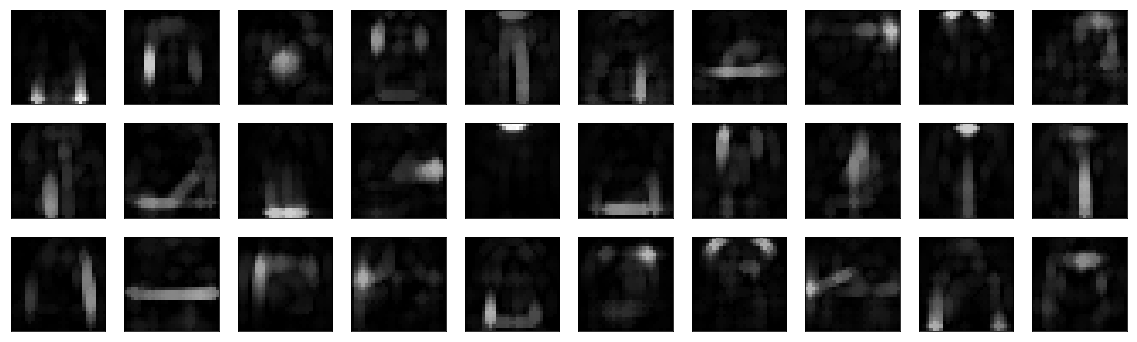

In [35]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.3 Sparsity_weight = 0.001 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.009277658


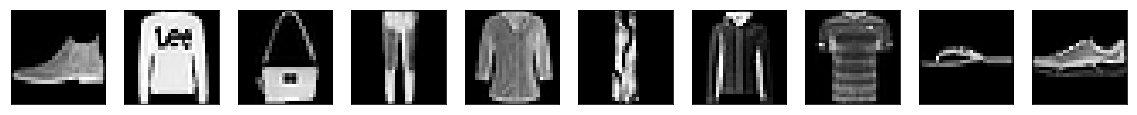

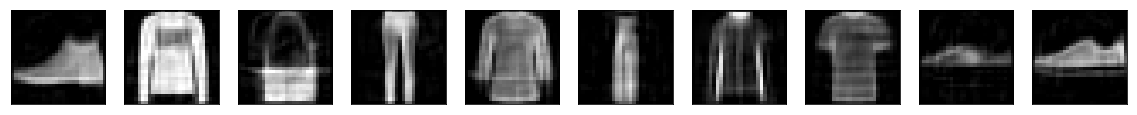

Histograms of the encodings - Sparsity (Hoyer):  0.3011758029460907


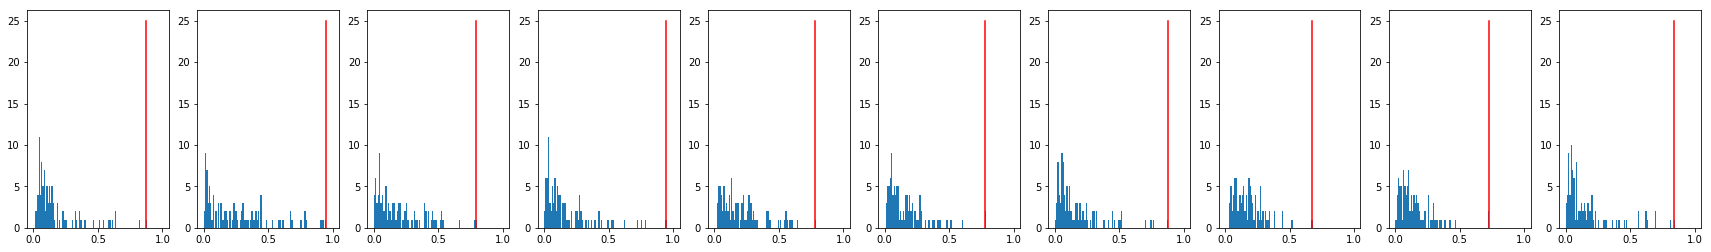

Atom images of the decoder


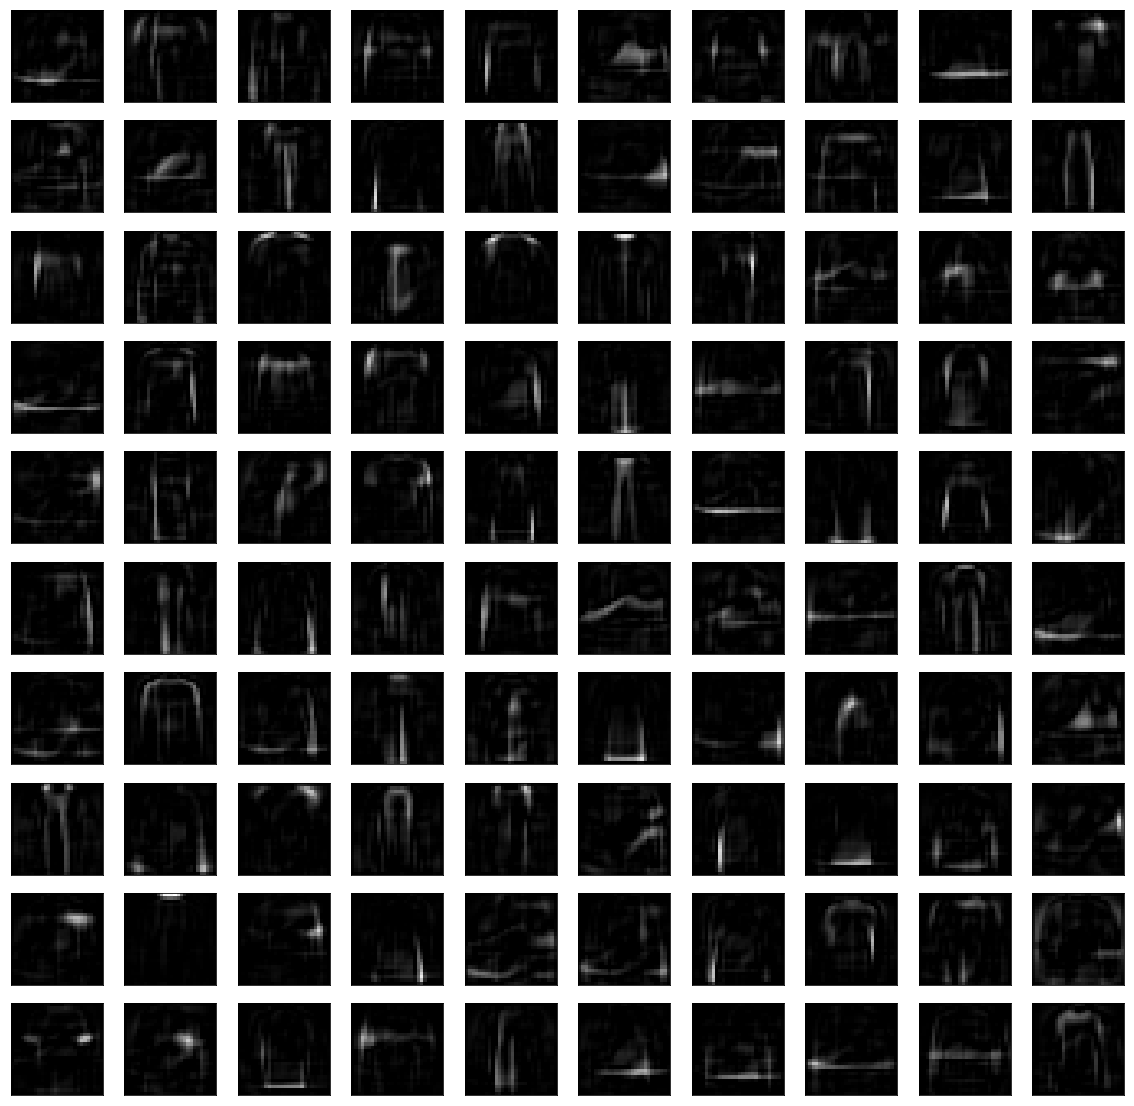

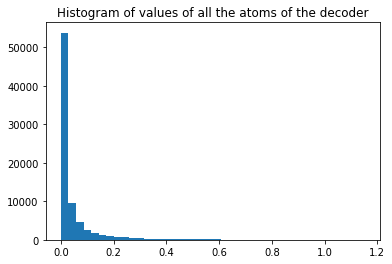

In [36]:
sp_o = 0.2
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


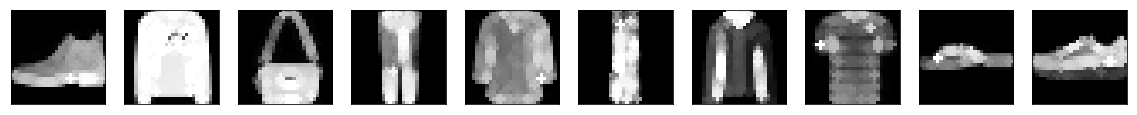

Dilatation of the reconstructions


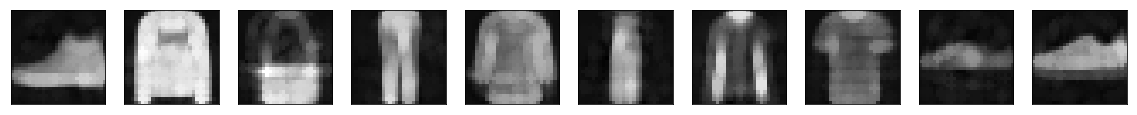

Original images and max-approximation to dilatation
Max-approx error to original:  0.42345916984430854  - Max-approx error to reconstruction:  0.7033366246003955


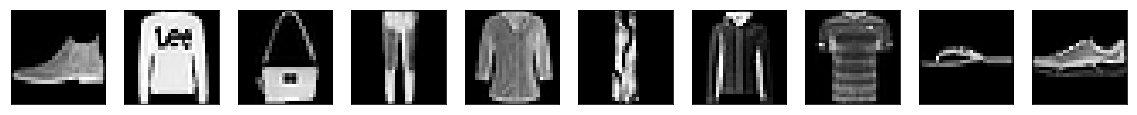

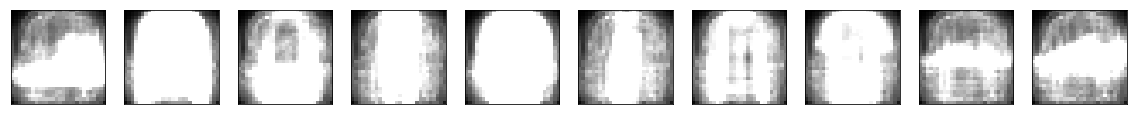

Dilated of the atom images of the decoder


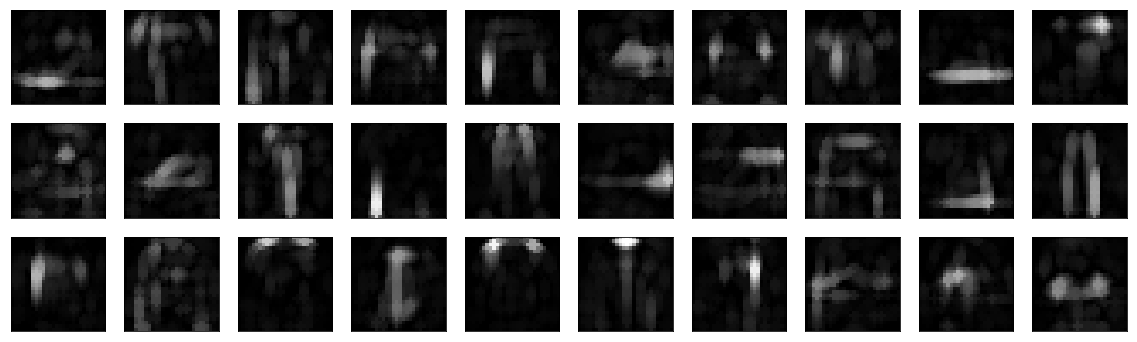

In [37]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.4 Sparsity_weight = 0.005 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.009170544


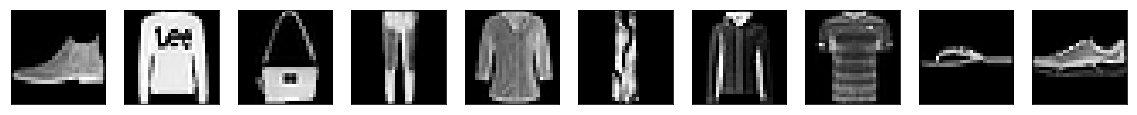

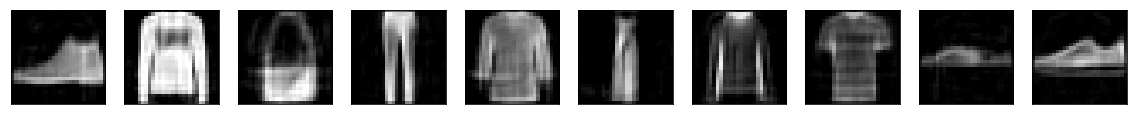

Histograms of the encodings - Sparsity (Hoyer):  0.2963530421257019


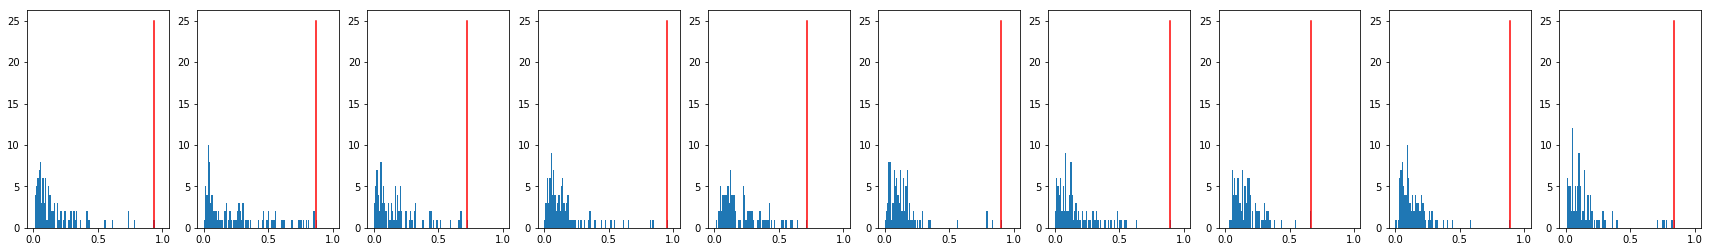

Atom images of the decoder


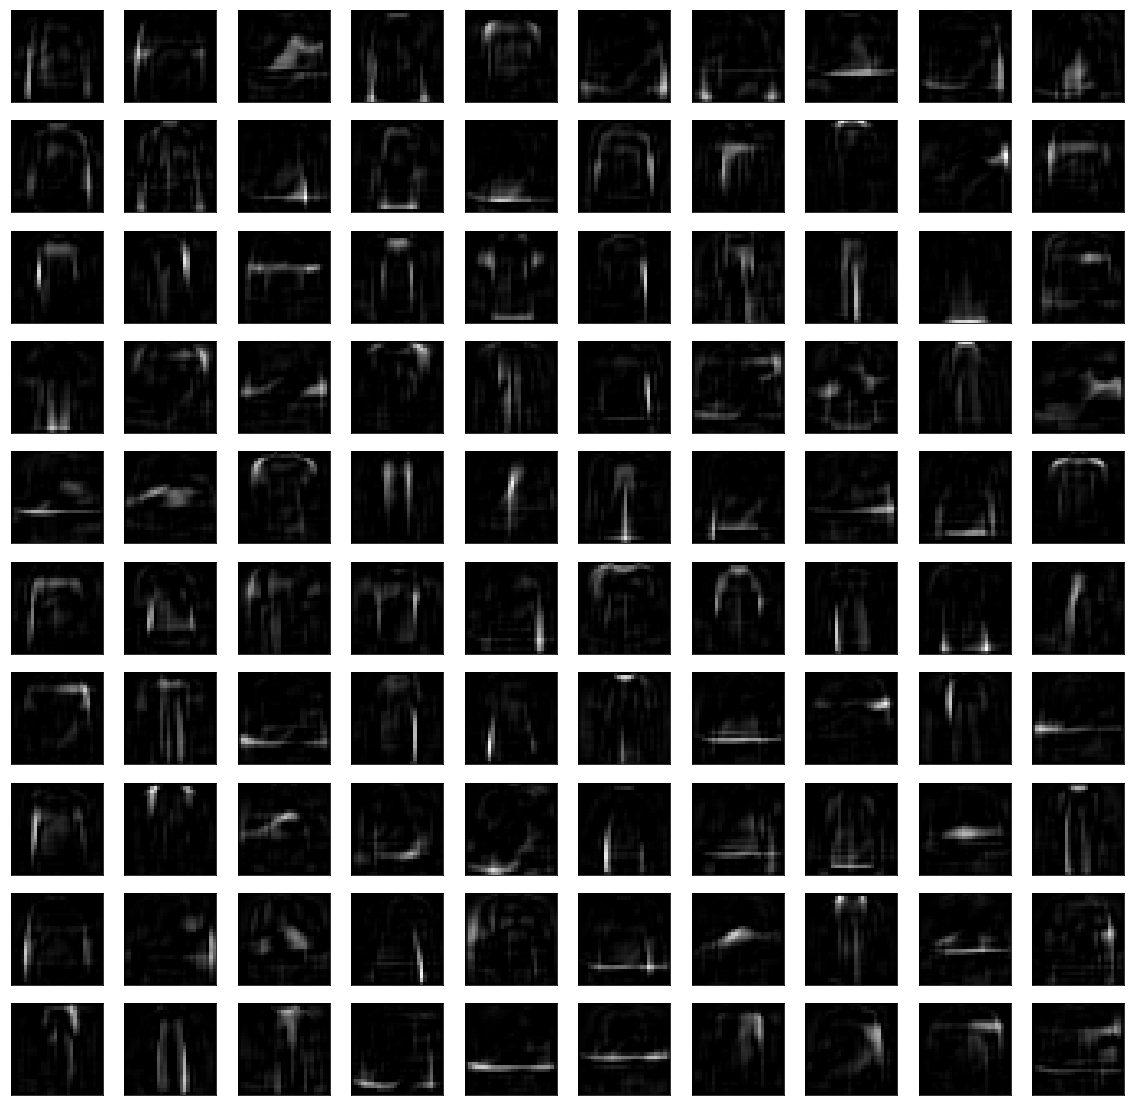

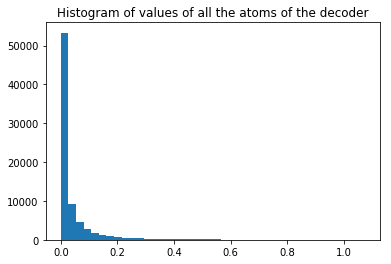

In [38]:
sp_o = 0.2
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


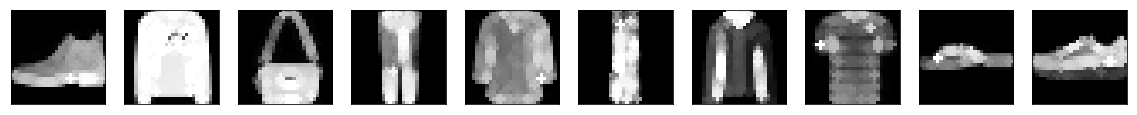

Dilatation of the reconstructions


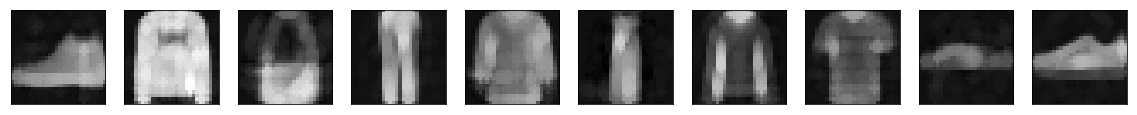

Original images and max-approximation to dilatation
Max-approx error to original:  0.41906744113921396  - Max-approx error to reconstruction:  0.6878067796921447


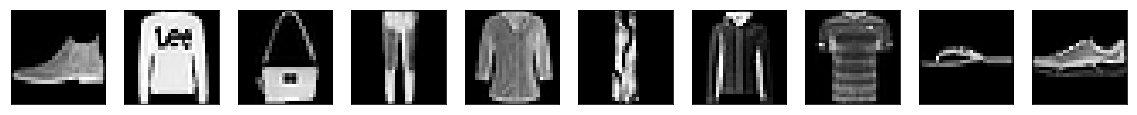

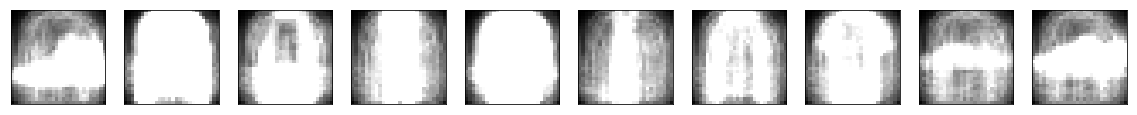

Dilated of the atom images of the decoder


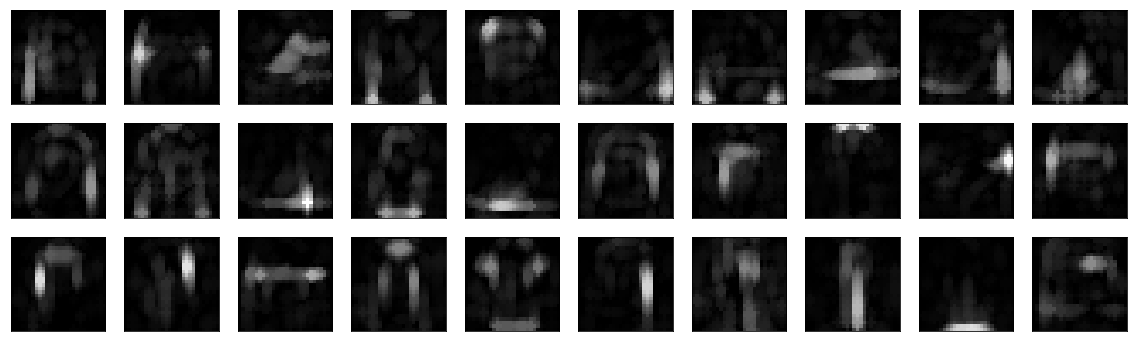

In [39]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.5 Sparsity_weight = 0.01 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.009201382


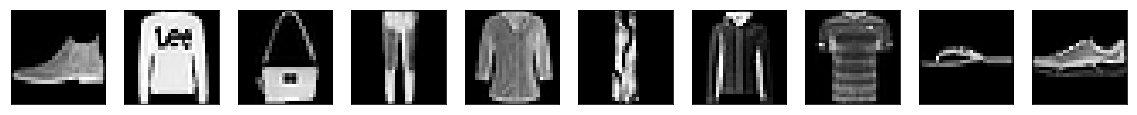

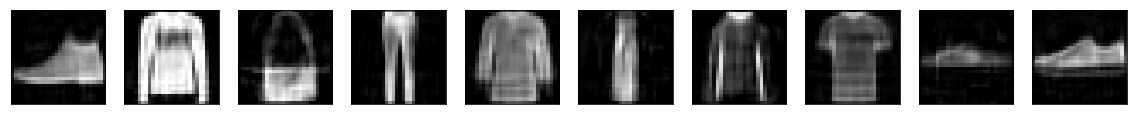

Histograms of the encodings - Sparsity (Hoyer):  0.2866424322128296


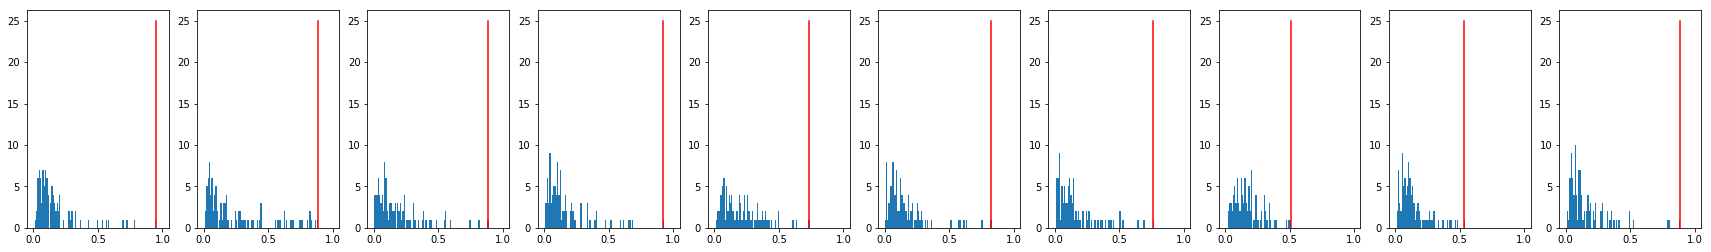

Atom images of the decoder


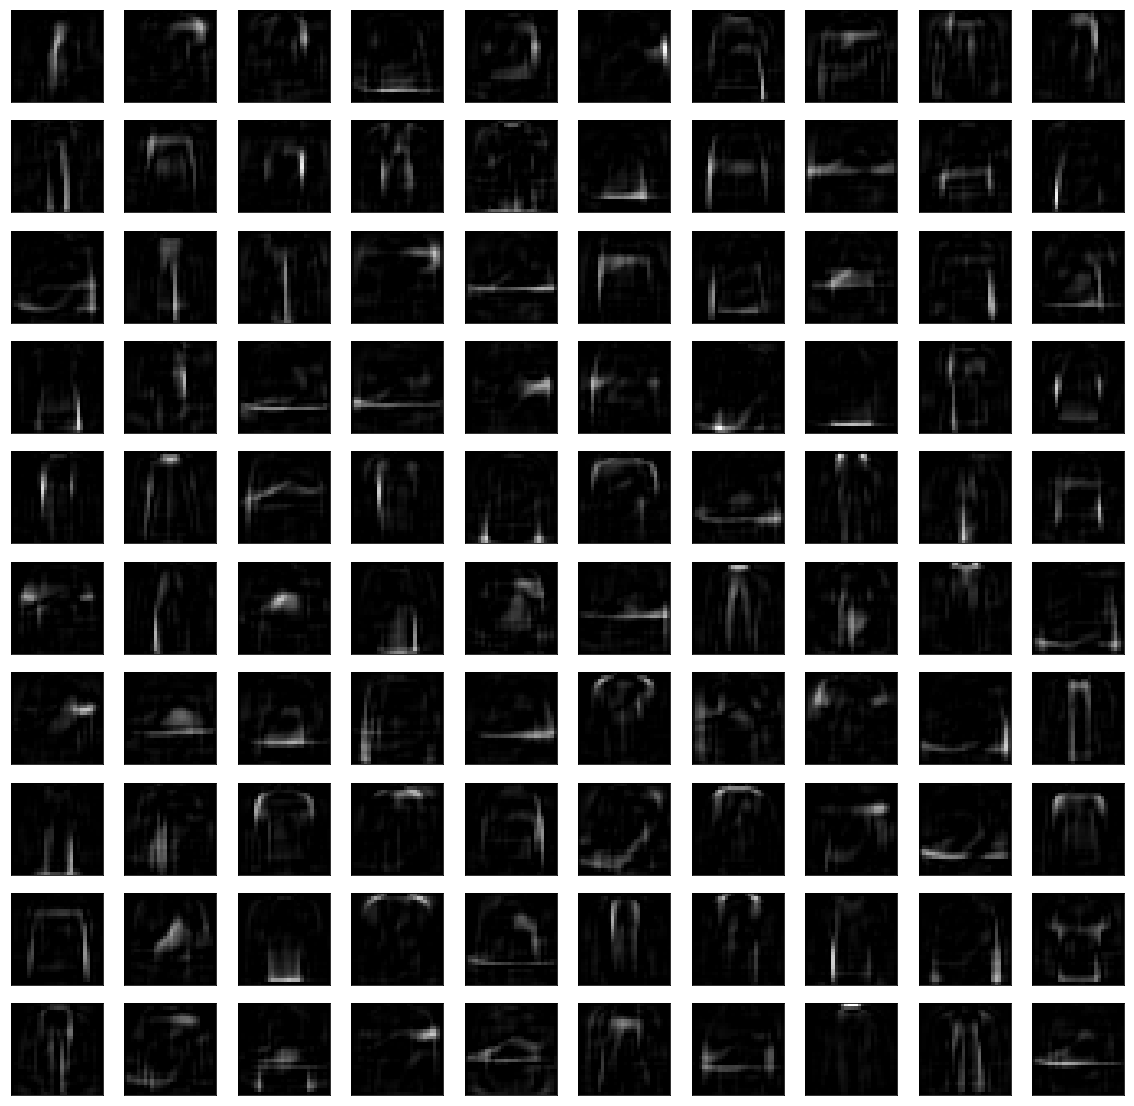

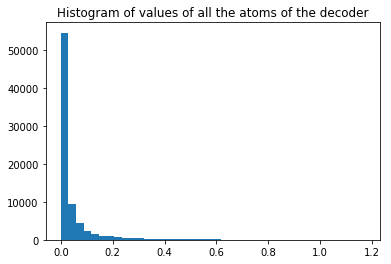

In [40]:
sp_o = 0.2
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('19_01_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_linearDecoder/')
print('Original images and reconstructions - Reconstruction error: ', AE.reconstruction_error(x_test, clipped_output=True))
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder()
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


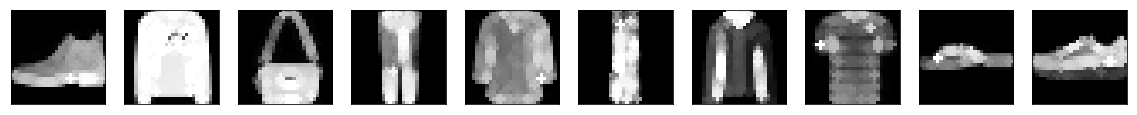

Dilatation of the reconstructions


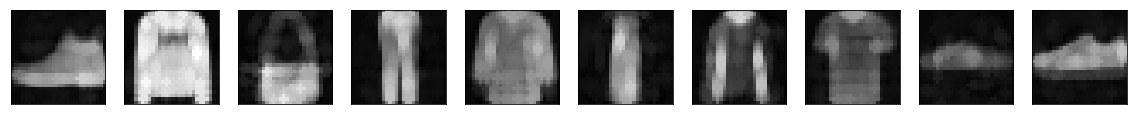

Original images and max-approximation to dilatation
Max-approx error to original:  0.42116291190744215  - Max-approx error to reconstruction:  0.7133059052533522


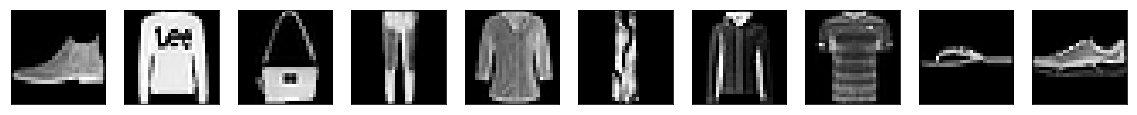

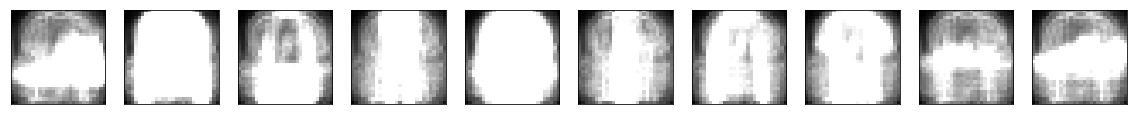

Dilated of the atom images of the decoder


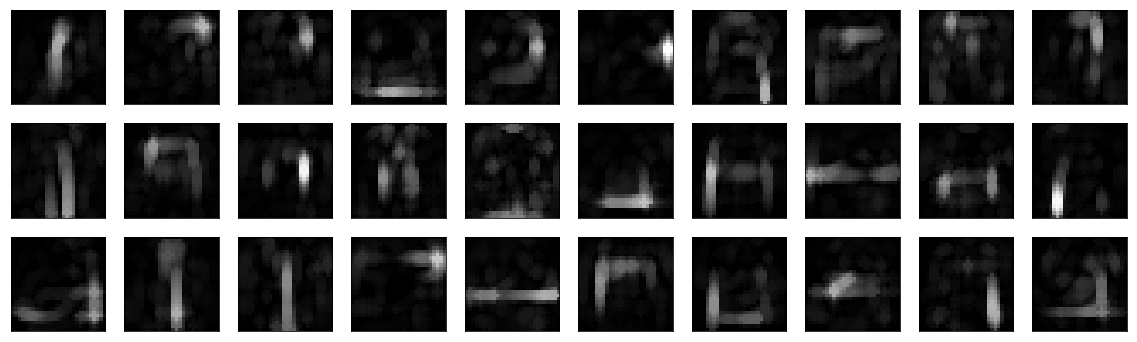

In [41]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
max_approx_error = AE_dil.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)
print('Max-approx error to original: ', max_approx_error[0], ' - Max-approx error to reconstruction: ', max_approx_error[1])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)